# Sep parcel, 2021

**Motivation**: 0.1 and 0.2 <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import Allen
from register.register import Register, reset_ants_img
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
%%time

mice = Mice((512, 4), load_allen=True)

metadata for combined not found, time to run cat_data() . . .

CPU times: user 2.53 s, sys: 145 ms, total: 2.68 s
Wall time: 4.24 s


[PROGRESS] fit columnar: initiated

[PROGRESS] downsample: done

Warning! missing regions:
'[1596, 1597, 3629, 3644, 3645, 3656, 4079]'

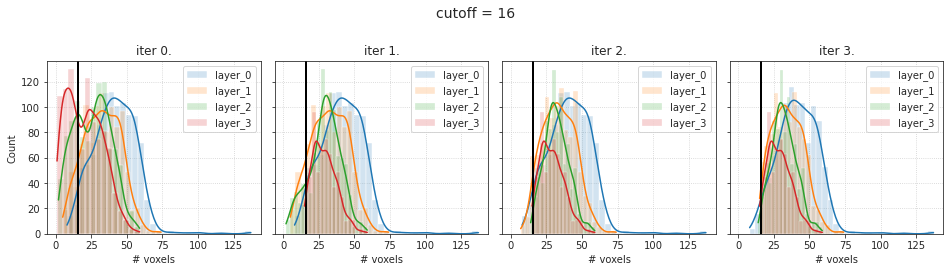

[PROGRESS] merge: done

Warning, region '305' is flat

Warning, region '389' is flat

Warning, region '391' is flat

Warning, region '410' is flat

[PROGRESS] erode: done

num regions,    left: 1740,  right: 1740
region id diff,         r - l:  Counter({2048: 1740})

[PROGRESS] fit columnar: done

[PROGRESS] 'parcel_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*4

[PROGRESS] save results: done.

In [3]:
mice.parcel.fit_parcel(True, cutoff=2)

In [6]:
mice = Mice((512, 4), full_load=True, load_allen=True, load_parcel=True)

metadata for combined not found, time to run cat_data() . . .

In [7]:
reg = Register(mice)
reg.register_anat(True)

registering anat sub-SLC10_ses-3: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [17:36<00:00, 35.23s/it]


In [2]:
%%time

mice = Mice((512, 4))

metadata for combined not found, concatenating data now . . .

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

[PROGRESS] 'combine_meta.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4

CPU times: user 38.8 s, sys: 1min 20s, total: 1min 59s
Wall time: 3min 3s


In [2]:
mice = Mice((256, 4), full_load=True, load_parcel=True, load_allen=True)

[PROGRESS] fit columnar: initiated

[PROGRESS] downsample: done

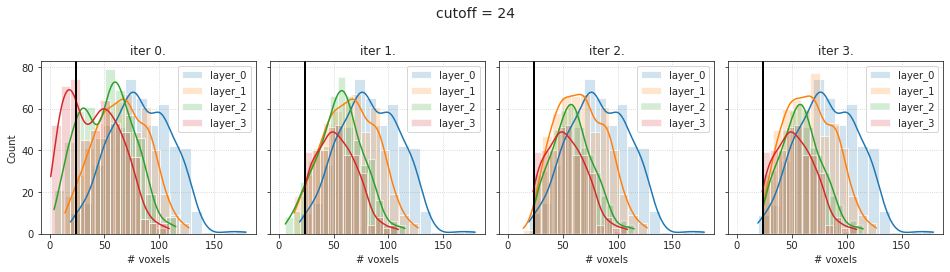

[PROGRESS] merge: done

Warning, region '163' is flat

Warning, region '178' is flat

Warning, region '193' is flat

[PROGRESS] erode: done

num regions,    left: 923,  right: 923
region id diff,         r - l:  Counter({1024: 923})

[PROGRESS] fit columnar: done

[PROGRESS] 'parcel_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4

[PROGRESS] save results: done.

In [3]:
# mice.parcel.fit_parcel(True, cutoff=3)

In [7]:
# reg = Register(mice)
# reg.register_anat(True)

registering anat sub-SLC10_ses-3: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [28:11<00:00, 56.37s/it]


In [3]:
# reg = Register(mice)
# reg.organize_func(0.1)

logger 'organize_func_(2021_10_16).log' created at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/log

Name: cortex . . . a total of 386 regions were accepted.
accept ratio: 78 %, reject ratio: 22 %, using a presence threshold of 10.0 %

organizing ca2:  sub-SLC10_ses-3_run-7: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [2:39:39<00:00, 45.62s/it]


Name: cortex . . . a total of 1834 regions were accepted.
accept ratio: 99 %, reject ratio: 1 %, using a presence threshold of 10.0 %

Name: subcortex-l . . . a total of 154 regions were accepted.
accept ratio: 100 %, reject ratio: 0 %, using a presence threshold of 10.0 %

Name: subcortex-r . . . a total of 154 regions were accepted.
accept ratio: 100 %, reject ratio: 0 %, using a presence threshold of 10.0 %

organizing bold:  sub-SLC10_ses-3_run-7: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [1:21:14<00:00, 23.21s/it]


[PROGRESS] 'roi_lookup.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4

logger 'organize_func_(2021_10_12).log' created at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*4/log

Name: cortex-merged . . . a total of 714 regions were accepted.
accept ratio: 74 %, reject ratio: 26 %, using a presence threshold of 10.0 %

organizing ca2:  sub-SLC10_ses-3_run-7: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [1:25:50<00:00, 24.52s/it]


Name: cortex-merged . . . a total of 3468 regions were accepted.
accept ratio: 100 %, reject ratio: 0 %, using a presence threshold of 10.0 %

Name: subcortex-l . . . a total of 154 regions were accepted.
accept ratio: 100 %, reject ratio: 0 %, using a presence threshold of 10.0 %

Name: subcortex-r . . . a total of 154 regions were accepted.
accept ratio: 100 %, reject ratio: 0 %, using a presence threshold of 10.0 %

organizing bold:  sub-SLC10_ses-3_run-7: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [47:34<00:00, 13.59s/it]


In [14]:
al = Allen(100)

In [16]:
al.get('CLA')

{
    'acronym': 'CLA',
    'graph_id': 1,
    'graph_order': 557,
    'id': 583,
    'name': 'Claustrum',
    'structure_id_path': [997, 8, 567, 688, 703, 583],
    'structure_set_ids': [
        112905828,
        691663206,
        688152360,
        687527945,
        10,
        12,
        184527634,
        167587189,
        114512891
    ],
    'rgb_triplet': [138, 218, 135]
}

In [15]:
for res in [100, 50, 25, 10]:
    al = Allen(res)
    for i in tqdm(al.df['id'].tolist()):
        try:
            _ = al.get_masks(i, True)
        except Exception:
            print(f"error, id = {i}")

  0%|          | 0/1327 [00:00<?, ?it/s]

2021-09-29 21:13:55,778 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_8.nrrd
2021-09-29 21:13:56,114 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_688.nrrd
2021-09-29 21:13:56,369 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_695.nrrd
2021-09-29 21:13:56,631 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_68.nrrd
2021-09-29 21:1

error, id = 107

2021-09-29 21:13:57,763 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_219.nrrd
2021-09-29 21:13:57,936 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_219.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_219.nrrd (request).
2021-09-29 21:13:57,937 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 219

2021-09-29 21:13:57,947 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_299.nrrd
2021-09-29 21:13:58,118 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_299.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_299.nrrd (request).
2021-09-29 21:13:58,119 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 299

2021-09-29 21:13:58,129 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_644.nrrd
2021-09-29 21:13:58,301 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_644.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_644.nrrd (request).
2021-09-29 21:13:58,302 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 644

2021-09-29 21:13:58,311 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_947.nrrd
2021-09-29 21:13:58,483 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_947.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_947.nrrd (request).
2021-09-29 21:13:58,484 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 947

2021-09-29 21:13:58,505 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_320.nrrd
2021-09-29 21:13:58,689 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_943.nrrd
2021-09-29 21:13:58,880 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_648.nrrd
2021-09-29 21:13:59,078 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_844.nrrd
2021-09-29 2

error, id = 12993

2021-09-29 21:14:00,583 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_12994.nrrd
2021-09-29 21:14:00,756 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_12994.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_12994.nrrd (request).
2021-09-29 21:14:00,758 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 12994

2021-09-29 21:14:00,767 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_12995.nrrd
2021-09-29 21:14:00,938 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_12995.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_12995.nrrd (request).
2021-09-29 21:14:00,940 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 12995

2021-09-29 21:14:00,950 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_12996.nrrd
2021-09-29 21:14:01,121 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_12996.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_12996.nrrd (request).
2021-09-29 21:14:01,122 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 12996

2021-09-29 21:14:01,131 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_12997.nrrd
2021-09-29 21:14:01,303 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_12997.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_12997.nrrd (request).
2021-09-29 21:14:01,305 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 12997

2021-09-29 21:14:01,313 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_12998.nrrd
2021-09-29 21:14:01,485 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_12998.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_12998.nrrd (request).
2021-09-29 21:14:01,486 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 12998

2021-09-29 21:14:01,507 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_793.nrrd
2021-09-29 21:14:01,677 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_793.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_793.nrrd (request).
2021-09-29 21:14:01,679 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 793

2021-09-29 21:14:01,688 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_346.nrrd
2021-09-29 21:14:01,860 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_346.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_346.nrrd (request).
2021-09-29 21:14:01,861 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 346

2021-09-29 21:14:01,870 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_865.nrrd
2021-09-29 21:14:02,043 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_865.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_865.nrrd (request).
2021-09-29 21:14:02,044 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 865

2021-09-29 21:14:02,053 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_921.nrrd
2021-09-29 21:14:02,223 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_921.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_921.nrrd (request).
2021-09-29 21:14:02,225 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 921

2021-09-29 21:14:02,233 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_686.nrrd
2021-09-29 21:14:02,405 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_686.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_686.nrrd (request).
2021-09-29 21:14:02,406 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 686

2021-09-29 21:14:02,415 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_719.nrrd
2021-09-29 21:14:02,587 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_719.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_719.nrrd (request).
2021-09-29 21:14:02,588 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 719

2021-09-29 21:14:02,609 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_558.nrrd
2021-09-29 21:14:02,801 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_838.nrrd
2021-09-29 21:14:02,986 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_654.nrrd
2021-09-29 21:14:03,170 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_702.nrrd
2021-09-29 2

error, id = 480149202

2021-09-29 21:14:05,042 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149206.nrrd
2021-09-29 21:14:05,216 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149206.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149206.nrrd (request).
2021-09-29 21:14:05,218 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149206

2021-09-29 21:14:05,227 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149210.nrrd
2021-09-29 21:14:05,399 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149210.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149210.nrrd (request).
2021-09-29 21:14:05,400 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149210

2021-09-29 21:14:05,409 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149214.nrrd
2021-09-29 21:14:05,582 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149214.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149214.nrrd (request).
2021-09-29 21:14:05,583 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149214

2021-09-29 21:14:05,592 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149218.nrrd
2021-09-29 21:14:05,762 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149218.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149218.nrrd (request).
2021-09-29 21:14:05,763 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149218

2021-09-29 21:14:05,772 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149222.nrrd
2021-09-29 21:14:05,944 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149222.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149222.nrrd (request).
2021-09-29 21:14:05,946 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149222

2021-09-29 21:14:05,955 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149226.nrrd
2021-09-29 21:14:06,127 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149226.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149226.nrrd (request).
2021-09-29 21:14:06,129 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149226

2021-09-29 21:14:06,150 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1030.nrrd
2021-09-29 21:14:06,335 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_113.nrrd
2021-09-29 21:14:06,522 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1094.nrrd
2021-09-29 21:14:06,708 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1128.nrrd
2021-09-2

2021-09-29 21:14:13,139 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_862.nrrd
2021-09-29 21:14:13,328 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_893.nrrd
2021-09-29 21:14:13,521 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_36.nrrd
2021-09-29 21:14:13,836 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_180.nrrd
2021-09-29 21

error, id = 480149230

2021-09-29 21:14:22,438 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149234.nrrd
2021-09-29 21:14:22,610 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149234.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149234.nrrd (request).
2021-09-29 21:14:22,611 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149234

2021-09-29 21:14:22,620 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149238.nrrd
2021-09-29 21:14:22,793 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149238.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149238.nrrd (request).
2021-09-29 21:14:22,795 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149238

2021-09-29 21:14:22,803 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149242.nrrd
2021-09-29 21:14:22,974 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149242.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149242.nrrd (request).
2021-09-29 21:14:22,975 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149242

2021-09-29 21:14:22,984 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149246.nrrd
2021-09-29 21:14:23,155 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149246.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149246.nrrd (request).
2021-09-29 21:14:23,156 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149246

2021-09-29 21:14:23,165 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149250.nrrd
2021-09-29 21:14:23,338 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149250.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149250.nrrd (request).
2021-09-29 21:14:23,339 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149250

2021-09-29 21:14:23,348 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149254.nrrd
2021-09-29 21:14:23,521 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149254.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149254.nrrd (request).
2021-09-29 21:14:23,523 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149254

2021-09-29 21:14:23,532 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1002.nrrd
2021-09-29 21:14:23,722 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_735.nrrd
2021-09-29 21:14:23,908 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_251.nrrd
2021-09-29 21:14:24,093 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_816.nrrd
2021-09-29 

error, id = 801

2021-09-29 21:14:27,655 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_561.nrrd
2021-09-29 21:14:27,826 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_561.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_561.nrrd (request).
2021-09-29 21:14:27,828 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 561

2021-09-29 21:14:27,836 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_913.nrrd
2021-09-29 21:14:28,008 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_913.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_913.nrrd (request).
2021-09-29 21:14:28,009 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 913

2021-09-29 21:14:28,018 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_937.nrrd
2021-09-29 21:14:28,190 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_937.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_937.nrrd (request).
2021-09-29 21:14:28,191 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 937

2021-09-29 21:14:28,200 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_457.nrrd
2021-09-29 21:14:28,371 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_457.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_457.nrrd (request).
2021-09-29 21:14:28,373 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 457

2021-09-29 21:14:28,381 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_497.nrrd
2021-09-29 21:14:28,554 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_497.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_497.nrrd (request).
2021-09-29 21:14:28,555 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 497

2021-09-29 21:14:28,564 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_402.nrrd
2021-09-29 21:14:28,750 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1074.nrrd
2021-09-29 21:14:28,937 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_905.nrrd
2021-09-29 21:14:29,122 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1114.nrrd
2021-09-29

2021-09-29 21:14:35,000 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_393.nrrd
2021-09-29 21:14:35,187 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_533.nrrd
2021-09-29 21:14:35,376 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_805.nrrd
2021-09-29 21:14:35,563 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_41.nrrd
2021-09-29 21

error, id = 572

2021-09-29 21:14:39,290 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1053.nrrd
2021-09-29 21:14:39,460 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1053.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1053.nrrd (request).
2021-09-29 21:14:39,462 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1053

2021-09-29 21:14:39,470 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_739.nrrd
2021-09-29 21:14:39,643 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_739.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_739.nrrd (request).
2021-09-29 21:14:39,644 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 739

2021-09-29 21:14:39,653 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_179.nrrd
2021-09-29 21:14:39,830 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_179.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_179.nrrd (request).
2021-09-29 21:14:39,832 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 179

2021-09-29 21:14:39,841 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_227.nrrd
2021-09-29 21:14:40,018 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_227.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_227.nrrd (request).
2021-09-29 21:14:40,019 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 227

2021-09-29 21:14:40,028 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_39.nrrd
2021-09-29 21:14:40,216 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_935.nrrd
2021-09-29 21:14:40,405 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_211.nrrd
2021-09-29 21:14:40,594 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1015.nrrd
2021-09-29 2

error, id = 195

2021-09-29 21:14:42,649 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_304.nrrd
2021-09-29 21:14:42,834 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_363.nrrd
2021-09-29 21:14:43,024 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_84.nrrd
2021-09-29 21:14:43,210 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_132.nrrd
2021-09-29 21

error, id = 747

2021-09-29 21:14:43,767 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_556.nrrd
2021-09-29 21:14:43,953 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_827.nrrd
2021-09-29 21:14:44,137 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1054.nrrd
2021-09-29 21:14:44,321 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1081.nrrd
2021-09-29

error, id = 264

2021-09-29 21:14:44,695 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_492.nrrd
2021-09-29 21:14:44,867 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_492.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_492.nrrd (request).
2021-09-29 21:14:44,869 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 492

2021-09-29 21:14:44,877 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_352.nrrd
2021-09-29 21:14:45,051 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_352.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_352.nrrd (request).
2021-09-29 21:14:45,052 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 352

2021-09-29 21:14:45,061 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_476.nrrd
2021-09-29 21:14:45,233 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_476.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_476.nrrd (request).
2021-09-29 21:14:45,234 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 476

2021-09-29 21:14:45,243 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_516.nrrd
2021-09-29 21:14:45,417 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_516.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_516.nrrd (request).
2021-09-29 21:14:45,418 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 516

2021-09-29 21:14:45,427 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_723.nrrd
2021-09-29 21:14:45,613 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_448.nrrd
2021-09-29 21:14:45,798 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_412.nrrd
2021-09-29 21:14:45,986 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_630.nrrd
2021-09-29 2

error, id = 524

2021-09-29 21:14:47,098 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_582.nrrd
2021-09-29 21:14:47,283 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_620.nrrd
2021-09-29 21:14:47,468 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_910.nrrd
2021-09-29 21:14:47,654 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_527696977.nrrd
2021-0

error, id = 738

2021-09-29 21:14:48,019 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_746.nrrd
2021-09-29 21:14:48,206 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_969.nrrd
2021-09-29 21:14:48,391 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_288.nrrd
2021-09-29 21:14:48,574 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1125.nrrd
2021-09-29 

error, id = 480149258

2021-09-29 21:14:53,794 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149262.nrrd
2021-09-29 21:14:53,965 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149262.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149262.nrrd (request).
2021-09-29 21:14:53,967 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149262

2021-09-29 21:14:53,976 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149266.nrrd
2021-09-29 21:14:54,147 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149266.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149266.nrrd (request).
2021-09-29 21:14:54,149 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149266

2021-09-29 21:14:54,157 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149270.nrrd
2021-09-29 21:14:54,329 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149270.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149270.nrrd (request).
2021-09-29 21:14:54,330 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149270

2021-09-29 21:14:54,339 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149274.nrrd
2021-09-29 21:14:54,511 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149274.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149274.nrrd (request).
2021-09-29 21:14:54,513 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149274

2021-09-29 21:14:54,522 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149278.nrrd
2021-09-29 21:14:54,693 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149278.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149278.nrrd (request).
2021-09-29 21:14:54,695 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149278

2021-09-29 21:14:54,703 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149282.nrrd
2021-09-29 21:14:54,875 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149282.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149282.nrrd (request).
2021-09-29 21:14:54,876 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149282

2021-09-29 21:14:54,885 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149286.nrrd
2021-09-29 21:14:55,057 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149286.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149286.nrrd (request).
2021-09-29 21:14:55,058 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149286

2021-09-29 21:14:55,068 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149290.nrrd
2021-09-29 21:14:55,242 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149290.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149290.nrrd (request).
2021-09-29 21:14:55,243 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149290

2021-09-29 21:14:55,252 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149294.nrrd
2021-09-29 21:14:55,426 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149294.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149294.nrrd (request).
2021-09-29 21:14:55,427 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149294

2021-09-29 21:14:55,436 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149298.nrrd
2021-09-29 21:14:55,606 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149298.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149298.nrrd (request).
2021-09-29 21:14:55,608 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149298

2021-09-29 21:14:55,617 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149302.nrrd
2021-09-29 21:14:55,793 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149302.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149302.nrrd (request).
2021-09-29 21:14:55,794 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149302

2021-09-29 21:14:55,803 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149306.nrrd
2021-09-29 21:14:55,974 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149306.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149306.nrrd (request).
2021-09-29 21:14:55,975 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149306

2021-09-29 21:14:55,984 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149310.nrrd
2021-09-29 21:14:56,156 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149310.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149310.nrrd (request).
2021-09-29 21:14:56,157 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149310

2021-09-29 21:14:56,166 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149314.nrrd
2021-09-29 21:14:56,338 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149314.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149314.nrrd (request).
2021-09-29 21:14:56,339 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149314

2021-09-29 21:14:56,347 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149318.nrrd
2021-09-29 21:15:01,522 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149318.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149318.nrrd (request).
2021-09-29 21:15:01,524 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149318

2021-09-29 21:15:01,532 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149322.nrrd
2021-09-29 21:15:01,704 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149322.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149322.nrrd (request).
2021-09-29 21:15:01,705 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149322

2021-09-29 21:15:01,714 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149326.nrrd
2021-09-29 21:15:01,885 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149326.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149326.nrrd (request).
2021-09-29 21:15:01,887 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149326

2021-09-29 21:15:01,895 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149330.nrrd
2021-09-29 21:15:02,067 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149330.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149330.nrrd (request).
2021-09-29 21:15:02,069 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149330

2021-09-29 21:15:02,077 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149334.nrrd
2021-09-29 21:15:02,248 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149334.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149334.nrrd (request).
2021-09-29 21:15:02,250 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149334

2021-09-29 21:15:02,259 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149338.nrrd
2021-09-29 21:15:02,431 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480149338.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480149338.nrrd (request).
2021-09-29 21:15:02,432 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149338

2021-09-29 21:15:02,441 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_879.nrrd
2021-09-29 21:15:02,628 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_442.nrrd
2021-09-29 21:15:02,814 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_434.nrrd
2021-09-29 21:15:02,997 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_545.nrrd
2021-09-29 2

error, id = 606

2021-09-29 21:15:04,292 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_430.nrrd
2021-09-29 21:15:04,478 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_687.nrrd
2021-09-29 21:15:04,665 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_590.nrrd
2021-09-29 21:15:04,850 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_622.nrrd
2021-09-29 2

error, id = 532

2021-09-29 21:15:05,225 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_241.nrrd
2021-09-29 21:15:05,398 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_241.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_241.nrrd (request).
2021-09-29 21:15:05,399 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 241

2021-09-29 21:15:05,408 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_635.nrrd
2021-09-29 21:15:05,580 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_635.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_635.nrrd (request).
2021-09-29 21:15:05,581 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 635

2021-09-29 21:15:05,590 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_683.nrrd
2021-09-29 21:15:05,764 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_683.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_683.nrrd (request).
2021-09-29 21:15:05,765 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 683

2021-09-29 21:15:05,774 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_308.nrrd
2021-09-29 21:15:05,950 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_308.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_308.nrrd (request).
2021-09-29 21:15:05,951 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 308

2021-09-29 21:15:05,960 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_340.nrrd
2021-09-29 21:15:06,134 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_340.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_340.nrrd (request).
2021-09-29 21:15:06,135 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 340

2021-09-29 21:15:06,144 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_312782546.nrrd
2021-09-29 21:15:06,330 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_312782550.nrrd
2021-09-29 21:15:06,515 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_312782554.nrrd
2021-09-29 21:15:06,699 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_312

error, id = 212

2021-09-29 21:15:11,920 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_220.nrrd
2021-09-29 21:15:12,093 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_220.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_220.nrrd (request).
2021-09-29 21:15:12,095 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 220

2021-09-29 21:15:12,104 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_228.nrrd
2021-09-29 21:15:12,276 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_228.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_228.nrrd (request).
2021-09-29 21:15:12,277 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 228

2021-09-29 21:15:12,286 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_236.nrrd
2021-09-29 21:15:12,459 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_236.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_236.nrrd (request).
2021-09-29 21:15:12,461 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 236

2021-09-29 21:15:12,470 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_244.nrrd
2021-09-29 21:15:12,640 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_244.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_244.nrrd (request).
2021-09-29 21:15:12,642 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 244

2021-09-29 21:15:12,651 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_151.nrrd
2021-09-29 21:15:12,861 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_167.nrrd
2021-09-29 21:15:13,031 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_167.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_167.nrrd (request).
2021-09-29 21:15:13,033 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 167

2021-09-29 21:15:13,043 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_175.nrrd
2021-09-29 21:15:13,213 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_175.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_175.nrrd (request).
2021-09-29 21:15:13,214 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 175

2021-09-29 21:15:13,220 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_183.nrrd
2021-09-29 21:15:13,393 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_183.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_183.nrrd (request).
2021-09-29 21:15:13,394 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 183

2021-09-29 21:15:13,403 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_191.nrrd
2021-09-29 21:15:13,575 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_191.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_191.nrrd (request).
2021-09-29 21:15:13,577 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 191

2021-09-29 21:15:13,585 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_199.nrrd
2021-09-29 21:15:13,757 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_199.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_199.nrrd (request).
2021-09-29 21:15:13,759 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 199

2021-09-29 21:15:13,767 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_160.nrrd
2021-09-29 21:15:14,015 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_160.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_160.nrrd (request).
2021-09-29 21:15:14,016 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 160

2021-09-29 21:15:14,025 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_168.nrrd
2021-09-29 21:15:14,196 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_168.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_168.nrrd (request).
2021-09-29 21:15:14,198 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 168

2021-09-29 21:15:14,218 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_597.nrrd
2021-09-29 21:15:14,403 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_297.nrrd
2021-09-29 21:15:14,575 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_297.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_297.nrrd (request).
2021-09-29 21:15:14,576 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 297

2021-09-29 21:15:14,585 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1034.nrrd
2021-09-29 21:15:14,758 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1034.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1034.nrrd (request).
2021-09-29 21:15:14,760 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1034

2021-09-29 21:15:14,768 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1042.nrrd
2021-09-29 21:15:14,940 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1042.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1042.nrrd (request).
2021-09-29 21:15:14,942 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1042

2021-09-29 21:15:14,950 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1050.nrrd
2021-09-29 21:15:15,123 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1050.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1050.nrrd (request).
2021-09-29 21:15:15,124 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1050

2021-09-29 21:15:15,133 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1059.nrrd
2021-09-29 21:15:15,305 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1059.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1059.nrrd (request).
2021-09-29 21:15:15,307 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1059

2021-09-29 21:15:15,316 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_605.nrrd
2021-09-29 21:15:15,502 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_306.nrrd
2021-09-29 21:15:15,673 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_306.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_306.nrrd (request).
2021-09-29 21:15:15,675 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 306

2021-09-29 21:15:15,684 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1067.nrrd
2021-09-29 21:15:15,855 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1067.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1067.nrrd (request).
2021-09-29 21:15:15,856 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1067

2021-09-29 21:15:15,865 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1075.nrrd
2021-09-29 21:15:16,036 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1075.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1075.nrrd (request).
2021-09-29 21:15:16,037 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1075

2021-09-29 21:15:16,046 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1082.nrrd
2021-09-29 21:15:16,218 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1082.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1082.nrrd (request).
2021-09-29 21:15:16,219 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1082

2021-09-29 21:15:16,240 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_496.nrrd
2021-09-29 21:15:16,410 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_496.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_496.nrrd (request).
2021-09-29 21:15:16,412 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 496

2021-09-29 21:15:16,421 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_535.nrrd
2021-09-29 21:15:16,594 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_535.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_535.nrrd (request).
2021-09-29 21:15:16,595 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 535

2021-09-29 21:15:16,604 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_360.nrrd
2021-09-29 21:15:16,776 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_360.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_360.nrrd (request).
2021-09-29 21:15:16,777 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 360

2021-09-29 21:15:16,786 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_646.nrrd
2021-09-29 21:15:16,959 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_646.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_646.nrrd (request).
2021-09-29 21:15:16,960 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 646

2021-09-29 21:15:16,969 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_267.nrrd
2021-09-29 21:15:17,142 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_267.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_267.nrrd (request).
2021-09-29 21:15:17,143 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 267

2021-09-29 21:15:17,163 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_152.nrrd
2021-09-29 21:15:17,332 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_152.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_152.nrrd (request).
2021-09-29 21:15:17,333 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 152

2021-09-29 21:15:17,342 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_276.nrrd
2021-09-29 21:15:17,513 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_276.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_276.nrrd (request).
2021-09-29 21:15:17,515 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 276

2021-09-29 21:15:17,525 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_284.nrrd
2021-09-29 21:15:17,696 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_284.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_284.nrrd (request).
2021-09-29 21:15:17,697 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 284

2021-09-29 21:15:17,706 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_291.nrrd
2021-09-29 21:15:17,877 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_291.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_291.nrrd (request).
2021-09-29 21:15:17,879 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 291

2021-09-29 21:15:17,888 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_619.nrrd
2021-09-29 21:15:18,076 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_392.nrrd
2021-09-29 21:15:18,246 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_392.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_392.nrrd (request).
2021-09-29 21:15:18,247 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 392

2021-09-29 21:15:18,269 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_268.nrrd
2021-09-29 21:15:18,455 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1139.nrrd
2021-09-29 21:15:18,640 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_631.nrrd
2021-09-29 21:15:18,836 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_192.nrrd
2021-09-29 

error, id = 192

2021-09-29 21:15:19,016 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_200.nrrd
2021-09-29 21:15:19,188 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_200.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_200.nrrd (request).
2021-09-29 21:15:19,189 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 200

2021-09-29 21:15:19,198 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_208.nrrd
2021-09-29 21:15:19,468 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_208.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_208.nrrd (request).
2021-09-29 21:15:19,469 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 208

2021-09-29 21:15:19,490 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_655.nrrd
2021-09-29 21:15:19,674 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_584.nrrd
2021-09-29 21:15:19,844 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_584.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_584.nrrd (request).
2021-09-29 21:15:19,845 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 584

2021-09-29 21:15:19,854 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_376.nrrd
2021-09-29 21:15:20,026 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_376.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_376.nrrd (request).
2021-09-29 21:15:20,027 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 376

2021-09-29 21:15:20,036 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_216.nrrd
2021-09-29 21:15:20,209 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_216.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_216.nrrd (request).
2021-09-29 21:15:20,210 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 216

2021-09-29 21:15:20,219 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_224.nrrd
2021-09-29 21:15:20,390 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_224.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_224.nrrd (request).
2021-09-29 21:15:20,391 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 224

2021-09-29 21:15:20,400 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_232.nrrd
2021-09-29 21:15:20,574 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_232.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_232.nrrd (request).
2021-09-29 21:15:20,576 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 232

2021-09-29 21:15:20,584 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_663.nrrd
2021-09-29 21:15:20,771 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_592.nrrd
2021-09-29 21:15:20,943 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_592.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_592.nrrd (request).
2021-09-29 21:15:20,944 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 592

2021-09-29 21:15:20,953 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_383.nrrd
2021-09-29 21:15:21,125 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_383.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_383.nrrd (request).
2021-09-29 21:15:21,127 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 383

2021-09-29 21:15:21,136 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_240.nrrd
2021-09-29 21:15:21,314 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_240.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_240.nrrd (request).
2021-09-29 21:15:21,316 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 240

2021-09-29 21:15:21,325 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_248.nrrd
2021-09-29 21:15:21,497 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_248.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_248.nrrd (request).
2021-09-29 21:15:21,499 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 248

2021-09-29 21:15:21,508 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_256.nrrd
2021-09-29 21:15:21,681 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_256.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_256.nrrd (request).
2021-09-29 21:15:21,682 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 256

2021-09-29 21:15:21,703 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_400.nrrd
2021-09-29 21:15:21,874 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_400.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_400.nrrd (request).
2021-09-29 21:15:21,875 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 400

2021-09-29 21:15:21,884 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_408.nrrd
2021-09-29 21:15:22,057 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_408.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_408.nrrd (request).
2021-09-29 21:15:22,059 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 408

2021-09-29 21:15:22,067 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_416.nrrd
2021-09-29 21:15:22,239 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_416.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_416.nrrd (request).
2021-09-29 21:15:22,240 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 416

2021-09-29 21:15:22,249 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_424.nrrd
2021-09-29 21:15:22,421 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_424.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_424.nrrd (request).
2021-09-29 21:15:22,422 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 424

2021-09-29 21:15:22,443 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_517.nrrd
2021-09-29 21:15:22,614 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_517.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_517.nrrd (request).
2021-09-29 21:15:22,615 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 517

2021-09-29 21:15:22,624 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1140.nrrd
2021-09-29 21:15:22,797 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1140.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1140.nrrd (request).
2021-09-29 21:15:22,799 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1140

2021-09-29 21:15:22,807 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1141.nrrd
2021-09-29 21:15:22,979 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1141.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1141.nrrd (request).
2021-09-29 21:15:22,981 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1141

2021-09-29 21:15:22,990 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1142.nrrd
2021-09-29 21:15:23,162 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1142.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1142.nrrd (request).
2021-09-29 21:15:23,163 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1142

2021-09-29 21:15:23,172 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1089.nrrd
2021-09-29 21:15:23,364 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_375.nrrd
2021-09-29 21:15:23,557 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_391.nrrd
2021-09-29 21:15:23,725 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_391.nrrd from http://download.alleninstitute

error, id = 391

2021-09-29 21:15:23,735 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_399.nrrd
2021-09-29 21:15:23,906 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_399.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_399.nrrd (request).
2021-09-29 21:15:23,907 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 399

2021-09-29 21:15:23,916 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_407.nrrd
2021-09-29 21:15:24,093 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_407.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_407.nrrd (request).
2021-09-29 21:15:24,094 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 407

2021-09-29 21:15:24,103 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_415.nrrd
2021-09-29 21:15:24,275 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_415.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_415.nrrd (request).
2021-09-29 21:15:24,276 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 415

2021-09-29 21:15:24,296 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_431.nrrd
2021-09-29 21:15:24,468 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_431.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_431.nrrd (request).
2021-09-29 21:15:24,469 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 431

2021-09-29 21:15:24,478 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_438.nrrd
2021-09-29 21:15:24,650 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_438.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_438.nrrd (request).
2021-09-29 21:15:24,652 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 438

2021-09-29 21:15:24,661 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_446.nrrd
2021-09-29 21:15:24,832 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_446.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_446.nrrd (request).
2021-09-29 21:15:24,834 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 446

2021-09-29 21:15:24,843 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_454.nrrd
2021-09-29 21:15:25,016 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_454.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_454.nrrd (request).
2021-09-29 21:15:25,017 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 454

2021-09-29 21:15:25,038 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_471.nrrd
2021-09-29 21:15:25,207 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_471.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_471.nrrd (request).
2021-09-29 21:15:25,208 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 471

2021-09-29 21:15:25,217 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_479.nrrd
2021-09-29 21:15:25,390 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_479.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_479.nrrd (request).
2021-09-29 21:15:25,391 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 479

2021-09-29 21:15:25,399 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_486.nrrd
2021-09-29 21:15:25,570 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_486.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_486.nrrd (request).
2021-09-29 21:15:25,572 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 486

2021-09-29 21:15:25,581 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_495.nrrd
2021-09-29 21:15:25,752 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_495.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_495.nrrd (request).
2021-09-29 21:15:25,753 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 495

2021-09-29 21:15:25,763 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_504.nrrd
2021-09-29 21:15:25,934 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_504.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_504.nrrd (request).
2021-09-29 21:15:25,935 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 504

2021-09-29 21:15:25,944 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_726.nrrd
2021-09-29 21:15:26,155 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10702.nrrd
2021-09-29 21:15:26,323 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10702.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10702.nrrd (request).
2021-09-29 21:15:26,325 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a s

error, id = 10702

2021-09-29 21:15:26,333 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_734.nrrd
2021-09-29 21:15:26,506 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_734.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_734.nrrd (request).
2021-09-29 21:15:26,508 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 734

2021-09-29 21:15:26,514 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_742.nrrd
2021-09-29 21:15:26,687 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_742.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_742.nrrd (request).
2021-09-29 21:15:26,689 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 742

2021-09-29 21:15:26,698 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_751.nrrd
2021-09-29 21:15:26,869 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_751.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_751.nrrd (request).
2021-09-29 21:15:26,871 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 751

2021-09-29 21:15:26,880 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_758.nrrd
2021-09-29 21:15:27,052 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_758.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_758.nrrd (request).
2021-09-29 21:15:27,054 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 758

2021-09-29 21:15:27,062 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_766.nrrd
2021-09-29 21:15:27,235 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_766.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_766.nrrd (request).
2021-09-29 21:15:27,236 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 766

2021-09-29 21:15:27,245 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_775.nrrd
2021-09-29 21:15:27,419 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_775.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_775.nrrd (request).
2021-09-29 21:15:27,421 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 775

2021-09-29 21:15:27,430 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_782.nrrd
2021-09-29 21:15:27,603 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_782.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_782.nrrd (request).
2021-09-29 21:15:27,604 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 782

2021-09-29 21:15:27,614 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_790.nrrd
2021-09-29 21:15:27,786 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_790.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_790.nrrd (request).
2021-09-29 21:15:27,787 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 790

2021-09-29 21:15:27,796 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_799.nrrd
2021-09-29 21:15:27,968 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_799.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_799.nrrd (request).
2021-09-29 21:15:27,969 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 799

2021-09-29 21:15:27,978 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_807.nrrd
2021-09-29 21:15:28,150 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_807.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_807.nrrd (request).
2021-09-29 21:15:28,152 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 807

2021-09-29 21:15:28,160 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_815.nrrd
2021-09-29 21:15:28,331 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_815.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_815.nrrd (request).
2021-09-29 21:15:28,333 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 815

2021-09-29 21:15:28,342 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_823.nrrd
2021-09-29 21:15:28,515 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_823.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_823.nrrd (request).
2021-09-29 21:15:28,516 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 823

2021-09-29 21:15:28,525 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_982.nrrd
2021-09-29 21:15:28,710 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_19.nrrd
2021-09-29 21:15:28,905 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_909.nrrd
2021-09-29 21:15:29,099 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1121.nrrd
2021-09-29 2

error, id = 999

2021-09-29 21:15:29,656 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_715.nrrd
2021-09-29 21:15:29,828 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_715.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_715.nrrd (request).
2021-09-29 21:15:29,829 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 715

2021-09-29 21:15:29,838 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_764.nrrd
2021-09-29 21:15:30,011 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_764.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_764.nrrd (request).
2021-09-29 21:15:30,012 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 764

2021-09-29 21:15:30,021 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_52.nrrd
2021-09-29 21:15:30,208 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_92.nrrd
2021-09-29 21:15:30,379 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_92.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_92.nrrd (request).
2021-09-29 21:15:30,380 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 92

2021-09-29 21:15:30,389 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_312.nrrd
2021-09-29 21:15:30,559 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_312.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_312.nrrd (request).
2021-09-29 21:15:30,560 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 312

2021-09-29 21:15:30,569 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_139.nrrd
2021-09-29 21:15:30,755 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_387.nrrd
2021-09-29 21:15:30,927 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_387.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_387.nrrd (request).
2021-09-29 21:15:30,928 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 387

2021-09-29 21:15:30,937 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_28.nrrd
2021-09-29 21:15:31,122 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_60.nrrd
2021-09-29 21:15:31,293 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_60.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_60.nrrd (request).
2021-09-29 21:15:31,294 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 60

2021-09-29 21:15:31,314 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_526.nrrd
2021-09-29 21:15:31,497 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_543.nrrd
2021-09-29 21:15:31,683 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_468.nrrd
2021-09-29 21:15:31,856 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_468.nrrd from http://download.alleninstitute.

error, id = 468

2021-09-29 21:15:31,866 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_508.nrrd
2021-09-29 21:15:32,039 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_508.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_508.nrrd (request).
2021-09-29 21:15:32,040 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 508

2021-09-29 21:15:32,049 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_664.nrrd
2021-09-29 21:15:32,235 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_712.nrrd
2021-09-29 21:15:32,407 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_712.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_712.nrrd (request).
2021-09-29 21:15:32,409 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 712

2021-09-29 21:15:32,417 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_727.nrrd
2021-09-29 21:15:32,603 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_550.nrrd
2021-09-29 21:15:32,773 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_550.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_550.nrrd (request).
2021-09-29 21:15:32,774 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 550

2021-09-29 21:15:32,783 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_743.nrrd
2021-09-29 21:15:32,971 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_934.nrrd
2021-09-29 21:15:33,143 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_934.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_934.nrrd (request).
2021-09-29 21:15:33,144 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 934

2021-09-29 21:15:33,153 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_259.nrrd
2021-09-29 21:15:33,325 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_259.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_259.nrrd (request).
2021-09-29 21:15:33,326 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 259

2021-09-29 21:15:33,335 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_324.nrrd
2021-09-29 21:15:33,507 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_324.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_324.nrrd (request).
2021-09-29 21:15:33,508 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 324

2021-09-29 21:15:33,517 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_371.nrrd
2021-09-29 21:15:33,690 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_371.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_371.nrrd (request).
2021-09-29 21:15:33,691 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 371

2021-09-29 21:15:33,700 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_419.nrrd
2021-09-29 21:15:33,872 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_419.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_419.nrrd (request).
2021-09-29 21:15:33,874 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 419

2021-09-29 21:15:33,883 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1133.nrrd
2021-09-29 21:15:34,055 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1133.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1133.nrrd (request).
2021-09-29 21:15:34,056 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1133

2021-09-29 21:15:34,077 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10693.nrrd
2021-09-29 21:15:34,246 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10693.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10693.nrrd (request).
2021-09-29 21:15:34,247 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10693

2021-09-29 21:15:34,257 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10694.nrrd
2021-09-29 21:15:34,429 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10694.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10694.nrrd (request).
2021-09-29 21:15:34,430 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10694

2021-09-29 21:15:34,439 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10695.nrrd
2021-09-29 21:15:34,612 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10695.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10695.nrrd (request).
2021-09-29 21:15:34,613 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10695

2021-09-29 21:15:34,633 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10696.nrrd
2021-09-29 21:15:34,801 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10696.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10696.nrrd (request).
2021-09-29 21:15:34,802 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10696

2021-09-29 21:15:34,811 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10697.nrrd
2021-09-29 21:15:34,983 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10697.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10697.nrrd (request).
2021-09-29 21:15:34,984 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10697

2021-09-29 21:15:34,993 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10698.nrrd
2021-09-29 21:15:35,169 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10698.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10698.nrrd (request).
2021-09-29 21:15:35,170 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10698

2021-09-29 21:15:35,190 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10699.nrrd
2021-09-29 21:15:35,361 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10699.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10699.nrrd (request).
2021-09-29 21:15:35,363 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10699

2021-09-29 21:15:35,372 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10700.nrrd
2021-09-29 21:15:35,545 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10700.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10700.nrrd (request).
2021-09-29 21:15:35,546 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10700

2021-09-29 21:15:35,555 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10701.nrrd
2021-09-29 21:15:35,731 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10701.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10701.nrrd (request).
2021-09-29 21:15:35,732 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10701

2021-09-29 21:15:35,752 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_509.nrrd
2021-09-29 21:15:35,926 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_509.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_509.nrrd (request).
2021-09-29 21:15:35,928 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 509

2021-09-29 21:15:35,937 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_829.nrrd
2021-09-29 21:15:36,115 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_829.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_829.nrrd (request).
2021-09-29 21:15:36,117 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 829

2021-09-29 21:15:36,126 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_845.nrrd
2021-09-29 21:15:36,298 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_845.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_845.nrrd (request).
2021-09-29 21:15:36,299 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 845

2021-09-29 21:15:36,308 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_837.nrrd
2021-09-29 21:15:36,481 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_837.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_837.nrrd (request).
2021-09-29 21:15:36,482 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 837

2021-09-29 21:15:36,491 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_518.nrrd
2021-09-29 21:15:36,663 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_518.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_518.nrrd (request).
2021-09-29 21:15:36,665 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 518

2021-09-29 21:15:36,674 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_853.nrrd
2021-09-29 21:15:36,846 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_853.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_853.nrrd (request).
2021-09-29 21:15:36,847 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 853

2021-09-29 21:15:36,856 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_870.nrrd
2021-09-29 21:15:37,029 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_870.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_870.nrrd (request).
2021-09-29 21:15:37,031 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 870

2021-09-29 21:15:37,039 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_861.nrrd
2021-09-29 21:15:37,211 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_861.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_861.nrrd (request).
2021-09-29 21:15:37,213 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 861

2021-09-29 21:15:37,222 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682470.nrrd
2021-09-29 21:15:37,407 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682475.nrrd
2021-09-29 21:15:37,579 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_484682475.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682475.nrrd (request).
2021-09-29 21:15:37,580 allensdk.api.api.retrieve_file_over_http ERROR    We weren't ab

error, id = 484682475

2021-09-29 21:15:37,589 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682479.nrrd
2021-09-29 21:15:37,761 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_484682479.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682479.nrrd (request).
2021-09-29 21:15:37,762 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 484682479

2021-09-29 21:15:37,771 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682483.nrrd
2021-09-29 21:15:37,941 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_484682483.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682483.nrrd (request).
2021-09-29 21:15:37,942 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 484682483

2021-09-29 21:15:37,951 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682487.nrrd
2021-09-29 21:15:38,124 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_484682487.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682487.nrrd (request).
2021-09-29 21:15:38,125 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 484682487

2021-09-29 21:15:38,134 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682492.nrrd
2021-09-29 21:15:38,309 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_484682492.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682492.nrrd (request).
2021-09-29 21:15:38,310 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 484682492

2021-09-29 21:15:38,319 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682496.nrrd
2021-09-29 21:15:38,492 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_484682496.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682496.nrrd (request).
2021-09-29 21:15:38,493 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 484682496

2021-09-29 21:15:38,503 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682500.nrrd
2021-09-29 21:15:38,673 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_484682500.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682500.nrrd (request).
2021-09-29 21:15:38,675 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 484682500

2021-09-29 21:15:38,683 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682504.nrrd
2021-09-29 21:15:38,856 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_484682504.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682504.nrrd (request).
2021-09-29 21:15:38,857 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 484682504

2021-09-29 21:15:38,866 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_589508447.nrrd
2021-09-29 21:15:39,052 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682508.nrrd
2021-09-29 21:15:39,246 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_16.nrrd
2021-09-29 21:15:39,417 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_16.nrrd from http://download.allen

error, id = 16

2021-09-29 21:15:39,471 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_295.nrrd
2021-09-29 21:15:39,694 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_623.nrrd
2021-09-29 21:15:39,898 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_493.nrrd
2021-09-29 21:15:40,103 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_481.nrrd
2021-09-29 2

error, id = 481

2021-09-29 21:15:40,283 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_489.nrrd
2021-09-29 21:15:40,455 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_489.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_489.nrrd (request).
2021-09-29 21:15:40,456 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 489

2021-09-29 21:15:40,463 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_144.nrrd
2021-09-29 21:15:40,635 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_144.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_144.nrrd (request).
2021-09-29 21:15:40,637 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 144

2021-09-29 21:15:40,646 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_458.nrrd
2021-09-29 21:15:40,819 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_458.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_458.nrrd (request).
2021-09-29 21:15:40,820 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 458

2021-09-29 21:15:40,827 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_465.nrrd
2021-09-29 21:15:40,999 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_465.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_465.nrrd (request).
2021-09-29 21:15:41,001 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 465

2021-09-29 21:15:41,010 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_473.nrrd
2021-09-29 21:15:41,181 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_473.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_473.nrrd (request).
2021-09-29 21:15:41,182 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 473

2021-09-29 21:15:41,189 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_549009199.nrrd
2021-09-29 21:15:41,363 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_549009199.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_549009199.nrrd (request).
2021-09-29 21:15:41,364 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 549009199

2021-09-29 21:15:41,373 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_275.nrrd
2021-09-29 21:15:41,556 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_242.nrrd
2021-09-29 21:15:41,767 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_333.nrrd
2021-09-29 21:15:41,958 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_23.nrrd
2021-09-29 21

error, id = 411

2021-09-29 21:15:43,608 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_418.nrrd
2021-09-29 21:15:43,780 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_418.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_418.nrrd (request).
2021-09-29 21:15:43,781 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 418

2021-09-29 21:15:43,790 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_426.nrrd
2021-09-29 21:15:43,962 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_426.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_426.nrrd (request).
2021-09-29 21:15:43,964 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 426

2021-09-29 21:15:43,973 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_472.nrrd
2021-09-29 21:15:44,145 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_472.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_472.nrrd (request).
2021-09-29 21:15:44,146 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 472

2021-09-29 21:15:44,155 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480.nrrd
2021-09-29 21:15:44,327 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_480.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_480.nrrd (request).
2021-09-29 21:15:44,329 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480

2021-09-29 21:15:44,337 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_487.nrrd
2021-09-29 21:15:44,512 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_487.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_487.nrrd (request).
2021-09-29 21:15:44,513 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 487

2021-09-29 21:15:44,522 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_435.nrrd
2021-09-29 21:15:44,695 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_435.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_435.nrrd (request).
2021-09-29 21:15:44,697 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 435

2021-09-29 21:15:44,717 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_818.nrrd
2021-09-29 21:15:44,919 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_835.nrrd
2021-09-29 21:15:45,117 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_826.nrrd
2021-09-29 21:15:45,301 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_904.nrrd
2021-09-29 2

error, id = 359

2021-09-29 21:15:45,874 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_537.nrrd
2021-09-29 21:15:46,049 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_537.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_537.nrrd (request).
2021-09-29 21:15:46,051 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 537

2021-09-29 21:15:46,060 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_498.nrrd
2021-09-29 21:15:46,234 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_498.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_498.nrrd (request).
2021-09-29 21:15:46,236 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 498

2021-09-29 21:15:46,243 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_505.nrrd
2021-09-29 21:15:46,419 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_505.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_505.nrrd (request).
2021-09-29 21:15:46,420 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 505

2021-09-29 21:15:46,427 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_513.nrrd
2021-09-29 21:15:46,600 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_513.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_513.nrrd (request).
2021-09-29 21:15:46,602 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 513

2021-09-29 21:15:46,611 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_546.nrrd
2021-09-29 21:15:46,782 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_546.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_546.nrrd (request).
2021-09-29 21:15:46,784 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 546

2021-09-29 21:15:46,794 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_521.nrrd
2021-09-29 21:15:46,965 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_521.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_521.nrrd (request).
2021-09-29 21:15:46,967 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 521

2021-09-29 21:15:46,976 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_554.nrrd
2021-09-29 21:15:47,147 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_554.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_554.nrrd (request).
2021-09-29 21:15:47,149 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 554

2021-09-29 21:15:47,158 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_562.nrrd
2021-09-29 21:15:47,331 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_562.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_562.nrrd (request).
2021-09-29 21:15:47,332 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 562

2021-09-29 21:15:47,342 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_529.nrrd
2021-09-29 21:15:47,514 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_529.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_529.nrrd (request).
2021-09-29 21:15:47,516 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 529

2021-09-29 21:15:47,525 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_367.nrrd
2021-09-29 21:15:47,699 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_367.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_367.nrrd (request).
2021-09-29 21:15:47,700 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 367

2021-09-29 21:15:47,710 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_569.nrrd
2021-09-29 21:15:47,882 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_569.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_569.nrrd (request).
2021-09-29 21:15:47,884 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 569

2021-09-29 21:15:47,893 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_578.nrrd
2021-09-29 21:15:48,066 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_578.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_578.nrrd (request).
2021-09-29 21:15:48,067 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 578

2021-09-29 21:15:48,077 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_585.nrrd
2021-09-29 21:15:48,249 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_585.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_585.nrrd (request).
2021-09-29 21:15:48,251 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 585

2021-09-29 21:15:48,260 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_594.nrrd
2021-09-29 21:15:48,431 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_594.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_594.nrrd (request).
2021-09-29 21:15:48,433 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 594

2021-09-29 21:15:48,442 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_602.nrrd
2021-09-29 21:15:48,613 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_602.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_602.nrrd (request).
2021-09-29 21:15:48,615 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 602

2021-09-29 21:15:48,624 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_287.nrrd
2021-09-29 21:15:48,810 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_343.nrrd
2021-09-29 21:15:49,064 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_549.nrrd
2021-09-29 21:15:49,248 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_864.nrrd
2021-09-29 2

error, id = 560581555

2021-09-29 21:15:52,492 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_239.nrrd
2021-09-29 21:15:52,694 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1096.nrrd
2021-09-29 21:15:52,876 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1104.nrrd
2021-09-29 21:15:53,071 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1120.nrrd
2021-09-2

error, id = 617

2021-09-29 21:15:53,648 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_626.nrrd
2021-09-29 21:15:53,820 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_626.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_626.nrrd (request).
2021-09-29 21:15:53,821 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 626

2021-09-29 21:15:53,828 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_636.nrrd
2021-09-29 21:15:53,999 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_636.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_636.nrrd (request).
2021-09-29 21:15:54,001 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 636

2021-09-29 21:15:54,031 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_571.nrrd
2021-09-29 21:15:54,235 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_560581559.nrrd
2021-09-29 21:15:54,418 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_51.nrrd
2021-09-29 21:15:54,602 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_189.nrrd
2021-09

error, id = 300

2021-09-29 21:15:55,564 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_316.nrrd
2021-09-29 21:15:55,735 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_316.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_316.nrrd (request).
2021-09-29 21:15:55,736 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 316

2021-09-29 21:15:55,743 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_321.nrrd
2021-09-29 21:15:55,932 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_958.nrrd
2021-09-29 21:15:56,132 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_953.nrrd
2021-09-29 21:15:56,303 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_953.nrrd from http://download.alleninstitute.

error, id = 953

2021-09-29 21:15:56,313 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1097.nrrd
2021-09-29 21:15:56,510 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_390.nrrd
2021-09-29 21:15:56,694 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_332.nrrd
2021-09-29 21:15:56,880 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_432.nrrd
2021-09-29 

error, id = 432

2021-09-29 21:15:57,061 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_38.nrrd
2021-09-29 21:15:57,248 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_71.nrrd
2021-09-29 21:15:57,419 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_71.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_71.nrrd (request).
2021-09-29 21:15:57,421 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 71

2021-09-29 21:15:57,430 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_47.nrrd
2021-09-29 21:15:57,602 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_47.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_47.nrrd (request).
2021-09-29 21:15:57,604 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 47

2021-09-29 21:15:57,612 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_79.nrrd
2021-09-29 21:15:57,784 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_79.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_79.nrrd (request).
2021-09-29 21:15:57,786 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 79

2021-09-29 21:15:57,795 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_103.nrrd
2021-09-29 21:15:57,967 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_103.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_103.nrrd (request).
2021-09-29 21:15:57,968 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 103

2021-09-29 21:15:57,977 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_652.nrrd
2021-09-29 21:15:58,150 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_652.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_652.nrrd (request).
2021-09-29 21:15:58,151 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 652

2021-09-29 21:15:58,160 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_660.nrrd
2021-09-29 21:15:58,334 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_660.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_660.nrrd (request).
2021-09-29 21:15:58,335 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 660

2021-09-29 21:15:58,343 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_94.nrrd
2021-09-29 21:15:58,517 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_94.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_94.nrrd (request).
2021-09-29 21:15:58,518 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 94

2021-09-29 21:15:58,527 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_55.nrrd
2021-09-29 21:15:58,698 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_55.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_55.nrrd (request).
2021-09-29 21:15:58,699 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 55

2021-09-29 21:15:58,708 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_87.nrrd
2021-09-29 21:15:58,881 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_87.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_87.nrrd (request).
2021-09-29 21:15:58,883 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 87

2021-09-29 21:15:58,891 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_110.nrrd
2021-09-29 21:15:59,063 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_110.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_110.nrrd (request).
2021-09-29 21:15:59,065 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 110

2021-09-29 21:15:59,073 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_30.nrrd
2021-09-29 21:15:59,260 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_118.nrrd
2021-09-29 21:15:59,445 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_223.nrrd
2021-09-29 21:15:59,642 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_72.nrrd
2021-09-29 21:

error, id = 80

2021-09-29 21:16:00,010 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_263.nrrd
2021-09-29 21:16:00,197 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_272.nrrd
2021-09-29 21:16:00,382 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_830.nrrd
2021-09-29 21:16:00,565 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_668.nrrd
2021-09-29 2

error, id = 668

2021-09-29 21:16:00,746 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_676.nrrd
2021-09-29 21:16:00,918 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_676.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_676.nrrd (request).
2021-09-29 21:16:00,920 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 676

2021-09-29 21:16:00,929 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_684.nrrd
2021-09-29 21:16:01,103 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_684.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_684.nrrd (request).
2021-09-29 21:16:01,105 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 684

2021-09-29 21:16:01,113 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_452.nrrd
2021-09-29 21:16:01,300 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_523.nrrd
2021-09-29 21:16:01,487 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_763.nrrd
2021-09-29 21:16:01,672 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_914.nrrd
2021-09-29 2

error, id = 1124

2021-09-29 21:16:02,223 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_126.nrrd
2021-09-29 21:16:02,411 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_133.nrrd
2021-09-29 21:16:02,597 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_347.nrrd
2021-09-29 21:16:02,780 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_286.nrrd
2021-09-29 2

error, id = 700

2021-09-29 21:16:03,898 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_708.nrrd
2021-09-29 21:16:04,070 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_708.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_708.nrrd (request).
2021-09-29 21:16:04,071 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 708

2021-09-29 21:16:04,080 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_716.nrrd
2021-09-29 21:16:04,251 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_716.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_716.nrrd (request).
2021-09-29 21:16:04,252 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 716

2021-09-29 21:16:04,261 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_724.nrrd
2021-09-29 21:16:04,433 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_724.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_724.nrrd (request).
2021-09-29 21:16:04,434 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 724

2021-09-29 21:16:04,443 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_331.nrrd
2021-09-29 21:16:04,645 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_732.nrrd
2021-09-29 21:16:04,828 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_606826647.nrrd
2021-09-29 21:16:05,011 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_606826651.nrrd


error, id = 1110

2021-09-29 21:16:05,754 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1118.nrrd
2021-09-29 21:16:05,926 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1118.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1118.nrrd (request).
2021-09-29 21:16:05,927 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1118

2021-09-29 21:16:05,948 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1126.nrrd
2021-09-29 21:16:06,132 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1.nrrd
2021-09-29 21:16:06,330 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_740.nrrd
2021-09-29 21:16:06,500 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_740.nrrd from http://download.alleninstitute.o

error, id = 740

2021-09-29 21:16:06,511 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_748.nrrd
2021-09-29 21:16:06,684 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_748.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_748.nrrd (request).
2021-09-29 21:16:06,685 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 748

2021-09-29 21:16:06,694 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_756.nrrd
2021-09-29 21:16:06,865 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_756.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_756.nrrd (request).
2021-09-29 21:16:06,866 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 756

2021-09-29 21:16:06,902 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_439.nrrd
2021-09-29 21:16:07,069 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_439.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_439.nrrd (request).
2021-09-29 21:16:07,070 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 439

2021-09-29 21:16:07,079 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_447.nrrd
2021-09-29 21:16:07,251 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_447.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_447.nrrd (request).
2021-09-29 21:16:07,252 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 447

2021-09-29 21:16:07,259 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_455.nrrd
2021-09-29 21:16:07,429 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_455.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_455.nrrd (request).
2021-09-29 21:16:07,430 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 455

2021-09-29 21:16:07,439 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_464.nrrd
2021-09-29 21:16:07,611 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_464.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_464.nrrd (request).
2021-09-29 21:16:07,613 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 464

2021-09-29 21:16:07,633 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_761.nrrd
2021-09-29 21:16:07,802 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_761.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_761.nrrd (request).
2021-09-29 21:16:07,804 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 761

2021-09-29 21:16:07,812 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_769.nrrd
2021-09-29 21:16:07,984 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_769.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_769.nrrd (request).
2021-09-29 21:16:07,985 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 769

2021-09-29 21:16:07,995 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_777.nrrd
2021-09-29 21:16:08,166 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_777.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_777.nrrd (request).
2021-09-29 21:16:08,168 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 777

2021-09-29 21:16:08,176 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_785.nrrd
2021-09-29 21:16:08,348 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_785.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_785.nrrd (request).
2021-09-29 21:16:08,349 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 785

2021-09-29 21:16:08,379 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_194.nrrd
2021-09-29 21:16:08,562 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_226.nrrd
2021-09-29 21:16:08,746 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_356.nrrd
2021-09-29 21:16:08,936 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_364.nrrd
2021-09-29 2

error, id = 796

2021-09-29 21:16:10,228 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_804.nrrd
2021-09-29 21:16:10,413 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10671.nrrd
2021-09-29 21:16:10,614 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_302.nrrd
2021-09-29 21:16:10,813 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_834.nrrd
2021-09-29

error, id = 539

2021-09-29 21:16:13,777 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_548.nrrd
2021-09-29 21:16:13,949 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_548.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_548.nrrd (request).
2021-09-29 21:16:13,950 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 548

2021-09-29 21:16:13,959 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_555.nrrd
2021-09-29 21:16:14,133 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_555.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_555.nrrd (request).
2021-09-29 21:16:14,135 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 555

2021-09-29 21:16:14,144 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_294.nrrd
2021-09-29 21:16:14,356 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_494.nrrd
2021-09-29 21:16:14,524 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_494.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_494.nrrd (request).
2021-09-29 21:16:14,526 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 494

2021-09-29 21:16:14,534 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_503.nrrd
2021-09-29 21:16:14,707 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_503.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_503.nrrd (request).
2021-09-29 21:16:14,708 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 503

2021-09-29 21:16:14,715 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_511.nrrd
2021-09-29 21:16:14,887 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_511.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_511.nrrd (request).
2021-09-29 21:16:14,888 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 511

2021-09-29 21:16:14,897 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_795.nrrd
2021-09-29 21:16:15,084 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_50.nrrd
2021-09-29 21:16:15,270 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_67.nrrd
2021-09-29 21:16:15,452 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_587.nrrd
2021-09-29 21:

error, id = 549009207

2021-09-29 21:16:16,764 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_616.nrrd
2021-09-29 21:16:16,950 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_214.nrrd
2021-09-29 21:16:17,134 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_35.nrrd
2021-09-29 21:16:17,318 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_549009211.nrrd
2021-09

error, id = 615

2021-09-29 21:16:19,198 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_374.nrrd
2021-09-29 21:16:19,383 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1052.nrrd
2021-09-29 21:16:19,578 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_12.nrrd
2021-09-29 21:16:19,767 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_100.nrrd
2021-09-29 2

error, id = 82

2021-09-29 21:16:22,589 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_90.nrrd
2021-09-29 21:16:22,761 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_90.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_90.nrrd (request).
2021-09-29 21:16:22,763 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 90

2021-09-29 21:16:22,771 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_99.nrrd
2021-09-29 21:16:22,943 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_99.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_99.nrrd (request).
2021-09-29 21:16:22,944 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 99

2021-09-29 21:16:22,974 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_123.nrrd
2021-09-29 21:16:23,156 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_881.nrrd
2021-09-29 21:16:23,331 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_881.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_881.nrrd (request).
2021-09-29 21:16:23,333 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 881

2021-09-29 21:16:23,341 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_860.nrrd
2021-09-29 21:16:23,513 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_860.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_860.nrrd (request).
2021-09-29 21:16:23,515 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 860

2021-09-29 21:16:23,524 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_868.nrrd
2021-09-29 21:16:23,696 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_868.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_868.nrrd (request).
2021-09-29 21:16:23,698 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 868

2021-09-29 21:16:23,707 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_875.nrrd
2021-09-29 21:16:23,878 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_875.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_875.nrrd (request).
2021-09-29 21:16:23,880 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 875

2021-09-29 21:16:23,889 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_883.nrrd
2021-09-29 21:16:24,061 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_883.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_883.nrrd (request).
2021-09-29 21:16:24,062 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 883

2021-09-29 21:16:24,071 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_891.nrrd
2021-09-29 21:16:24,243 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_891.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_891.nrrd (request).
2021-09-29 21:16:24,245 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 891

2021-09-29 21:16:24,253 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_890.nrrd
2021-09-29 21:16:24,428 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_890.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_890.nrrd (request).
2021-09-29 21:16:24,430 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 890

2021-09-29 21:16:24,439 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_899.nrrd
2021-09-29 21:16:24,610 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_899.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_899.nrrd (request).
2021-09-29 21:16:24,612 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 899

2021-09-29 21:16:24,621 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_915.nrrd
2021-09-29 21:16:24,792 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_915.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_915.nrrd (request).
2021-09-29 21:16:24,794 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 915

2021-09-29 21:16:24,802 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_923.nrrd
2021-09-29 21:16:24,973 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_923.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_923.nrrd (request).
2021-09-29 21:16:24,975 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 923

2021-09-29 21:16:24,983 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_398.nrrd
2021-09-29 21:16:25,197 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_280.nrrd
2021-09-29 21:16:25,380 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_880.nrrd
2021-09-29 21:16:25,562 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_283.nrrd
2021-09-29 2

error, id = 283

2021-09-29 21:16:25,744 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_599626927.nrrd
2021-09-29 21:16:25,931 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_898.nrrd
2021-09-29 21:16:26,115 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_931.nrrd
2021-09-29 21:16:26,300 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1093.nrrd
2021-

error, id = 552

2021-09-29 21:16:26,664 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_318.nrrd
2021-09-29 21:16:26,850 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_462.nrrd
2021-09-29 21:16:27,020 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_462.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_462.nrrd (request).
2021-09-29 21:16:27,021 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 462

2021-09-29 21:16:27,030 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_534.nrrd
2021-09-29 21:16:27,216 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_574.nrrd
2021-09-29 21:16:27,399 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_621.nrrd
2021-09-29 21:16:27,585 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_549009215.nrrd
2021-0

error, id = 137

2021-09-29 21:16:28,698 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_130.nrrd
2021-09-29 21:16:28,870 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_130.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_130.nrrd (request).
2021-09-29 21:16:28,871 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 130

2021-09-29 21:16:28,879 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_147.nrrd
2021-09-29 21:16:29,065 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_162.nrrd
2021-09-29 21:16:29,250 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_604.nrrd
2021-09-29 21:16:29,436 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_146.nrrd
2021-09-29 2

error, id = 112

2021-09-29 21:16:31,110 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_560.nrrd
2021-09-29 21:16:31,284 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_560.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_560.nrrd (request).
2021-09-29 21:16:31,285 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 560

2021-09-29 21:16:31,314 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_720.nrrd
2021-09-29 21:16:31,505 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1039.nrrd
2021-09-29 21:16:31,709 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_659.nrrd
2021-09-29 21:16:31,879 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_659.nrrd from http://download.alleninstitute

error, id = 659

2021-09-29 21:16:31,890 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_666.nrrd
2021-09-29 21:16:32,063 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_666.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_666.nrrd (request).
2021-09-29 21:16:32,064 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 666

2021-09-29 21:16:32,071 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_674.nrrd
2021-09-29 21:16:32,243 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_674.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_674.nrrd (request).
2021-09-29 21:16:32,244 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 674

2021-09-29 21:16:32,253 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_682.nrrd
2021-09-29 21:16:32,437 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_682.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_682.nrrd (request).
2021-09-29 21:16:32,438 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 682

2021-09-29 21:16:32,445 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_691.nrrd
2021-09-29 21:16:32,616 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_691.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_691.nrrd (request).
2021-09-29 21:16:32,618 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 691

2021-09-29 21:16:32,654 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_77.nrrd
2021-09-29 21:16:32,822 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_77.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_77.nrrd (request).
2021-09-29 21:16:32,823 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 77

2021-09-29 21:16:32,832 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_53.nrrd
2021-09-29 21:16:33,002 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_53.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_53.nrrd (request).
2021-09-29 21:16:33,004 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 53

2021-09-29 21:16:33,010 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_61.nrrd
2021-09-29 21:16:33,182 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_61.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_61.nrrd (request).
2021-09-29 21:16:33,183 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 61

2021-09-29 21:16:33,192 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_45.nrrd
2021-09-29 21:16:33,365 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_45.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_45.nrrd (request).
2021-09-29 21:16:33,366 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 45

2021-09-29 21:16:33,372 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_69.nrrd
2021-09-29 21:16:33,543 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_69.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_69.nrrd (request).
2021-09-29 21:16:33,544 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 69

2021-09-29 21:16:33,553 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_589508451.nrrd
2021-09-29 21:16:33,741 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_789.nrrd
2021-09-29 21:16:33,912 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_789.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_789.nrrd (request).
2021-09-29 21:16:33,914 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a s

error, id = 789

2021-09-29 21:16:33,934 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_653.nrrd
2021-09-29 21:16:34,120 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_568.nrrd
2021-09-29 21:16:34,290 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_568.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_568.nrrd (request).
2021-09-29 21:16:34,291 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 568

2021-09-29 21:16:34,300 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_661.nrrd
2021-09-29 21:16:34,488 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_576.nrrd
2021-09-29 21:16:34,673 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_640.nrrd
2021-09-29 21:16:34,844 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_640.nrrd from http://download.alleninstitute.

error, id = 640

2021-09-29 21:16:34,855 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_135.nrrd
2021-09-29 21:16:35,044 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_939.nrrd
2021-09-29 21:16:35,229 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_143.nrrd
2021-09-29 21:16:35,414 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_839.nrrd
2021-09-29 2

error, id = 887

2021-09-29 21:16:35,780 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1048.nrrd
2021-09-29 21:16:35,966 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_372.nrrd
2021-09-29 21:16:36,151 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_83.nrrd
2021-09-29 21:16:36,337 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_136.nrrd
2021-09-29 2

error, id = 161

2021-09-29 21:16:38,770 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_177.nrrd
2021-09-29 21:16:38,965 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_995.nrrd
2021-09-29 21:16:39,137 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_995.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_995.nrrd (request).
2021-09-29 21:16:39,138 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 995

2021-09-29 21:16:39,146 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1069.nrrd
2021-09-29 21:16:39,334 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_185.nrrd
2021-09-29 21:16:39,505 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_185.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_185.nrrd (request).
2021-09-29 21:16:39,506 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a struct

error, id = 185

2021-09-29 21:16:39,515 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_193.nrrd
2021-09-29 21:16:39,689 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_193.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_193.nrrd (request).
2021-09-29 21:16:39,691 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 193

2021-09-29 21:16:39,699 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_701.nrrd
2021-09-29 21:16:39,911 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_765.nrrd
2021-09-29 21:16:40,095 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_773.nrrd
2021-09-29 21:16:40,279 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_781.nrrd
2021-09-29 2

error, id = 76

2021-09-29 21:16:40,645 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_379.nrrd
2021-09-29 21:16:40,833 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_206.nrrd
2021-09-29 21:16:41,020 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_230.nrrd
2021-09-29 21:16:41,206 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_222.nrrd
2021-09-29 2

error, id = 1144

2021-09-29 21:16:41,762 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1145.nrrd
2021-09-29 21:16:41,940 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1145.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1145.nrrd (request).
2021-09-29 21:16:41,941 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1145

2021-09-29 21:16:41,950 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1143.nrrd
2021-09-29 21:16:42,123 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1143.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1143.nrrd (request).
2021-09-29 21:16:42,125 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1143

2021-09-29 21:16:42,134 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_645.nrrd
2021-09-29 21:16:42,322 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_912.nrrd
2021-09-29 21:16:42,507 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10707.nrrd
2021-09-29 21:16:42,678 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10707.nrrd from http://download.alleninstit

error, id = 10707

2021-09-29 21:16:42,687 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10706.nrrd
2021-09-29 21:16:42,860 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10706.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10706.nrrd (request).
2021-09-29 21:16:42,862 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10706

2021-09-29 21:16:42,870 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10705.nrrd
2021-09-29 21:16:43,043 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10705.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10705.nrrd (request).
2021-09-29 21:16:43,044 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10705

2021-09-29 21:16:43,065 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_976.nrrd
2021-09-29 21:16:43,250 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10710.nrrd
2021-09-29 21:16:43,421 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10710.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10710.nrrd (request).
2021-09-29 21:16:43,422 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a s

error, id = 10710

2021-09-29 21:16:43,431 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10709.nrrd
2021-09-29 21:16:43,602 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10709.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10709.nrrd (request).
2021-09-29 21:16:43,603 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10709

2021-09-29 21:16:43,612 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10708.nrrd
2021-09-29 21:16:43,783 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10708.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10708.nrrd (request).
2021-09-29 21:16:43,784 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10708

2021-09-29 21:16:43,794 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_984.nrrd
2021-09-29 21:16:43,982 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10713.nrrd
2021-09-29 21:16:44,153 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10713.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10713.nrrd (request).
2021-09-29 21:16:44,154 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a s

error, id = 10713

2021-09-29 21:16:44,163 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10712.nrrd
2021-09-29 21:16:44,335 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10712.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10712.nrrd (request).
2021-09-29 21:16:44,336 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10712

2021-09-29 21:16:44,345 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10711.nrrd
2021-09-29 21:16:44,516 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10711.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10711.nrrd (request).
2021-09-29 21:16:44,517 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10711

2021-09-29 21:16:44,537 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_992.nrrd
2021-09-29 21:16:44,717 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_992.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_992.nrrd (request).
2021-09-29 21:16:44,718 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 992

2021-09-29 21:16:44,726 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10716.nrrd
2021-09-29 21:16:44,898 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10716.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10716.nrrd (request).
2021-09-29 21:16:44,900 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10716

2021-09-29 21:16:44,908 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10715.nrrd
2021-09-29 21:16:45,080 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10715.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10715.nrrd (request).
2021-09-29 21:16:45,082 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10715

2021-09-29 21:16:45,091 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10714.nrrd
2021-09-29 21:16:45,263 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10714.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10714.nrrd (request).
2021-09-29 21:16:45,264 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10714

2021-09-29 21:16:45,273 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1001.nrrd
2021-09-29 21:16:45,445 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1001.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1001.nrrd (request).
2021-09-29 21:16:45,447 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1001

2021-09-29 21:16:45,455 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10719.nrrd
2021-09-29 21:16:45,628 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10719.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10719.nrrd (request).
2021-09-29 21:16:45,629 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10719

2021-09-29 21:16:45,638 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10718.nrrd
2021-09-29 21:16:45,810 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10718.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10718.nrrd (request).
2021-09-29 21:16:45,811 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10718

2021-09-29 21:16:45,820 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10717.nrrd
2021-09-29 21:16:45,993 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10717.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10717.nrrd (request).
2021-09-29 21:16:45,995 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10717

2021-09-29 21:16:46,004 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1091.nrrd
2021-09-29 21:16:46,191 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10722.nrrd
2021-09-29 21:16:46,361 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10722.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10722.nrrd (request).
2021-09-29 21:16:46,363 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a 

error, id = 10722

2021-09-29 21:16:46,372 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10721.nrrd
2021-09-29 21:16:46,545 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10721.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10721.nrrd (request).
2021-09-29 21:16:46,546 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10721

2021-09-29 21:16:46,555 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10720.nrrd
2021-09-29 21:16:46,729 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10720.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10720.nrrd (request).
2021-09-29 21:16:46,730 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10720

2021-09-29 21:16:46,752 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10725.nrrd
2021-09-29 21:16:46,922 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10725.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10725.nrrd (request).
2021-09-29 21:16:46,923 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10725

2021-09-29 21:16:46,932 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10724.nrrd
2021-09-29 21:16:47,106 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10724.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10724.nrrd (request).
2021-09-29 21:16:47,108 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10724

2021-09-29 21:16:47,116 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10723.nrrd
2021-09-29 21:16:47,289 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10723.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10723.nrrd (request).
2021-09-29 21:16:47,290 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10723

2021-09-29 21:16:47,311 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10728.nrrd
2021-09-29 21:16:47,481 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10728.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10728.nrrd (request).
2021-09-29 21:16:47,483 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10728

2021-09-29 21:16:47,492 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10727.nrrd
2021-09-29 21:16:47,663 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10727.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10727.nrrd (request).
2021-09-29 21:16:47,665 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10727

2021-09-29 21:16:47,673 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10726.nrrd
2021-09-29 21:16:47,844 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10726.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10726.nrrd (request).
2021-09-29 21:16:47,845 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10726

2021-09-29 21:16:47,866 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10731.nrrd
2021-09-29 21:16:48,036 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10731.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10731.nrrd (request).
2021-09-29 21:16:48,038 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10731

2021-09-29 21:16:48,047 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10730.nrrd
2021-09-29 21:16:48,219 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10730.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10730.nrrd (request).
2021-09-29 21:16:48,220 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10730

2021-09-29 21:16:48,229 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10729.nrrd
2021-09-29 21:16:48,401 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10729.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10729.nrrd (request).
2021-09-29 21:16:48,402 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10729

2021-09-29 21:16:48,423 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10734.nrrd
2021-09-29 21:16:48,592 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10734.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10734.nrrd (request).
2021-09-29 21:16:48,593 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10734

2021-09-29 21:16:48,602 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10733.nrrd
2021-09-29 21:16:48,774 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10733.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10733.nrrd (request).
2021-09-29 21:16:48,776 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10733

2021-09-29 21:16:48,784 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10732.nrrd
2021-09-29 21:16:48,956 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10732.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10732.nrrd (request).
2021-09-29 21:16:48,957 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10732

2021-09-29 21:16:48,977 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10737.nrrd
2021-09-29 21:16:49,149 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10737.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10737.nrrd (request).
2021-09-29 21:16:49,150 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10737

2021-09-29 21:16:49,159 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10736.nrrd
2021-09-29 21:16:49,330 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10736.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10736.nrrd (request).
2021-09-29 21:16:49,331 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10736

2021-09-29 21:16:49,340 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10735.nrrd
2021-09-29 21:16:49,511 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10735.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10735.nrrd (request).
2021-09-29 21:16:49,512 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10735

2021-09-29 21:16:49,521 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1073.nrrd
2021-09-29 21:16:49,717 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10674.nrrd
2021-09-29 21:16:49,885 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10674.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10674.nrrd (request).
2021-09-29 21:16:49,887 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a 

error, id = 10674

2021-09-29 21:16:49,896 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10673.nrrd
2021-09-29 21:16:50,067 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10673.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10673.nrrd (request).
2021-09-29 21:16:50,068 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10673

2021-09-29 21:16:50,077 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10672.nrrd
2021-09-29 21:16:50,248 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10672.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10672.nrrd (request).
2021-09-29 21:16:50,250 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10672

2021-09-29 21:16:50,270 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1056.nrrd
2021-09-29 21:16:50,456 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10677.nrrd
2021-09-29 21:16:50,626 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10677.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10677.nrrd (request).
2021-09-29 21:16:50,628 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a 

error, id = 10677

2021-09-29 21:16:50,636 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10676.nrrd
2021-09-29 21:16:50,808 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10676.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10676.nrrd (request).
2021-09-29 21:16:50,810 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10676

2021-09-29 21:16:50,819 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10675.nrrd
2021-09-29 21:16:50,990 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10675.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10675.nrrd (request).
2021-09-29 21:16:50,991 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10675

2021-09-29 21:16:51,000 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1064.nrrd
2021-09-29 21:16:51,189 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10680.nrrd
2021-09-29 21:16:51,361 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10680.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10680.nrrd (request).
2021-09-29 21:16:51,362 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a 

error, id = 10680

2021-09-29 21:16:51,371 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10679.nrrd
2021-09-29 21:16:51,543 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10679.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10679.nrrd (request).
2021-09-29 21:16:51,544 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10679

2021-09-29 21:16:51,553 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10678.nrrd
2021-09-29 21:16:51,727 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10678.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10678.nrrd (request).
2021-09-29 21:16:51,729 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10678

2021-09-29 21:16:51,749 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10683.nrrd
2021-09-29 21:16:51,919 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10683.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10683.nrrd (request).
2021-09-29 21:16:51,920 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10683

2021-09-29 21:16:51,930 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10682.nrrd
2021-09-29 21:16:52,102 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10682.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10682.nrrd (request).
2021-09-29 21:16:52,104 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10682

2021-09-29 21:16:52,112 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10681.nrrd
2021-09-29 21:16:52,283 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10681.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10681.nrrd (request).
2021-09-29 21:16:52,284 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10681

2021-09-29 21:16:52,305 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10686.nrrd
2021-09-29 21:16:52,474 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10686.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10686.nrrd (request).
2021-09-29 21:16:52,475 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10686

2021-09-29 21:16:52,484 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10685.nrrd
2021-09-29 21:16:52,658 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10685.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10685.nrrd (request).
2021-09-29 21:16:52,659 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10685

2021-09-29 21:16:52,668 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10684.nrrd
2021-09-29 21:16:52,840 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10684.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10684.nrrd (request).
2021-09-29 21:16:52,841 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10684

2021-09-29 21:16:52,861 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10689.nrrd
2021-09-29 21:16:53,037 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10689.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10689.nrrd (request).
2021-09-29 21:16:53,038 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10689

2021-09-29 21:16:53,046 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10688.nrrd
2021-09-29 21:16:53,217 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10688.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10688.nrrd (request).
2021-09-29 21:16:53,218 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10688

2021-09-29 21:16:53,226 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10687.nrrd
2021-09-29 21:16:53,400 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10687.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10687.nrrd (request).
2021-09-29 21:16:53,401 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10687

2021-09-29 21:16:53,421 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10692.nrrd
2021-09-29 21:16:53,589 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10692.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10692.nrrd (request).
2021-09-29 21:16:53,591 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10692

2021-09-29 21:16:53,599 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10691.nrrd
2021-09-29 21:16:53,771 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10691.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10691.nrrd (request).
2021-09-29 21:16:53,772 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10691

2021-09-29 21:16:53,782 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10690.nrrd
2021-09-29 21:16:53,952 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_10690.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_10690.nrrd (request).
2021-09-29 21:16:53,954 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10690

2021-09-29 21:16:53,962 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_519.nrrd
2021-09-29 21:16:54,172 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_589508455.nrrd
2021-09-29 21:16:54,355 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1009.nrrd
2021-09-29 21:16:54,597 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_967.nrrd
2021-

error, id = 885

2021-09-29 21:16:54,963 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_949.nrrd
2021-09-29 21:16:55,150 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_840.nrrd
2021-09-29 21:16:55,334 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1016.nrrd
2021-09-29 21:16:55,518 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_21.nrrd
2021-09-29 2

error, id = 459

2021-09-29 21:16:56,258 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_900.nrrd
2021-09-29 21:16:56,445 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_848.nrrd
2021-09-29 21:16:56,630 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_876.nrrd
2021-09-29 21:16:56,802 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_876.nrrd from http://download.alleninstitute.

error, id = 876

2021-09-29 21:16:56,812 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_916.nrrd
2021-09-29 21:16:57,001 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_336.nrrd
2021-09-29 21:16:57,237 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_117.nrrd
2021-09-29 21:16:57,422 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_125.nrrd
2021-09-29 2

error, id = 357

2021-09-29 21:16:57,783 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_832.nrrd
2021-09-29 21:16:57,969 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_62.nrrd
2021-09-29 21:16:58,153 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_158.nrrd
2021-09-29 21:16:58,357 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_911.nrrd
2021-09-29 21

error, id = 384

2021-09-29 21:16:58,724 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_710.nrrd
2021-09-29 21:16:58,897 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_710.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_710.nrrd (request).
2021-09-29 21:16:58,899 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 710

2021-09-29 21:16:58,908 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_901.nrrd
2021-09-29 21:16:59,099 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_93.nrrd
2021-09-29 21:16:59,285 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_229.nrrd
2021-09-29 21:16:59,471 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_705.nrrd
2021-09-29 21

error, id = 705

2021-09-29 21:16:59,654 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_794.nrrd
2021-09-29 21:16:59,841 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_798.nrrd
2021-09-29 21:17:00,027 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1131.nrrd
2021-09-29 21:17:00,199 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1131.nrrd from http://download.alleninstitut

error, id = 1131

2021-09-29 21:17:00,209 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1116.nrrd
2021-09-29 21:17:00,399 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_933.nrrd
2021-09-29 21:17:00,585 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1076.nrrd
2021-09-29 21:17:00,756 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1076.nrrd from http://download.alleninstitu

error, id = 1076

2021-09-29 21:17:00,768 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_413.nrrd
2021-09-29 21:17:00,953 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_948.nrrd
2021-09-29 21:17:01,137 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_841.nrrd
2021-09-29 21:17:01,321 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_641.nrrd
2021-09-29 2

error, id = 641

2021-09-29 21:17:01,505 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_506.nrrd
2021-09-29 21:17:01,694 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_658.nrrd
2021-09-29 21:17:01,880 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_633.nrrd
2021-09-29 21:17:02,071 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_482.nrrd
2021-09-29 2

error, id = 808

2021-09-29 21:17:02,438 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_917.nrrd
2021-09-29 21:17:02,625 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_237.nrrd
2021-09-29 21:17:02,793 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_717.nrrd
2021-09-29 21:17:02,965 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_717.nrrd from http://download.alleninstitute.

error, id = 717

2021-09-29 21:17:02,975 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_813.nrrd
2021-09-29 21:17:03,151 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_813.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_813.nrrd (request).
2021-09-29 21:17:03,152 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 813

2021-09-29 21:17:03,161 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_925.nrrd
2021-09-29 21:17:03,334 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_925.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_925.nrrd (request).
2021-09-29 21:17:03,336 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 925

2021-09-29 21:17:03,345 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_792.nrrd
2021-09-29 21:17:03,534 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_932.nrrd
2021-09-29 21:17:03,704 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_570.nrrd
2021-09-29 21:17:03,881 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_570.nrrd from http://download.alleninstitute.

error, id = 570

2021-09-29 21:17:03,891 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_522.nrrd
2021-09-29 21:17:04,067 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_522.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_522.nrrd (request).
2021-09-29 21:17:04,068 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 522

2021-09-29 21:17:04,077 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_858.nrrd
2021-09-29 21:17:04,251 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_858.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_858.nrrd (request).
2021-09-29 21:17:04,253 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 858

2021-09-29 21:17:04,262 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_586.nrrd
2021-09-29 21:17:04,434 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_586.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_586.nrrd (request).
2021-09-29 21:17:04,436 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 586

2021-09-29 21:17:04,444 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_514.nrrd
2021-09-29 21:17:04,634 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_380.nrrd
2021-09-29 21:17:04,801 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_388.nrrd
2021-09-29 21:17:04,972 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_388.nrrd from http://download.alleninstitute.

error, id = 388

2021-09-29 21:17:04,982 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_396.nrrd
2021-09-29 21:17:05,153 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_396.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_396.nrrd (request).
2021-09-29 21:17:05,155 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 396

2021-09-29 21:17:05,163 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_697.nrrd
2021-09-29 21:17:05,349 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_871.nrrd
2021-09-29 21:17:05,517 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_871.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_871.nrrd (request).
2021-09-29 21:17:05,519 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 871

2021-09-29 21:17:05,527 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_29.nrrd
2021-09-29 21:17:05,699 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_29.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_29.nrrd (request).
2021-09-29 21:17:05,700 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 29

2021-09-29 21:17:05,710 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_389.nrrd
2021-09-29 21:17:05,882 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_389.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_389.nrrd (request).
2021-09-29 21:17:05,883 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 389

2021-09-29 21:17:05,892 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_245.nrrd
2021-09-29 21:17:06,065 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_245.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_245.nrrd (request).
2021-09-29 21:17:06,066 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 245

2021-09-29 21:17:06,075 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_261.nrrd
2021-09-29 21:17:06,247 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_261.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_261.nrrd (request).
2021-09-29 21:17:06,248 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 261

2021-09-29 21:17:06,257 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_270.nrrd
2021-09-29 21:17:06,429 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_270.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_270.nrrd (request).
2021-09-29 21:17:06,431 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 270

2021-09-29 21:17:06,439 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_293.nrrd
2021-09-29 21:17:06,611 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_293.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_293.nrrd (request).
2021-09-29 21:17:06,613 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 293

2021-09-29 21:17:06,621 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_277.nrrd
2021-09-29 21:17:06,792 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_277.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_277.nrrd (request).
2021-09-29 21:17:06,794 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 277

2021-09-29 21:17:06,802 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_253.nrrd
2021-09-29 21:17:06,976 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_253.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_253.nrrd (request).
2021-09-29 21:17:06,977 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 253

2021-09-29 21:17:06,986 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_285.nrrd
2021-09-29 21:17:07,159 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_285.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_285.nrrd (request).
2021-09-29 21:17:07,160 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 285

2021-09-29 21:17:07,169 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_627.nrrd
2021-09-29 21:17:07,340 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_627.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_627.nrrd (request).
2021-09-29 21:17:07,341 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 627

2021-09-29 21:17:07,349 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_960.nrrd
2021-09-29 21:17:07,537 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_744.nrrd
2021-09-29 21:17:07,723 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_752.nrrd
2021-09-29 21:17:07,908 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_326.nrrd
2021-09-29 2

error, id = 85

2021-09-29 21:17:08,461 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_850.nrrd
2021-09-29 21:17:08,648 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_866.nrrd
2021-09-29 21:17:08,832 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_78.nrrd
2021-09-29 21:17:09,016 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1123.nrrd
2021-09-29 2

error, id = 499

2021-09-29 21:17:09,567 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_650.nrrd
2021-09-29 21:17:09,737 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_650.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_650.nrrd (request).
2021-09-29 21:17:09,739 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 650

2021-09-29 21:17:09,747 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_490.nrrd
2021-09-29 21:17:09,919 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_490.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_490.nrrd (request).
2021-09-29 21:17:09,920 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 490

2021-09-29 21:17:09,929 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_404.nrrd
2021-09-29 21:17:10,100 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_404.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_404.nrrd (request).
2021-09-29 21:17:10,101 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 404

2021-09-29 21:17:10,110 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_410.nrrd
2021-09-29 21:17:10,281 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_410.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_410.nrrd (request).
2021-09-29 21:17:10,283 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 410

2021-09-29 21:17:10,291 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_373.nrrd
2021-09-29 21:17:10,466 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_373.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_373.nrrd (request).
2021-09-29 21:17:10,467 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 373

2021-09-29 21:17:10,477 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_728.nrrd
2021-09-29 21:17:10,663 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682512.nrrd
2021-09-29 21:17:10,849 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_983.nrrd
2021-09-29 21:17:11,034 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_776.nrrd
2021-0

error, id = 979

2021-09-29 21:17:12,331 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682516.nrrd
2021-09-29 21:17:12,517 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_986.nrrd
2021-09-29 21:17:12,702 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_784.nrrd
2021-09-29 21:17:12,890 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_6.nrrd
2021-09-

error, id = 1036

2021-09-29 21:17:13,440 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1012.nrrd
2021-09-29 21:17:13,616 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1012.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1012.nrrd (request).
2021-09-29 21:17:13,617 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1012

2021-09-29 21:17:13,626 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1003.nrrd
2021-09-29 21:17:13,799 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1003.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1003.nrrd (request).
2021-09-29 21:17:13,801 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1003

2021-09-29 21:17:13,809 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_994.nrrd
2021-09-29 21:17:13,980 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_994.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_994.nrrd (request).
2021-09-29 21:17:13,981 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 994

2021-09-29 21:17:13,990 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_190.nrrd
2021-09-29 21:17:14,176 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_198.nrrd
2021-09-29 21:17:14,363 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1019.nrrd
2021-09-29 21:17:14,534 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1019.nrrd from http://download.alleninstitut

error, id = 1019

2021-09-29 21:17:14,544 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1028.nrrd
2021-09-29 21:17:14,718 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1028.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1028.nrrd (request).
2021-09-29 21:17:14,719 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1028

2021-09-29 21:17:14,728 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_896.nrrd
2021-09-29 21:17:14,913 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1092.nrrd
2021-09-29 21:17:15,099 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_14.nrrd
2021-09-29 21:17:15,271 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_14.nrrd from http://download.alleninstitute.o

error, id = 14

2021-09-29 21:17:15,281 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_86.nrrd
2021-09-29 21:17:15,453 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_86.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_86.nrrd (request).
2021-09-29 21:17:15,455 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 86

2021-09-29 21:17:15,464 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_365.nrrd
2021-09-29 21:17:15,636 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_365.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_365.nrrd (request).
2021-09-29 21:17:15,637 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 365

2021-09-29 21:17:15,646 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682520.nrrd
2021-09-29 21:17:15,832 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682524.nrrd
2021-09-29 21:17:16,016 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1000.nrrd
2021-09-29 21:17:16,202 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_760.nrrd

error, id = 142

2021-09-29 21:17:16,571 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_102.nrrd
2021-09-29 21:17:16,745 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_109.nrrd
2021-09-29 21:17:16,915 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_109.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_109.nrrd (request).
2021-09-29 21:17:16,916 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 109

2021-09-29 21:17:16,925 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_134.nrrd
2021-09-29 21:17:17,096 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_134.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_134.nrrd (request).
2021-09-29 21:17:17,097 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 134

2021-09-29 21:17:17,106 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_309.nrrd
2021-09-29 21:17:17,277 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_309.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_309.nrrd (request).
2021-09-29 21:17:17,278 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 309

2021-09-29 21:17:17,287 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_317.nrrd
2021-09-29 21:17:17,457 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_317.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_317.nrrd (request).
2021-09-29 21:17:17,459 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 317

2021-09-29 21:17:17,467 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_877.nrrd
2021-09-29 21:17:17,654 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1051.nrrd
2021-09-29 21:17:17,825 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1060.nrrd
2021-09-29 21:17:18,009 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1043.nrrd
2021-09-2

error, id = 221

2021-09-29 21:17:19,122 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_736.nrrd
2021-09-29 21:17:19,296 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_736.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_736.nrrd (request).
2021-09-29 21:17:19,298 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 736

2021-09-29 21:17:19,309 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_855.nrrd
2021-09-29 21:17:19,483 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_855.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_855.nrrd (request).
2021-09-29 21:17:19,484 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 855

2021-09-29 21:17:19,495 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_205.nrrd
2021-09-29 21:17:19,671 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_205.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_205.nrrd (request).
2021-09-29 21:17:19,672 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 205

2021-09-29 21:17:19,683 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_213.nrrd
2021-09-29 21:17:19,858 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_213.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_213.nrrd (request).
2021-09-29 21:17:19,860 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 213

2021-09-29 21:17:19,871 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_941.nrrd
2021-09-29 21:17:20,047 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_941.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_941.nrrd (request).
2021-09-29 21:17:20,049 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 941

2021-09-29 21:17:20,059 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_991.nrrd
2021-09-29 21:17:20,251 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_768.nrrd
2021-09-29 21:17:20,438 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_884.nrrd
2021-09-29 21:17:20,628 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_892.nrrd
2021-09-29 2

error, id = 892

2021-09-29 21:17:20,812 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_908.nrrd
2021-09-29 21:17:21,003 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_940.nrrd
2021-09-29 21:17:21,190 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1099.nrrd
2021-09-29 21:17:21,378 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_466.nrrd
2021-09-29 

error, id = 745

2021-09-29 21:17:22,127 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_420.nrrd
2021-09-29 21:17:22,301 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_420.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_420.nrrd (request).
2021-09-29 21:17:22,302 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 420

2021-09-29 21:17:22,314 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_737.nrrd
2021-09-29 21:17:22,500 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_428.nrrd
2021-09-29 21:17:22,688 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_436.nrrd
2021-09-29 21:17:22,878 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_618.nrrd
2021-09-29 2

error, id = 713

2021-09-29 21:17:23,621 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_474.nrrd
2021-09-29 21:17:23,792 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_474.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_474.nrrd (request).
2021-09-29 21:17:23,793 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 474

2021-09-29 21:17:23,802 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_37.nrrd
2021-09-29 21:17:23,974 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_37.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_37.nrrd (request).
2021-09-29 21:17:23,975 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 37

2021-09-29 21:17:23,984 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_301.nrrd
2021-09-29 21:17:24,169 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_484682528.nrrd
2021-09-29 21:17:24,354 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_824.nrrd
2021-09-29 21:17:24,539 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_54.nrrd
2021-09

error, id = 405

2021-09-29 21:17:24,904 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_174.nrrd
2021-09-29 21:17:25,076 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_174.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_174.nrrd (request).
2021-09-29 21:17:25,078 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 174

2021-09-29 21:17:25,087 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_349.nrrd
2021-09-29 21:17:25,275 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_817.nrrd
2021-09-29 21:17:25,446 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_817.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_817.nrrd (request).
2021-09-29 21:17:25,447 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structu

error, id = 817

2021-09-29 21:17:25,456 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_825.nrrd
2021-09-29 21:17:25,629 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_825.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_825.nrrd (request).
2021-09-29 21:17:25,630 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 825

2021-09-29 21:17:25,640 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_833.nrrd
2021-09-29 21:17:25,813 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_833.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_833.nrrd (request).
2021-09-29 21:17:25,814 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 833

2021-09-29 21:17:25,823 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_166.nrrd
2021-09-29 21:17:25,995 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_166.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_166.nrrd (request).
2021-09-29 21:17:25,996 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 166

2021-09-29 21:17:26,005 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_341.nrrd
2021-09-29 21:17:26,177 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_341.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_341.nrrd (request).
2021-09-29 21:17:26,179 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 341

2021-09-29 21:17:26,187 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_182.nrrd
2021-09-29 21:17:26,360 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_182.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_182.nrrd (request).
2021-09-29 21:17:26,361 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 182

2021-09-29 21:17:26,370 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_762.nrrd
2021-09-29 21:17:26,543 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_762.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_762.nrrd (request).
2021-09-29 21:17:26,545 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 762

2021-09-29 21:17:26,554 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_770.nrrd
2021-09-29 21:17:26,725 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_770.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_770.nrrd (request).
2021-09-29 21:17:26,726 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 770

2021-09-29 21:17:26,735 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_779.nrrd
2021-09-29 21:17:26,907 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_779.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_779.nrrd (request).
2021-09-29 21:17:26,909 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 779

2021-09-29 21:17:26,917 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_787.nrrd
2021-09-29 21:17:27,090 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_787.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_787.nrrd (request).
2021-09-29 21:17:27,091 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 787

2021-09-29 21:17:27,100 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_150.nrrd
2021-09-29 21:17:27,271 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_150.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_150.nrrd (request).
2021-09-29 21:17:27,272 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 150

2021-09-29 21:17:27,281 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_46.nrrd
2021-09-29 21:17:27,469 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_753.nrrd
2021-09-29 21:17:27,654 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_690.nrrd
2021-09-29 21:17:27,854 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_681.nrrd
2021-09-29 21

error, id = 1068

2021-09-29 21:17:28,406 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_722.nrrd
2021-09-29 21:17:28,578 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_722.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_722.nrrd (request).
2021-09-29 21:17:28,579 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 722

2021-09-29 21:17:28,588 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1083.nrrd
2021-09-29 21:17:28,774 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_802.nrrd
2021-09-29 21:17:28,959 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_595.nrrd
2021-09-29 21:17:29,142 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_611.nrrd
2021-09-29 

error, id = 730

2021-09-29 21:17:29,510 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_70.nrrd
2021-09-29 21:17:29,682 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_70.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_70.nrrd (request).
2021-09-29 21:17:29,683 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 70

2021-09-29 21:17:29,692 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_547.nrrd
2021-09-29 21:17:29,863 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_547.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_547.nrrd (request).
2021-09-29 21:17:29,864 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 547

2021-09-29 21:17:29,873 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_563.nrrd
2021-09-29 21:17:30,045 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_563.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_563.nrrd (request).
2021-09-29 21:17:30,047 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 563

2021-09-29 21:17:30,056 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_73.nrrd
2021-09-29 21:17:30,243 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_81.nrrd
2021-09-29 21:17:30,430 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_89.nrrd
2021-09-29 21:17:30,601 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_89.nrrd from http://download.alleninstitute.org/

error, id = 89

2021-09-29 21:17:30,611 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_98.nrrd
2021-09-29 21:17:30,797 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_108.nrrd
2021-09-29 21:17:30,982 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_116.nrrd
2021-09-29 21:17:31,151 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_116.nrrd from http://download.alleninstitute.o

error, id = 116

2021-09-29 21:17:31,161 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_124.nrrd
2021-09-29 21:17:31,333 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_124.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_124.nrrd (request).
2021-09-29 21:17:31,334 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 124

2021-09-29 21:17:31,343 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_129.nrrd
2021-09-29 21:17:31,530 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_140.nrrd
2021-09-29 21:17:31,715 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_145.nrrd
2021-09-29 21:17:31,899 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_153.nrrd
2021-09-29 2

error, id = 1024

2021-09-29 21:17:32,430 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1032.nrrd
2021-09-29 21:17:32,600 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1032.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1032.nrrd (request).
2021-09-29 21:17:32,601 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1032

2021-09-29 21:17:32,610 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1055.nrrd
2021-09-29 21:17:32,783 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1055.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1055.nrrd (request).
2021-09-29 21:17:32,785 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1055

2021-09-29 21:17:32,793 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1063.nrrd
2021-09-29 21:17:32,965 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1063.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1063.nrrd (request).
2021-09-29 21:17:32,966 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1063

2021-09-29 21:17:32,975 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1071.nrrd
2021-09-29 21:17:33,147 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1071.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1071.nrrd (request).
2021-09-29 21:17:33,149 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1071

2021-09-29 21:17:33,158 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1078.nrrd
2021-09-29 21:17:33,330 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1078.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1078.nrrd (request).
2021-09-29 21:17:33,331 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1078

2021-09-29 21:17:33,340 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1040.nrrd
2021-09-29 21:17:33,511 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1040.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1040.nrrd (request).
2021-09-29 21:17:33,513 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1040

2021-09-29 21:17:33,522 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1087.nrrd
2021-09-29 21:17:33,694 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1087.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1087.nrrd (request).
2021-09-29 21:17:33,695 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1087

2021-09-29 21:17:33,704 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1095.nrrd
2021-09-29 21:17:33,875 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1095.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1095.nrrd (request).
2021-09-29 21:17:33,876 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1095

2021-09-29 21:17:33,885 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1103.nrrd
2021-09-29 21:17:34,058 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1103.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1103.nrrd (request).
2021-09-29 21:17:34,059 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1103

2021-09-29 21:17:34,068 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1112.nrrd
2021-09-29 21:17:34,239 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1112.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1112.nrrd (request).
2021-09-29 21:17:34,241 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1112

2021-09-29 21:17:34,249 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1119.nrrd
2021-09-29 21:17:34,422 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_1119.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_1119.nrrd (request).
2021-09-29 21:17:34,424 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1119

2021-09-29 21:17:34,432 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_3.nrrd
2021-09-29 21:17:34,604 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_3.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_3.nrrd (request).
2021-09-29 21:17:34,606 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 3

2021-09-29 21:17:34,614 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_11.nrrd
2021-09-29 21:17:34,787 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_11.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_11.nrrd (request).
2021-09-29 21:17:34,788 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 11

2021-09-29 21:17:34,797 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_18.nrrd
2021-09-29 21:17:34,969 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_18.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_18.nrrd (request).
2021-09-29 21:17:34,970 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 18

2021-09-29 21:17:34,979 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_25.nrrd
2021-09-29 21:17:35,150 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_25.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_25.nrrd (request).
2021-09-29 21:17:35,152 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 25

2021-09-29 21:17:35,160 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_34.nrrd
2021-09-29 21:17:35,332 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_34.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_34.nrrd (request).
2021-09-29 21:17:35,334 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 34

2021-09-29 21:17:35,343 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_43.nrrd
2021-09-29 21:17:35,515 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_43.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_43.nrrd (request).
2021-09-29 21:17:35,516 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 43

2021-09-29 21:17:35,525 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_49.nrrd
2021-09-29 21:17:35,697 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_49.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_49.nrrd (request).
2021-09-29 21:17:35,698 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 49

2021-09-29 21:17:35,707 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_57.nrrd
2021-09-29 21:17:35,880 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_57.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_57.nrrd (request).
2021-09-29 21:17:35,881 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 57

2021-09-29 21:17:35,890 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_65.nrrd
2021-09-29 21:17:36,062 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_65.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_65.nrrd (request).
2021-09-29 21:17:36,064 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 65

2021-09-29 21:17:36,073 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_624.nrrd
2021-09-29 21:17:36,246 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_624.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_624.nrrd (request).
2021-09-29 21:17:36,248 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 624

2021-09-29 21:17:36,256 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_304325711.nrrd
2021-09-29 21:17:36,429 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_304325711.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_304325711.nrrd (request).
2021-09-29 21:17:36,431 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 304325711

CPU times: user 25.6 s, sys: 2.11 s, total: 27.7 s
Wall time: 3min 40s


  0%|          | 0/1327 [00:00<?, ?it/s]

error, id = 688

2021-09-29 18:27:42,504 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_107.nrrd
2021-09-29 18:27:42,639 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_107.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_107.nrrd (request).
2021-09-29 18:27:42,641 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 107

2021-09-29 18:27:42,649 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_219.nrrd
2021-09-29 18:27:42,809 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_219.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_219.nrrd (request).
2021-09-29 18:27:42,811 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 219

2021-09-29 18:27:42,820 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_299.nrrd
2021-09-29 18:27:42,979 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_299.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_299.nrrd (request).
2021-09-29 18:27:42,980 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 299

2021-09-29 18:27:42,989 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_644.nrrd
2021-09-29 18:27:43,149 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_644.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_644.nrrd (request).
2021-09-29 18:27:43,150 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 644

2021-09-29 18:27:43,159 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_947.nrrd
2021-09-29 18:27:43,319 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_947.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_947.nrrd (request).
2021-09-29 18:27:43,321 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 947

2021-09-29 18:27:43,330 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_985.nrrd
2021-09-29 18:27:49,684 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_320.nrrd
2021-09-29 18:27:55,513 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_943.nrrd
2021-09-29 18:28:01,343 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_648.nrrd
2021-09-29 18:28

error, id = 12993

2021-09-29 18:29:06,347 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_12994.nrrd
2021-09-29 18:29:06,508 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_12994.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_12994.nrrd (request).
2021-09-29 18:29:06,509 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 12994

2021-09-29 18:29:06,518 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_12995.nrrd
2021-09-29 18:29:06,678 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_12995.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_12995.nrrd (request).
2021-09-29 18:29:06,679 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 12995

2021-09-29 18:29:06,688 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_12996.nrrd
2021-09-29 18:29:06,848 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_12996.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_12996.nrrd (request).
2021-09-29 18:29:06,849 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 12996

2021-09-29 18:29:06,857 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_12997.nrrd
2021-09-29 18:29:07,031 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_12997.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_12997.nrrd (request).
2021-09-29 18:29:07,032 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 12997

2021-09-29 18:29:07,041 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_12998.nrrd
2021-09-29 18:29:07,199 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_12998.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_12998.nrrd (request).
2021-09-29 18:29:07,201 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 12998

2021-09-29 18:29:07,209 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_322.nrrd
2021-09-29 18:29:14,137 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_793.nrrd
2021-09-29 18:29:14,293 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_793.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_793.nrrd (request).
2021-09-29 18:29:14,295 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 793

2021-09-29 18:29:14,304 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_346.nrrd
2021-09-29 18:29:14,462 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_346.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_346.nrrd (request).
2021-09-29 18:29:14,464 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 346

2021-09-29 18:29:14,472 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_865.nrrd
2021-09-29 18:29:14,631 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_865.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_865.nrrd (request).
2021-09-29 18:29:14,633 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 865

2021-09-29 18:29:14,642 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_921.nrrd
2021-09-29 18:29:14,802 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_921.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_921.nrrd (request).
2021-09-29 18:29:14,803 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 921

2021-09-29 18:29:14,812 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_686.nrrd
2021-09-29 18:29:14,972 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_686.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_686.nrrd (request).
2021-09-29 18:29:14,974 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 686

2021-09-29 18:29:14,982 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_719.nrrd
2021-09-29 18:29:15,143 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_719.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_719.nrrd (request).
2021-09-29 18:29:15,144 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 719

2021-09-29 18:29:15,153 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_353.nrrd
2021-09-29 18:29:21,905 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_558.nrrd
2021-09-29 18:29:28,548 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_838.nrrd
2021-09-29 18:29:35,151 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_654.nrrd
2021-09-29 18:29

error, id = 480149202

2021-09-29 18:30:42,731 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149206.nrrd
2021-09-29 18:30:42,892 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149206.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149206.nrrd (request).
2021-09-29 18:30:42,893 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149206

2021-09-29 18:30:42,903 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149210.nrrd
2021-09-29 18:30:43,060 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149210.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149210.nrrd (request).
2021-09-29 18:30:43,061 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149210

2021-09-29 18:30:43,066 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149214.nrrd
2021-09-29 18:30:43,222 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149214.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149214.nrrd (request).
2021-09-29 18:30:43,224 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149214

2021-09-29 18:30:43,233 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149218.nrrd
2021-09-29 18:30:43,396 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149218.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149218.nrrd (request).
2021-09-29 18:30:43,398 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149218

2021-09-29 18:30:43,407 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149222.nrrd
2021-09-29 18:30:43,572 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149222.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149222.nrrd (request).
2021-09-29 18:30:43,573 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149222

2021-09-29 18:30:43,582 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149226.nrrd
2021-09-29 18:30:43,755 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149226.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149226.nrrd (request).
2021-09-29 18:30:43,757 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149226

2021-09-29 18:30:43,766 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_337.nrrd
2021-09-29 18:30:49,389 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1030.nrrd
2021-09-29 18:30:55,993 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_113.nrrd
2021-09-29 18:31:01,671 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1094.nrrd
2021-09-29 18:

2021-09-29 18:34:07,546 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_182305713.nrrd
2021-09-29 18:34:14,178 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_378.nrrd
2021-09-29 18:34:20,016 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_873.nrrd
2021-09-29 18:34:25,801 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_806.nrrd
2021-09-29

error, id = 480149230

2021-09-29 18:37:10,262 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149234.nrrd
2021-09-29 18:37:10,421 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149234.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149234.nrrd (request).
2021-09-29 18:37:10,423 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149234

2021-09-29 18:37:10,431 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149238.nrrd
2021-09-29 18:37:10,592 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149238.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149238.nrrd (request).
2021-09-29 18:37:10,593 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149238

2021-09-29 18:37:10,602 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149242.nrrd
2021-09-29 18:37:10,761 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149242.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149242.nrrd (request).
2021-09-29 18:37:10,762 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149242

2021-09-29 18:37:10,771 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149246.nrrd
2021-09-29 18:37:10,931 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149246.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149246.nrrd (request).
2021-09-29 18:37:10,932 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149246

2021-09-29 18:37:10,940 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149250.nrrd
2021-09-29 18:37:11,111 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149250.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149250.nrrd (request).
2021-09-29 18:37:11,112 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149250

2021-09-29 18:37:11,121 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149254.nrrd
2021-09-29 18:37:11,280 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149254.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149254.nrrd (request).
2021-09-29 18:37:11,282 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149254

2021-09-29 18:37:11,290 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1002.nrrd
2021-09-29 18:37:17,248 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_735.nrrd
2021-09-29 18:37:23,830 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_251.nrrd
2021-09-29 18:37:30,399 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_816.nrrd
2021-09-29 18:3

error, id = 801

2021-09-29 18:39:26,374 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_561.nrrd
2021-09-29 18:39:26,534 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_561.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_561.nrrd (request).
2021-09-29 18:39:26,535 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 561

2021-09-29 18:39:26,544 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_913.nrrd
2021-09-29 18:39:26,703 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_913.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_913.nrrd (request).
2021-09-29 18:39:26,704 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 913

2021-09-29 18:39:26,713 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_937.nrrd
2021-09-29 18:39:26,873 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_937.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_937.nrrd (request).
2021-09-29 18:39:26,875 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 937

2021-09-29 18:39:26,883 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_457.nrrd
2021-09-29 18:39:27,043 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_457.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_457.nrrd (request).
2021-09-29 18:39:27,044 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 457

2021-09-29 18:39:27,053 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_497.nrrd
2021-09-29 18:39:27,213 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_497.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_497.nrrd (request).
2021-09-29 18:39:27,214 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 497

2021-09-29 18:39:27,223 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_402.nrrd
2021-09-29 18:39:32,997 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1074.nrrd
2021-09-29 18:39:39,786 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_905.nrrd
2021-09-29 18:39:45,930 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1114.nrrd
2021-09-29 18:

2021-09-29 18:43:00,110 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_393.nrrd
2021-09-29 18:43:05,949 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_533.nrrd
2021-09-29 18:43:12,787 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_805.nrrd
2021-09-29 18:43:19,476 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_41.nrrd
2021-09-29 18:43:

error, id = 572

2021-09-29 18:45:21,242 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1053.nrrd
2021-09-29 18:45:21,405 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1053.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1053.nrrd (request).
2021-09-29 18:45:21,406 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1053

2021-09-29 18:45:21,414 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_739.nrrd
2021-09-29 18:45:21,575 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_739.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_739.nrrd (request).
2021-09-29 18:45:21,576 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 739

2021-09-29 18:45:21,584 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_179.nrrd
2021-09-29 18:45:21,742 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_179.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_179.nrrd (request).
2021-09-29 18:45:21,743 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 179

2021-09-29 18:45:21,752 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_227.nrrd
2021-09-29 18:45:21,912 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_227.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_227.nrrd (request).
2021-09-29 18:45:21,913 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 227

2021-09-29 18:45:21,922 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_39.nrrd
2021-09-29 18:45:27,847 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_935.nrrd
2021-09-29 18:45:34,866 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_211.nrrd
2021-09-29 18:45:40,778 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1015.nrrd
2021-09-29 18:45

error, id = 195

2021-09-29 18:46:51,498 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_304.nrrd
2021-09-29 18:46:57,219 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_363.nrrd
2021-09-29 18:47:02,940 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_84.nrrd
2021-09-29 18:47:08,672 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_132.nrrd
2021-09-29 18:47:

error, id = 747

2021-09-29 18:47:27,867 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_556.nrrd
2021-09-29 18:47:34,413 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_827.nrrd
2021-09-29 18:47:40,178 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1054.nrrd
2021-09-29 18:47:45,968 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1081.nrrd
2021-09-29 18:

error, id = 264

2021-09-29 18:47:58,447 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_492.nrrd
2021-09-29 18:47:58,605 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_492.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_492.nrrd (request).
2021-09-29 18:47:58,606 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 492

2021-09-29 18:47:58,615 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_352.nrrd
2021-09-29 18:47:58,774 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_352.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_352.nrrd (request).
2021-09-29 18:47:58,775 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 352

2021-09-29 18:47:58,784 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_476.nrrd
2021-09-29 18:47:58,942 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_476.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_476.nrrd (request).
2021-09-29 18:47:58,944 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 476

2021-09-29 18:47:58,952 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_516.nrrd
2021-09-29 18:47:59,112 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_516.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_516.nrrd (request).
2021-09-29 18:47:59,113 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 516

2021-09-29 18:47:59,121 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_723.nrrd
2021-09-29 18:48:04,948 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_448.nrrd
2021-09-29 18:48:10,780 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_412.nrrd
2021-09-29 18:48:16,537 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_630.nrrd
2021-09-29 18:48

error, id = 524

2021-09-29 18:48:50,103 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_582.nrrd
2021-09-29 18:48:56,770 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_620.nrrd
2021-09-29 18:49:03,596 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_910.nrrd
2021-09-29 18:49:10,194 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_527696977.nrrd
2021-09-29

error, id = 738

2021-09-29 18:49:17,115 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_746.nrrd
2021-09-29 18:49:22,843 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_969.nrrd
2021-09-29 18:49:28,723 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_288.nrrd
2021-09-29 18:49:34,501 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1125.nrrd
2021-09-29 18:4

2021-09-29 18:52:30,891 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149258

2021-09-29 18:52:30,899 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149262.nrrd
2021-09-29 18:52:31,058 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149262.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149262.nrrd (request).
2021-09-29 18:52:31,059 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149262

2021-09-29 18:52:31,068 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149266.nrrd
2021-09-29 18:52:31,227 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149266.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149266.nrrd (request).
2021-09-29 18:52:31,228 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149266

2021-09-29 18:52:31,237 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149270.nrrd
2021-09-29 18:52:31,396 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149270.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149270.nrrd (request).
2021-09-29 18:52:31,397 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149270

2021-09-29 18:52:31,406 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149274.nrrd
2021-09-29 18:52:31,564 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149274.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149274.nrrd (request).
2021-09-29 18:52:31,565 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149274

2021-09-29 18:52:31,574 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149278.nrrd
2021-09-29 18:52:31,735 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149278.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149278.nrrd (request).
2021-09-29 18:52:31,736 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149278

2021-09-29 18:52:31,745 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149282.nrrd
2021-09-29 18:52:31,904 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149282.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149282.nrrd (request).
2021-09-29 18:52:31,906 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149282

2021-09-29 18:52:31,914 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149286.nrrd
2021-09-29 18:52:32,072 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149286.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149286.nrrd (request).
2021-09-29 18:52:32,074 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149286

2021-09-29 18:52:32,083 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149290.nrrd
2021-09-29 18:52:32,242 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149290.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149290.nrrd (request).
2021-09-29 18:52:32,244 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149290

2021-09-29 18:52:32,252 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149294.nrrd
2021-09-29 18:52:32,412 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149294.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149294.nrrd (request).
2021-09-29 18:52:32,414 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149294

2021-09-29 18:52:32,422 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149298.nrrd
2021-09-29 18:52:32,580 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149298.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149298.nrrd (request).
2021-09-29 18:52:32,582 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149298

2021-09-29 18:52:32,590 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149302.nrrd
2021-09-29 18:52:32,749 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149302.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149302.nrrd (request).
2021-09-29 18:52:32,750 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149302

2021-09-29 18:52:32,759 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149306.nrrd
2021-09-29 18:52:32,919 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149306.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149306.nrrd (request).
2021-09-29 18:52:32,920 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149306

2021-09-29 18:52:32,928 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149310.nrrd
2021-09-29 18:52:33,088 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149310.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149310.nrrd (request).
2021-09-29 18:52:33,090 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149310

2021-09-29 18:52:33,098 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149314.nrrd
2021-09-29 18:52:33,258 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149314.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149314.nrrd (request).
2021-09-29 18:52:33,259 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149314

2021-09-29 18:52:33,268 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149318.nrrd
2021-09-29 18:52:33,426 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149318.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149318.nrrd (request).
2021-09-29 18:52:33,427 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149318

2021-09-29 18:52:33,436 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149322.nrrd
2021-09-29 18:52:33,597 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149322.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149322.nrrd (request).
2021-09-29 18:52:33,598 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149322

2021-09-29 18:52:33,607 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149326.nrrd
2021-09-29 18:52:33,765 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149326.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149326.nrrd (request).
2021-09-29 18:52:33,766 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149326

2021-09-29 18:52:33,775 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149330.nrrd
2021-09-29 18:52:33,934 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149330.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149330.nrrd (request).
2021-09-29 18:52:33,935 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149330

2021-09-29 18:52:33,943 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149334.nrrd
2021-09-29 18:52:34,103 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149334.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149334.nrrd (request).
2021-09-29 18:52:34,105 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149334

2021-09-29 18:52:34,113 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149338.nrrd
2021-09-29 18:52:34,273 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480149338.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480149338.nrrd (request).
2021-09-29 18:52:34,275 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480149338

2021-09-29 18:52:34,283 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_879.nrrd
2021-09-29 18:52:40,101 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_442.nrrd
2021-09-29 18:52:45,939 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_434.nrrd
2021-09-29 18:52:51,781 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_545.nrrd
2021-09-29 18:52

error, id = 606

2021-09-29 18:53:29,542 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_430.nrrd
2021-09-29 18:53:36,226 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_687.nrrd
2021-09-29 18:53:43,177 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_590.nrrd
2021-09-29 18:53:48,982 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_622.nrrd
2021-09-29 18:53

error, id = 532

2021-09-29 18:54:02,001 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_241.nrrd
2021-09-29 18:54:02,160 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_241.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_241.nrrd (request).
2021-09-29 18:54:02,161 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 241

2021-09-29 18:54:02,170 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_635.nrrd
2021-09-29 18:54:02,329 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_635.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_635.nrrd (request).
2021-09-29 18:54:02,330 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 635

2021-09-29 18:54:02,339 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_683.nrrd
2021-09-29 18:54:02,499 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_683.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_683.nrrd (request).
2021-09-29 18:54:02,500 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 683

2021-09-29 18:54:02,509 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_308.nrrd
2021-09-29 18:54:02,669 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_308.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_308.nrrd (request).
2021-09-29 18:54:02,670 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 308

2021-09-29 18:54:02,680 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_340.nrrd
2021-09-29 18:54:02,837 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_340.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_340.nrrd (request).
2021-09-29 18:54:02,839 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 340

2021-09-29 18:54:02,848 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_312782546.nrrd
2021-09-29 18:54:09,177 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_312782550.nrrd
2021-09-29 18:54:20,028 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_312782554.nrrd
2021-09-29 18:54:26,809 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_3127825

2021-09-29 18:57:30,907 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_698.nrrd
2021-09-29 18:57:42,000 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_212.nrrd
2021-09-29 18:57:42,166 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_212.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_212.nrrd (request).
2021-09-29 18:57:42,167 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 212

2021-09-29 18:57:42,176 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_220.nrrd
2021-09-29 18:57:42,347 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_220.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_220.nrrd (request).
2021-09-29 18:57:42,349 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 220

2021-09-29 18:57:42,357 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_228.nrrd
2021-09-29 18:57:42,529 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_228.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_228.nrrd (request).
2021-09-29 18:57:42,531 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 228

2021-09-29 18:57:42,540 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_236.nrrd
2021-09-29 18:57:42,710 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_236.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_236.nrrd (request).
2021-09-29 18:57:42,712 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 236

2021-09-29 18:57:42,720 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_244.nrrd
2021-09-29 18:57:42,892 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_244.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_244.nrrd (request).
2021-09-29 18:57:42,893 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 244

2021-09-29 18:57:42,902 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_151.nrrd
2021-09-29 18:58:09,578 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_167.nrrd
2021-09-29 18:58:09,744 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_167.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_167.nrrd (request).
2021-09-29 18:58:09,746 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 167

2021-09-29 18:58:09,756 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_175.nrrd
2021-09-29 18:58:09,927 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_175.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_175.nrrd (request).
2021-09-29 18:58:09,928 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 175

2021-09-29 18:58:09,937 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_183.nrrd
2021-09-29 18:58:10,109 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_183.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_183.nrrd (request).
2021-09-29 18:58:10,111 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 183

2021-09-29 18:58:10,120 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_191.nrrd
2021-09-29 18:58:10,291 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_191.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_191.nrrd (request).
2021-09-29 18:58:10,292 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 191

2021-09-29 18:58:10,301 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_199.nrrd
2021-09-29 18:58:10,473 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_199.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_199.nrrd (request).
2021-09-29 18:58:10,474 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 199

2021-09-29 18:58:10,482 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_160.nrrd
2021-09-29 18:58:10,655 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_160.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_160.nrrd (request).
2021-09-29 18:58:10,656 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 160

2021-09-29 18:58:10,665 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_168.nrrd
2021-09-29 18:58:10,837 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_168.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_168.nrrd (request).
2021-09-29 18:58:10,839 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 168

2021-09-29 18:58:16,002 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_597.nrrd
2021-09-29 18:58:21,767 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_297.nrrd
2021-09-29 18:58:21,934 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_297.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_297.nrrd (request).
2021-09-29 18:58:21,936 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 297

2021-09-29 18:58:21,944 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1034.nrrd
2021-09-29 18:58:22,115 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1034.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1034.nrrd (request).
2021-09-29 18:58:22,116 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1034

2021-09-29 18:58:22,125 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1042.nrrd
2021-09-29 18:58:22,297 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1042.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1042.nrrd (request).
2021-09-29 18:58:22,298 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1042

2021-09-29 18:58:22,307 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1050.nrrd
2021-09-29 18:58:22,477 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1050.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1050.nrrd (request).
2021-09-29 18:58:22,478 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1050

2021-09-29 18:58:22,487 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1059.nrrd
2021-09-29 18:58:22,658 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1059.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1059.nrrd (request).
2021-09-29 18:58:22,660 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1059

2021-09-29 18:58:22,669 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_605.nrrd
2021-09-29 18:58:28,468 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_306.nrrd
2021-09-29 18:58:28,643 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_306.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_306.nrrd (request).
2021-09-29 18:58:28,645 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 306

2021-09-29 18:58:28,654 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1067.nrrd
2021-09-29 18:58:28,827 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1067.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1067.nrrd (request).
2021-09-29 18:58:28,828 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1067

2021-09-29 18:58:28,837 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1075.nrrd
2021-09-29 18:58:29,009 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1075.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1075.nrrd (request).
2021-09-29 18:58:29,010 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1075

2021-09-29 18:58:29,019 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1082.nrrd
2021-09-29 18:58:29,190 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1082.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1082.nrrd (request).
2021-09-29 18:58:29,192 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1082

2021-09-29 18:58:34,406 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_496.nrrd
2021-09-29 18:58:34,574 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_496.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_496.nrrd (request).
2021-09-29 18:58:34,575 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 496

2021-09-29 18:58:34,584 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_535.nrrd
2021-09-29 18:58:34,755 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_535.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_535.nrrd (request).
2021-09-29 18:58:34,756 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 535

2021-09-29 18:58:34,765 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_360.nrrd
2021-09-29 18:58:34,937 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_360.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_360.nrrd (request).
2021-09-29 18:58:34,938 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 360

2021-09-29 18:58:34,947 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_646.nrrd
2021-09-29 18:58:35,118 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_646.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_646.nrrd (request).
2021-09-29 18:58:35,119 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 646

2021-09-29 18:58:35,128 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_267.nrrd
2021-09-29 18:58:35,298 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_267.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_267.nrrd (request).
2021-09-29 18:58:35,300 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 267

2021-09-29 18:58:40,541 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_152.nrrd
2021-09-29 18:58:40,709 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_152.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_152.nrrd (request).
2021-09-29 18:58:40,711 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 152

2021-09-29 18:58:40,720 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_276.nrrd
2021-09-29 18:58:40,891 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_276.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_276.nrrd (request).
2021-09-29 18:58:40,892 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 276

2021-09-29 18:58:40,902 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_284.nrrd
2021-09-29 18:58:41,073 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_284.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_284.nrrd (request).
2021-09-29 18:58:41,074 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 284

2021-09-29 18:58:41,082 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_291.nrrd
2021-09-29 18:58:41,252 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_291.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_291.nrrd (request).
2021-09-29 18:58:41,253 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 291

2021-09-29 18:58:41,262 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_619.nrrd
2021-09-29 18:58:48,007 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_392.nrrd
2021-09-29 18:58:48,177 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_392.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_392.nrrd (request).
2021-09-29 18:58:48,178 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 392

2021-09-29 18:58:48,187 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_260.nrrd
2021-09-29 18:58:53,991 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_268.nrrd
2021-09-29 18:59:00,746 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1139.nrrd
2021-09-29 18:59:06,630 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_631.nrrd
2021-09-29 18:5

error, id = 192

2021-09-29 18:59:18,574 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_200.nrrd
2021-09-29 18:59:18,744 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_200.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_200.nrrd (request).
2021-09-29 18:59:18,745 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 200

2021-09-29 18:59:18,749 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_208.nrrd
2021-09-29 18:59:18,917 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_208.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_208.nrrd (request).
2021-09-29 18:59:18,918 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 208

2021-09-29 18:59:18,926 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_647.nrrd
2021-09-29 18:59:24,825 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_655.nrrd
2021-09-29 18:59:30,745 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_584.nrrd
2021-09-29 18:59:30,914 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_584.nrrd from http://download.alleninstitute.org/

error, id = 584

2021-09-29 18:59:30,923 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_376.nrrd
2021-09-29 18:59:31,094 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_376.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_376.nrrd (request).
2021-09-29 18:59:31,095 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 376

2021-09-29 18:59:31,102 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_216.nrrd
2021-09-29 18:59:31,275 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_216.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_216.nrrd (request).
2021-09-29 18:59:31,277 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 216

2021-09-29 18:59:31,286 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_224.nrrd
2021-09-29 18:59:31,459 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_224.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_224.nrrd (request).
2021-09-29 18:59:31,460 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 224

2021-09-29 18:59:31,469 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_232.nrrd
2021-09-29 18:59:31,645 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_232.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_232.nrrd (request).
2021-09-29 18:59:31,647 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 232

2021-09-29 18:59:31,657 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_663.nrrd
2021-09-29 18:59:38,374 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_592.nrrd
2021-09-29 18:59:38,541 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_592.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_592.nrrd (request).
2021-09-29 18:59:38,542 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 592

2021-09-29 18:59:38,552 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_383.nrrd
2021-09-29 18:59:38,723 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_383.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_383.nrrd (request).
2021-09-29 18:59:38,724 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 383

2021-09-29 18:59:38,732 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_240.nrrd
2021-09-29 18:59:38,903 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_240.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_240.nrrd (request).
2021-09-29 18:59:38,904 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 240

2021-09-29 18:59:38,912 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_248.nrrd
2021-09-29 18:59:39,084 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_248.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_248.nrrd (request).
2021-09-29 18:59:39,085 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 248

2021-09-29 18:59:39,094 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_256.nrrd
2021-09-29 18:59:39,266 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_256.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_256.nrrd (request).
2021-09-29 18:59:39,267 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 256

2021-09-29 18:59:39,275 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_788.nrrd
2021-09-29 18:59:45,509 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_400.nrrd
2021-09-29 18:59:45,677 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_400.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_400.nrrd (request).
2021-09-29 18:59:45,679 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 400

2021-09-29 18:59:45,688 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_408.nrrd
2021-09-29 18:59:45,859 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_408.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_408.nrrd (request).
2021-09-29 18:59:45,861 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 408

2021-09-29 18:59:45,870 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_416.nrrd
2021-09-29 18:59:46,041 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_416.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_416.nrrd (request).
2021-09-29 18:59:46,043 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 416

2021-09-29 18:59:46,052 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_424.nrrd
2021-09-29 18:59:46,224 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_424.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_424.nrrd (request).
2021-09-29 18:59:46,225 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 424

2021-09-29 18:59:46,235 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_566.nrrd
2021-09-29 18:59:52,073 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_517.nrrd
2021-09-29 18:59:52,241 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_517.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_517.nrrd (request).
2021-09-29 18:59:52,242 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 517

2021-09-29 18:59:52,252 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1140.nrrd
2021-09-29 18:59:52,428 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1140.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1140.nrrd (request).
2021-09-29 18:59:52,430 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1140

2021-09-29 18:59:52,439 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1141.nrrd
2021-09-29 18:59:52,609 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1141.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1141.nrrd (request).
2021-09-29 18:59:52,610 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1141

2021-09-29 18:59:52,619 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1142.nrrd
2021-09-29 18:59:52,793 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1142.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1142.nrrd (request).
2021-09-29 18:59:52,794 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1142

2021-09-29 18:59:52,803 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1089.nrrd
2021-09-29 18:59:58,739 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1080.nrrd
2021-09-29 19:00:04,574 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_375.nrrd
2021-09-29 19:00:10,392 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_382.nrrd
2021-09-29 19:

error, id = 391

2021-09-29 19:00:17,361 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_399.nrrd
2021-09-29 19:00:17,533 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_399.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_399.nrrd (request).
2021-09-29 19:00:17,535 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 399

2021-09-29 19:00:17,544 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_407.nrrd
2021-09-29 19:00:17,717 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_407.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_407.nrrd (request).
2021-09-29 19:00:17,718 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 407

2021-09-29 19:00:17,727 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_415.nrrd
2021-09-29 19:00:17,900 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_415.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_415.nrrd (request).
2021-09-29 19:00:17,901 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 415

2021-09-29 19:00:17,910 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_423.nrrd
2021-09-29 19:00:23,740 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_431.nrrd
2021-09-29 19:00:23,906 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_431.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_431.nrrd (request).
2021-09-29 19:00:23,908 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 431

2021-09-29 19:00:23,917 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_438.nrrd
2021-09-29 19:00:24,089 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_438.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_438.nrrd (request).
2021-09-29 19:00:24,090 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 438

2021-09-29 19:00:24,099 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_446.nrrd
2021-09-29 19:00:24,271 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_446.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_446.nrrd (request).
2021-09-29 19:00:24,272 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 446

2021-09-29 19:00:24,280 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_454.nrrd
2021-09-29 19:00:24,451 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_454.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_454.nrrd (request).
2021-09-29 19:00:24,452 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 454

2021-09-29 19:00:24,461 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_463.nrrd
2021-09-29 19:00:31,172 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_471.nrrd
2021-09-29 19:00:31,340 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_471.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_471.nrrd (request).
2021-09-29 19:00:31,341 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 471

2021-09-29 19:00:31,350 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_479.nrrd
2021-09-29 19:00:31,520 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_479.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_479.nrrd (request).
2021-09-29 19:00:31,522 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 479

2021-09-29 19:00:31,531 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_486.nrrd
2021-09-29 19:00:31,701 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_486.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_486.nrrd (request).
2021-09-29 19:00:31,703 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 486

2021-09-29 19:00:31,712 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_495.nrrd
2021-09-29 19:00:31,886 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_495.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_495.nrrd (request).
2021-09-29 19:00:31,887 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 495

2021-09-29 19:00:31,897 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_504.nrrd
2021-09-29 19:00:32,068 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_504.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_504.nrrd (request).
2021-09-29 19:00:32,069 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 504

2021-09-29 19:00:32,078 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_726.nrrd
2021-09-29 19:00:37,996 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10703.nrrd
2021-09-29 19:00:44,696 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10704.nrrd
2021-09-29 19:00:51,482 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_632.nrrd
2021-09-29 1

error, id = 10702

2021-09-29 19:00:57,605 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_734.nrrd
2021-09-29 19:00:57,776 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_734.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_734.nrrd (request).
2021-09-29 19:00:57,778 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 734

2021-09-29 19:00:57,787 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_742.nrrd
2021-09-29 19:00:57,960 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_742.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_742.nrrd (request).
2021-09-29 19:00:57,961 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 742

2021-09-29 19:00:57,970 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_751.nrrd
2021-09-29 19:00:58,142 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_751.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_751.nrrd (request).
2021-09-29 19:00:58,143 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 751

2021-09-29 19:00:58,153 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_758.nrrd
2021-09-29 19:00:58,324 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_758.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_758.nrrd (request).
2021-09-29 19:00:58,325 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 758

2021-09-29 19:00:58,334 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_766.nrrd
2021-09-29 19:00:58,505 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_766.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_766.nrrd (request).
2021-09-29 19:00:58,507 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 766

2021-09-29 19:00:58,515 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_775.nrrd
2021-09-29 19:00:58,689 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_775.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_775.nrrd (request).
2021-09-29 19:00:58,690 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 775

2021-09-29 19:00:58,699 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_782.nrrd
2021-09-29 19:00:58,871 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_782.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_782.nrrd (request).
2021-09-29 19:00:58,873 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 782

2021-09-29 19:00:58,883 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_790.nrrd
2021-09-29 19:00:59,058 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_790.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_790.nrrd (request).
2021-09-29 19:00:59,059 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 790

2021-09-29 19:00:59,068 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_799.nrrd
2021-09-29 19:00:59,239 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_799.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_799.nrrd (request).
2021-09-29 19:00:59,240 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 799

2021-09-29 19:00:59,248 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_807.nrrd
2021-09-29 19:00:59,419 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_807.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_807.nrrd (request).
2021-09-29 19:00:59,420 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 807

2021-09-29 19:00:59,429 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_815.nrrd
2021-09-29 19:00:59,601 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_815.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_815.nrrd (request).
2021-09-29 19:00:59,603 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 815

2021-09-29 19:00:59,611 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_823.nrrd
2021-09-29 19:00:59,783 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_823.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_823.nrrd (request).
2021-09-29 19:00:59,784 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 823

2021-09-29 19:00:59,793 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_982.nrrd
2021-09-29 19:01:06,456 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_19.nrrd
2021-09-29 19:01:12,327 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_822.nrrd
2021-09-29 19:01:18,334 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_909.nrrd
2021-09-29 19:01:

error, id = 999

2021-09-29 19:01:42,503 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_715.nrrd
2021-09-29 19:01:42,673 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_715.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_715.nrrd (request).
2021-09-29 19:01:42,674 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 715

2021-09-29 19:01:42,685 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_764.nrrd
2021-09-29 19:01:42,853 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_764.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_764.nrrd (request).
2021-09-29 19:01:42,854 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 764

2021-09-29 19:01:42,863 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_52.nrrd
2021-09-29 19:01:49,697 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_92.nrrd
2021-09-29 19:01:49,865 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_92.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_92.nrrd (request).
2021-09-29 19:01:49,867 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask 

error, id = 92

2021-09-29 19:01:49,877 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_312.nrrd
2021-09-29 19:01:50,050 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_312.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_312.nrrd (request).
2021-09-29 19:01:50,051 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 312

2021-09-29 19:01:50,062 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_139.nrrd
2021-09-29 19:01:56,874 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_387.nrrd
2021-09-29 19:01:57,042 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_387.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_387.nrrd (request).
2021-09-29 19:01:57,043 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 387

2021-09-29 19:01:57,052 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_28.nrrd
2021-09-29 19:02:03,336 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_60.nrrd
2021-09-29 19:02:03,505 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_60.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_60.nrrd (request).
2021-09-29 19:02:03,506 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask 

error, id = 60

2021-09-29 19:02:03,515 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_926.nrrd
2021-09-29 19:02:10,495 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_526.nrrd
2021-09-29 19:02:17,352 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_543.nrrd
2021-09-29 19:02:23,175 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_468.nrrd
2021-09-29 19:02

error, id = 468

2021-09-29 19:02:23,353 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_508.nrrd
2021-09-29 19:02:23,522 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_508.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_508.nrrd (request).
2021-09-29 19:02:23,524 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 508

2021-09-29 19:02:23,532 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_664.nrrd
2021-09-29 19:02:29,484 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_712.nrrd
2021-09-29 19:02:29,654 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_712.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_712.nrrd (request).
2021-09-29 19:02:29,656 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 712

2021-09-29 19:02:29,668 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_727.nrrd
2021-09-29 19:02:37,504 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_550.nrrd
2021-09-29 19:02:37,692 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_550.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_550.nrrd (request).
2021-09-29 19:02:37,693 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 550

2021-09-29 19:02:37,702 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_743.nrrd
2021-09-29 19:02:43,726 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_934.nrrd
2021-09-29 19:02:43,907 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_934.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_934.nrrd (request).
2021-09-29 19:02:43,907 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 934

2021-09-29 19:02:43,918 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_259.nrrd
2021-09-29 19:02:44,088 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_259.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_259.nrrd (request).
2021-09-29 19:02:44,089 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 259

2021-09-29 19:02:44,098 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_324.nrrd
2021-09-29 19:02:44,269 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_324.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_324.nrrd (request).
2021-09-29 19:02:44,270 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 324

2021-09-29 19:02:44,279 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_371.nrrd
2021-09-29 19:02:44,454 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_371.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_371.nrrd (request).
2021-09-29 19:02:44,459 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 371

2021-09-29 19:02:44,465 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_419.nrrd
2021-09-29 19:02:44,633 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_419.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_419.nrrd (request).
2021-09-29 19:02:44,634 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 419

2021-09-29 19:02:44,641 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1133.nrrd
2021-09-29 19:02:44,812 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1133.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1133.nrrd (request).
2021-09-29 19:02:44,813 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1133

2021-09-29 19:02:44,821 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_843.nrrd
2021-09-29 19:02:50,882 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10693.nrrd
2021-09-29 19:02:51,049 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10693.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10693.nrrd (request).
2021-09-29 19:02:51,051 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a struc

error, id = 10693

2021-09-29 19:02:51,060 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10694.nrrd
2021-09-29 19:02:51,230 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10694.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10694.nrrd (request).
2021-09-29 19:02:51,231 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10694

2021-09-29 19:02:51,240 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10695.nrrd
2021-09-29 19:02:51,412 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10695.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10695.nrrd (request).
2021-09-29 19:02:51,414 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10695

2021-09-29 19:02:51,422 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1037.nrrd
2021-09-29 19:02:58,126 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10696.nrrd
2021-09-29 19:02:58,294 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10696.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10696.nrrd (request).
2021-09-29 19:02:58,295 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a stru

error, id = 10696

2021-09-29 19:02:58,304 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10697.nrrd
2021-09-29 19:02:58,474 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10697.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10697.nrrd (request).
2021-09-29 19:02:58,475 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10697

2021-09-29 19:02:58,484 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10698.nrrd
2021-09-29 19:02:58,656 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10698.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10698.nrrd (request).
2021-09-29 19:02:58,657 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10698

2021-09-29 19:02:58,666 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1084.nrrd
2021-09-29 19:03:06,820 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10699.nrrd
2021-09-29 19:03:06,988 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10699.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10699.nrrd (request).
2021-09-29 19:03:06,989 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a stru

error, id = 10699

2021-09-29 19:03:06,995 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10700.nrrd
2021-09-29 19:03:07,163 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10700.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10700.nrrd (request).
2021-09-29 19:03:07,165 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10700

2021-09-29 19:03:07,173 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10701.nrrd
2021-09-29 19:03:07,344 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10701.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10701.nrrd (request).
2021-09-29 19:03:07,345 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10701

2021-09-29 19:03:07,353 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_502.nrrd
2021-09-29 19:03:13,447 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_509.nrrd
2021-09-29 19:03:13,616 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_509.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_509.nrrd (request).
2021-09-29 19:03:13,618 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 509

2021-09-29 19:03:13,626 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_829.nrrd
2021-09-29 19:03:13,796 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_829.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_829.nrrd (request).
2021-09-29 19:03:13,797 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 829

2021-09-29 19:03:13,806 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_845.nrrd
2021-09-29 19:03:13,977 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_845.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_845.nrrd (request).
2021-09-29 19:03:13,978 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 845

2021-09-29 19:03:13,987 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_837.nrrd
2021-09-29 19:03:14,158 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_837.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_837.nrrd (request).
2021-09-29 19:03:14,160 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 837

2021-09-29 19:03:14,168 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_518.nrrd
2021-09-29 19:03:14,338 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_518.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_518.nrrd (request).
2021-09-29 19:03:14,339 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 518

2021-09-29 19:03:14,347 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_853.nrrd
2021-09-29 19:03:14,519 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_853.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_853.nrrd (request).
2021-09-29 19:03:14,520 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 853

2021-09-29 19:03:14,528 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_870.nrrd
2021-09-29 19:03:14,700 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_870.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_870.nrrd (request).
2021-09-29 19:03:14,701 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 870

2021-09-29 19:03:14,710 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_861.nrrd
2021-09-29 19:03:14,880 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_861.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_861.nrrd (request).
2021-09-29 19:03:14,881 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 861

2021-09-29 19:03:14,890 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682470.nrrd
2021-09-29 19:03:21,916 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682475.nrrd
2021-09-29 19:03:22,084 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_484682475.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682475.nrrd (request).
2021-09-29 19:03:22,085 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able t

error, id = 484682475

2021-09-29 19:03:22,094 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682479.nrrd
2021-09-29 19:03:22,265 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_484682479.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682479.nrrd (request).
2021-09-29 19:03:22,266 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 484682479

2021-09-29 19:03:22,275 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682483.nrrd
2021-09-29 19:03:22,447 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_484682483.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682483.nrrd (request).
2021-09-29 19:03:22,448 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 484682483

2021-09-29 19:03:22,457 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682487.nrrd
2021-09-29 19:03:22,627 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_484682487.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682487.nrrd (request).
2021-09-29 19:03:22,629 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 484682487

2021-09-29 19:03:22,637 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682492.nrrd
2021-09-29 19:03:22,810 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_484682492.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682492.nrrd (request).
2021-09-29 19:03:22,811 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 484682492

2021-09-29 19:03:22,820 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682496.nrrd
2021-09-29 19:03:22,993 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_484682496.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682496.nrrd (request).
2021-09-29 19:03:22,994 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 484682496

2021-09-29 19:03:23,004 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682500.nrrd
2021-09-29 19:03:23,175 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_484682500.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682500.nrrd (request).
2021-09-29 19:03:23,177 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 484682500

2021-09-29 19:03:23,185 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682504.nrrd
2021-09-29 19:03:23,358 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_484682504.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682504.nrrd (request).
2021-09-29 19:03:23,359 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 484682504

2021-09-29 19:03:23,368 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_589508447.nrrd
2021-09-29 19:03:30,328 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682508.nrrd
2021-09-29 19:03:38,236 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_703.nrrd
2021-09-29 19:03:44,312 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_16.nrrd
2021-

error, id = 16

2021-09-29 19:03:44,490 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_583.nrrd
2021-09-29 19:03:50,586 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_942.nrrd
2021-09-29 19:03:56,461 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_952.nrrd
2021-09-29 19:04:03,426 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_966.nrrd
2021-09-29 19:04

error, id = 481

2021-09-29 19:06:01,631 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_489.nrrd
2021-09-29 19:06:01,804 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_489.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_489.nrrd (request).
2021-09-29 19:06:01,805 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 489

2021-09-29 19:06:01,812 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_144.nrrd
2021-09-29 19:06:01,982 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_144.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_144.nrrd (request).
2021-09-29 19:06:01,983 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 144

2021-09-29 19:06:01,989 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_458.nrrd
2021-09-29 19:06:02,167 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_458.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_458.nrrd (request).
2021-09-29 19:06:02,168 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 458

2021-09-29 19:06:02,177 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_465.nrrd
2021-09-29 19:06:02,351 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_465.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_465.nrrd (request).
2021-09-29 19:06:02,352 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 465

2021-09-29 19:06:02,361 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_473.nrrd
2021-09-29 19:06:02,532 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_473.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_473.nrrd (request).
2021-09-29 19:06:02,534 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 473

2021-09-29 19:06:02,543 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_549009199.nrrd
2021-09-29 19:06:02,715 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_549009199.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_549009199.nrrd (request).
2021-09-29 19:06:02,716 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 549009199

2021-09-29 19:06:02,725 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_275.nrrd
2021-09-29 19:06:09,551 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_242.nrrd
2021-09-29 19:06:16,334 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_250.nrrd
2021-09-29 19:06:24,064 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_258.nrrd
2021-09-29 19:06

error, id = 411

2021-09-29 19:07:57,094 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_418.nrrd
2021-09-29 19:07:57,266 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_418.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_418.nrrd (request).
2021-09-29 19:07:57,267 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 418

2021-09-29 19:07:57,277 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_426.nrrd
2021-09-29 19:07:57,449 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_426.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_426.nrrd (request).
2021-09-29 19:07:57,451 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 426

2021-09-29 19:07:57,460 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_472.nrrd
2021-09-29 19:07:57,632 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_472.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_472.nrrd (request).
2021-09-29 19:07:57,633 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 472

2021-09-29 19:07:57,643 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480.nrrd
2021-09-29 19:07:57,816 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_480.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_480.nrrd (request).
2021-09-29 19:07:57,818 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 480

2021-09-29 19:07:57,833 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_487.nrrd
2021-09-29 19:07:58,005 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_487.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_487.nrrd (request).
2021-09-29 19:07:58,006 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 487

2021-09-29 19:07:58,015 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_435.nrrd
2021-09-29 19:07:58,185 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_435.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_435.nrrd (request).
2021-09-29 19:07:58,186 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 435

2021-09-29 19:07:58,191 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_803.nrrd
2021-09-29 19:08:05,036 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_818.nrrd
2021-09-29 19:08:12,643 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1022.nrrd
2021-09-29 19:08:20,215 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1031.nrrd
2021-09-29 19:

error, id = 359

2021-09-29 19:09:37,340 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_537.nrrd
2021-09-29 19:09:37,513 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_537.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_537.nrrd (request).
2021-09-29 19:09:37,514 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 537

2021-09-29 19:09:37,524 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_498.nrrd
2021-09-29 19:09:37,694 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_498.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_498.nrrd (request).
2021-09-29 19:09:37,696 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 498

2021-09-29 19:09:37,705 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_505.nrrd
2021-09-29 19:09:37,879 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_505.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_505.nrrd (request).
2021-09-29 19:09:37,880 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 505

2021-09-29 19:09:37,886 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_513.nrrd
2021-09-29 19:09:38,057 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_513.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_513.nrrd (request).
2021-09-29 19:09:38,058 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 513

2021-09-29 19:09:38,065 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_546.nrrd
2021-09-29 19:09:38,236 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_546.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_546.nrrd (request).
2021-09-29 19:09:38,237 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 546

2021-09-29 19:09:38,248 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_521.nrrd
2021-09-29 19:09:38,421 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_521.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_521.nrrd (request).
2021-09-29 19:09:38,422 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 521

2021-09-29 19:09:38,433 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_554.nrrd
2021-09-29 19:09:38,606 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_554.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_554.nrrd (request).
2021-09-29 19:09:38,608 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 554

2021-09-29 19:09:38,617 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_562.nrrd
2021-09-29 19:09:38,789 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_562.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_562.nrrd (request).
2021-09-29 19:09:38,790 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 562

2021-09-29 19:09:38,800 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_529.nrrd
2021-09-29 19:09:38,972 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_529.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_529.nrrd (request).
2021-09-29 19:09:38,974 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 529

2021-09-29 19:09:38,984 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_367.nrrd
2021-09-29 19:09:39,156 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_367.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_367.nrrd (request).
2021-09-29 19:09:39,158 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 367

2021-09-29 19:09:39,168 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_569.nrrd
2021-09-29 19:09:39,340 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_569.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_569.nrrd (request).
2021-09-29 19:09:39,342 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 569

2021-09-29 19:09:39,351 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_578.nrrd
2021-09-29 19:09:39,522 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_578.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_578.nrrd (request).
2021-09-29 19:09:39,523 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 578

2021-09-29 19:09:39,533 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_585.nrrd
2021-09-29 19:09:39,705 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_585.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_585.nrrd (request).
2021-09-29 19:09:39,706 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 585

2021-09-29 19:09:39,712 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_594.nrrd
2021-09-29 19:09:39,879 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_594.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_594.nrrd (request).
2021-09-29 19:09:39,881 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 594

2021-09-29 19:09:39,885 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_602.nrrd
2021-09-29 19:09:40,051 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_602.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_602.nrrd (request).
2021-09-29 19:09:40,053 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 602

2021-09-29 19:09:40,062 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_287.nrrd
2021-09-29 19:09:46,667 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_343.nrrd
2021-09-29 19:09:53,771 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1129.nrrd
2021-09-29 19:10:01,829 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_549.nrrd
2021-09-29 19:1

2021-09-29 19:14:02,397 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_560581551.nrrd
2021-09-29 19:14:09,085 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_560581555.nrrd
2021-09-29 19:14:09,262 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_560581555.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_560581555.nrrd (request).
2021-09-29 19:14:09,262 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able t

error, id = 560581555

2021-09-29 19:14:09,267 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_239.nrrd
2021-09-29 19:14:16,052 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_255.nrrd
2021-09-29 19:14:23,764 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_127.nrrd
2021-09-29 19:14:31,659 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1096.nrrd
2021-09-29 19:1

error, id = 617

2021-09-29 19:15:37,093 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_626.nrrd
2021-09-29 19:15:37,267 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_626.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_626.nrrd (request).
2021-09-29 19:15:37,268 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 626

2021-09-29 19:15:37,274 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_636.nrrd
2021-09-29 19:15:37,444 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_636.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_636.nrrd (request).
2021-09-29 19:15:37,444 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 636

2021-09-29 19:15:37,449 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_366.nrrd
2021-09-29 19:15:44,317 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1077.nrrd
2021-09-29 19:15:51,075 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_571.nrrd
2021-09-29 19:15:58,859 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_149.nrrd
2021-09-29 19:1

error, id = 300

2021-09-29 19:17:45,969 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_316.nrrd
2021-09-29 19:17:46,140 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_316.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_316.nrrd (request).
2021-09-29 19:17:46,142 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 316

2021-09-29 19:17:46,151 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_321.nrrd
2021-09-29 19:17:52,169 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_958.nrrd
2021-09-29 19:17:58,837 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_483.nrrd
2021-09-29 19:18:05,246 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_186.nrrd
2021-09-29 19:18

error, id = 953

2021-09-29 19:18:11,456 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1097.nrrd
2021-09-29 19:18:17,547 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_157.nrrd
2021-09-29 19:18:23,482 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_390.nrrd
2021-09-29 19:18:29,456 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_332.nrrd
2021-09-29 19:1

error, id = 432

2021-09-29 19:18:37,506 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_38.nrrd
2021-09-29 19:18:43,482 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_71.nrrd
2021-09-29 19:18:43,660 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_71.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_71.nrrd (request).
2021-09-29 19:18:43,661 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask 

error, id = 71

2021-09-29 19:18:43,670 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_47.nrrd
2021-09-29 19:18:43,854 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_47.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_47.nrrd (request).
2021-09-29 19:18:43,856 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 47

2021-09-29 19:18:43,864 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_79.nrrd
2021-09-29 19:18:44,042 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_79.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_79.nrrd (request).
2021-09-29 19:18:44,043 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 79

2021-09-29 19:18:44,052 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_103.nrrd
2021-09-29 19:18:44,230 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_103.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_103.nrrd (request).
2021-09-29 19:18:44,231 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 103

2021-09-29 19:18:44,239 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_652.nrrd
2021-09-29 19:18:44,415 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_652.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_652.nrrd (request).
2021-09-29 19:18:44,417 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 652

2021-09-29 19:18:44,426 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_660.nrrd
2021-09-29 19:18:44,598 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_660.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_660.nrrd (request).
2021-09-29 19:18:44,599 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 660

2021-09-29 19:18:44,607 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_94.nrrd
2021-09-29 19:18:44,780 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_94.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_94.nrrd (request).
2021-09-29 19:18:44,782 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 94

2021-09-29 19:18:44,790 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_55.nrrd
2021-09-29 19:18:44,963 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_55.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_55.nrrd (request).
2021-09-29 19:18:44,965 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 55

2021-09-29 19:18:44,973 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_87.nrrd
2021-09-29 19:18:45,154 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_87.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_87.nrrd (request).
2021-09-29 19:18:45,156 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 87

2021-09-29 19:18:45,164 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_110.nrrd
2021-09-29 19:18:45,344 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_110.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_110.nrrd (request).
2021-09-29 19:18:45,346 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 110

2021-09-29 19:18:45,354 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_30.nrrd
2021-09-29 19:18:53,135 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_118.nrrd
2021-09-29 19:19:00,626 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_223.nrrd
2021-09-29 19:19:07,496 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_141.nrrd
2021-09-29 19:19:

error, id = 80

2021-09-29 19:19:20,114 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_263.nrrd
2021-09-29 19:19:26,780 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_272.nrrd
2021-09-29 19:19:32,684 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_830.nrrd
2021-09-29 19:19:38,602 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_668.nrrd
2021-09-29 19:19

error, id = 668

2021-09-29 19:19:38,780 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_676.nrrd
2021-09-29 19:19:38,951 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_676.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_676.nrrd (request).
2021-09-29 19:19:38,952 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 676

2021-09-29 19:19:38,961 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_684.nrrd
2021-09-29 19:19:39,131 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_684.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_684.nrrd (request).
2021-09-29 19:19:39,133 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 684

2021-09-29 19:19:39,142 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_452.nrrd
2021-09-29 19:19:45,045 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_523.nrrd
2021-09-29 19:19:51,716 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_763.nrrd
2021-09-29 19:19:57,587 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_914.nrrd
2021-09-29 19:20

error, id = 1124

2021-09-29 19:20:09,536 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_126.nrrd
2021-09-29 19:20:15,417 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_133.nrrd
2021-09-29 19:20:22,183 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_347.nrrd
2021-09-29 19:20:28,900 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_286.nrrd
2021-09-29 19:20

error, id = 700

2021-09-29 19:21:07,451 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_708.nrrd
2021-09-29 19:21:07,623 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_708.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_708.nrrd (request).
2021-09-29 19:21:07,624 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 708

2021-09-29 19:21:07,633 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_716.nrrd
2021-09-29 19:21:07,803 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_716.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_716.nrrd (request).
2021-09-29 19:21:07,805 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 716

2021-09-29 19:21:07,813 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_724.nrrd
2021-09-29 19:21:07,984 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_724.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_724.nrrd (request).
2021-09-29 19:21:07,987 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 724

2021-09-29 19:21:07,995 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_331.nrrd
2021-09-29 19:21:14,139 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_210.nrrd
2021-09-29 19:21:20,062 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_491.nrrd
2021-09-29 19:21:26,930 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_732.nrrd
2021-09-29 19:21

error, id = 1110

2021-09-29 19:22:03,548 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1118.nrrd
2021-09-29 19:22:03,721 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1118.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1118.nrrd (request).
2021-09-29 19:22:03,723 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1118

2021-09-29 19:22:03,732 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_557.nrrd
2021-09-29 19:22:09,652 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1126.nrrd
2021-09-29 19:22:15,521 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1.nrrd
2021-09-29 19:22:21,456 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_515.nrrd
2021-09-29 19:22:

error, id = 740

2021-09-29 19:22:27,599 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_748.nrrd
2021-09-29 19:22:27,769 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_748.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_748.nrrd (request).
2021-09-29 19:22:27,770 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 748

2021-09-29 19:22:27,779 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_756.nrrd
2021-09-29 19:22:27,949 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_756.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_756.nrrd (request).
2021-09-29 19:22:27,951 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 756

2021-09-29 19:22:27,959 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_980.nrrd
2021-09-29 19:22:33,886 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1004.nrrd
2021-09-29 19:22:40,729 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_63.nrrd
2021-09-29 19:22:46,675 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_439.nrrd
2021-09-29 19:22

error, id = 439

2021-09-29 19:22:46,854 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_447.nrrd
2021-09-29 19:22:47,027 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_447.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_447.nrrd (request).
2021-09-29 19:22:47,028 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 447

2021-09-29 19:22:47,037 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_455.nrrd
2021-09-29 19:22:47,208 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_455.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_455.nrrd (request).
2021-09-29 19:22:47,209 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 455

2021-09-29 19:22:47,218 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_464.nrrd
2021-09-29 19:22:47,389 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_464.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_464.nrrd (request).
2021-09-29 19:22:47,390 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 464

2021-09-29 19:22:47,398 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_693.nrrd
2021-09-29 19:22:53,446 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_761.nrrd
2021-09-29 19:22:53,615 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_761.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_761.nrrd (request).
2021-09-29 19:22:53,616 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 761

2021-09-29 19:22:53,625 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_769.nrrd
2021-09-29 19:22:53,796 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_769.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_769.nrrd (request).
2021-09-29 19:22:53,798 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 769

2021-09-29 19:22:53,807 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_777.nrrd
2021-09-29 19:22:53,980 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_777.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_777.nrrd (request).
2021-09-29 19:22:53,981 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 777

2021-09-29 19:22:53,990 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_785.nrrd
2021-09-29 19:22:54,161 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_785.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_785.nrrd (request).
2021-09-29 19:22:54,162 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 785

2021-09-29 19:22:54,171 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_946.nrrd
2021-09-29 19:23:00,165 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_290.nrrd
2021-09-29 19:23:06,183 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_194.nrrd
2021-09-29 19:23:12,847 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_226.nrrd
2021-09-29 19:23

error, id = 796

2021-09-29 19:24:03,088 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_804.nrrd
2021-09-29 19:24:09,026 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10671.nrrd
2021-09-29 19:24:15,678 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_313.nrrd
2021-09-29 19:24:21,672 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_339.nrrd
2021-09-29 19:

error, id = 539

2021-09-29 19:26:28,910 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_548.nrrd
2021-09-29 19:26:29,082 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_548.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_548.nrrd (request).
2021-09-29 19:26:29,084 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 548

2021-09-29 19:26:29,093 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_555.nrrd
2021-09-29 19:26:29,265 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_555.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_555.nrrd (request).
2021-09-29 19:26:29,266 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 555

2021-09-29 19:26:29,276 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_294.nrrd
2021-09-29 19:26:36,297 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_26.nrrd
2021-09-29 19:26:43,123 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_42.nrrd
2021-09-29 19:26:49,098 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_17.nrrd
2021-09-29 19:26:55

error, id = 494

2021-09-29 19:27:01,619 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_503.nrrd
2021-09-29 19:27:01,790 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_503.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_503.nrrd (request).
2021-09-29 19:27:01,791 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 503

2021-09-29 19:27:01,800 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_511.nrrd
2021-09-29 19:27:01,969 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_511.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_511.nrrd (request).
2021-09-29 19:27:01,971 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 511

2021-09-29 19:27:01,980 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_795.nrrd
2021-09-29 19:27:08,697 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_50.nrrd
2021-09-29 19:27:14,660 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_67.nrrd
2021-09-29 19:27:21,509 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_587.nrrd
2021-09-29 19:27:2

error, id = 549009207

2021-09-29 19:28:24,853 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_616.nrrd
2021-09-29 19:28:31,802 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_214.nrrd
2021-09-29 19:28:37,579 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_35.nrrd
2021-09-29 19:28:43,401 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_549009211.nrrd
2021-09-29 

error, id = 615

2021-09-29 19:29:38,110 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_348.nrrd
2021-09-29 19:29:44,176 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_374.nrrd
2021-09-29 19:29:51,176 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1052.nrrd
2021-09-29 19:29:57,229 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_165.nrrd
2021-09-29 19:3

error, id = 82

2021-09-29 19:31:54,584 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_90.nrrd
2021-09-29 19:31:54,756 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_90.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_90.nrrd (request).
2021-09-29 19:31:54,758 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 90

2021-09-29 19:31:54,765 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_99.nrrd
2021-09-29 19:31:54,936 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_99.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_99.nrrd (request).
2021-09-29 19:31:54,938 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 99

2021-09-29 19:31:54,946 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_7.nrrd
2021-09-29 19:32:01,651 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_867.nrrd
2021-09-29 19:32:08,370 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_123.nrrd
2021-09-29 19:32:14,806 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_881.nrrd
2021-09-29 19:32:1

error, id = 881

2021-09-29 19:32:14,981 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_860.nrrd
2021-09-29 19:32:15,154 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_860.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_860.nrrd (request).
2021-09-29 19:32:15,155 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 860

2021-09-29 19:32:15,164 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_868.nrrd
2021-09-29 19:32:15,336 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_868.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_868.nrrd (request).
2021-09-29 19:32:15,337 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 868

2021-09-29 19:32:15,345 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_875.nrrd
2021-09-29 19:32:15,518 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_875.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_875.nrrd (request).
2021-09-29 19:32:15,519 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 875

2021-09-29 19:32:15,528 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_883.nrrd
2021-09-29 19:32:15,699 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_883.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_883.nrrd (request).
2021-09-29 19:32:15,700 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 883

2021-09-29 19:32:15,709 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_891.nrrd
2021-09-29 19:32:15,879 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_891.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_891.nrrd (request).
2021-09-29 19:32:15,880 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 891

2021-09-29 19:32:15,888 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_890.nrrd
2021-09-29 19:32:16,061 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_890.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_890.nrrd (request).
2021-09-29 19:32:16,062 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 890

2021-09-29 19:32:16,070 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_899.nrrd
2021-09-29 19:32:16,241 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_899.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_899.nrrd (request).
2021-09-29 19:32:16,242 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 899

2021-09-29 19:32:16,251 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_915.nrrd
2021-09-29 19:32:16,421 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_915.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_915.nrrd (request).
2021-09-29 19:32:16,422 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 915

2021-09-29 19:32:16,431 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_923.nrrd
2021-09-29 19:32:16,602 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_923.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_923.nrrd (request).
2021-09-29 19:32:16,603 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 923

2021-09-29 19:32:16,612 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_398.nrrd
2021-09-29 19:32:22,548 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_122.nrrd
2021-09-29 19:32:29,236 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_105.nrrd
2021-09-29 19:32:35,262 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_114.nrrd
2021-09-29 19:32

error, id = 283

2021-09-29 19:33:00,335 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_599626927.nrrd
2021-09-29 19:33:06,204 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_898.nrrd
2021-09-29 19:33:12,498 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_931.nrrd
2021-09-29 19:33:22,437 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1093.nrrd
2021-09-2

error, id = 552

2021-09-29 19:33:30,283 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_318.nrrd
2021-09-29 19:33:37,933 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_462.nrrd
2021-09-29 19:33:38,104 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_462.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_462.nrrd (request).
2021-09-29 19:33:38,106 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 462

2021-09-29 19:33:38,115 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_534.nrrd
2021-09-29 19:33:44,930 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_574.nrrd
2021-09-29 19:33:51,732 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_621.nrrd
2021-09-29 19:33:58,418 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_549009215.nrrd
2021-09-29

error, id = 137

2021-09-29 19:34:39,980 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_130.nrrd
2021-09-29 19:34:40,153 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_130.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_130.nrrd (request).
2021-09-29 19:34:40,155 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 130

2021-09-29 19:34:40,167 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_147.nrrd
2021-09-29 19:34:46,838 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_162.nrrd
2021-09-29 19:34:53,599 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_604.nrrd
2021-09-29 19:35:00,241 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_146.nrrd
2021-09-29 19:35

error, id = 112

2021-09-29 19:35:56,958 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_560.nrrd
2021-09-29 19:35:57,130 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_560.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_560.nrrd (request).
2021-09-29 19:35:57,132 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 560

2021-09-29 19:35:57,140 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_96.nrrd
2021-09-29 19:36:04,593 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_101.nrrd
2021-09-29 19:36:12,458 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_720.nrrd
2021-09-29 19:36:19,344 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_711.nrrd
2021-09-29 19:36:

error, id = 659

2021-09-29 19:36:53,982 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_666.nrrd
2021-09-29 19:36:54,155 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_666.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_666.nrrd (request).
2021-09-29 19:36:54,157 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 666

2021-09-29 19:36:54,166 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_674.nrrd
2021-09-29 19:36:54,336 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_674.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_674.nrrd (request).
2021-09-29 19:36:54,337 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 674

2021-09-29 19:36:54,343 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_682.nrrd
2021-09-29 19:36:54,512 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_682.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_682.nrrd (request).
2021-09-29 19:36:54,513 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 682

2021-09-29 19:36:54,519 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_691.nrrd
2021-09-29 19:36:54,688 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_691.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_691.nrrd (request).
2021-09-29 19:36:54,689 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 691

2021-09-29 19:36:54,696 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_429.nrrd
2021-09-29 19:37:01,409 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_437.nrrd
2021-09-29 19:37:08,931 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_445.nrrd
2021-09-29 19:37:15,522 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_77.nrrd
2021-09-29 19:37:

error, id = 77

2021-09-29 19:37:15,700 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_53.nrrd
2021-09-29 19:37:15,871 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_53.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_53.nrrd (request).
2021-09-29 19:37:15,872 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 53

2021-09-29 19:37:15,881 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_61.nrrd
2021-09-29 19:37:16,051 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_61.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_61.nrrd (request).
2021-09-29 19:37:16,052 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 61

2021-09-29 19:37:16,061 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_45.nrrd
2021-09-29 19:37:16,231 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_45.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_45.nrrd (request).
2021-09-29 19:37:16,233 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 45

2021-09-29 19:37:16,238 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_69.nrrd
2021-09-29 19:37:16,409 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_69.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_69.nrrd (request).
2021-09-29 19:37:16,410 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 69

2021-09-29 19:37:16,416 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_589508451.nrrd
2021-09-29 19:37:24,073 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_789.nrrd
2021-09-29 19:37:24,334 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_789.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_789.nrrd (request).
2021-09-29 19:37:24,335 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a struc

error, id = 789

2021-09-29 19:37:24,343 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_370.nrrd
2021-09-29 19:37:31,207 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_653.nrrd
2021-09-29 19:37:37,770 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_568.nrrd
2021-09-29 19:37:37,938 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_568.nrrd from http://download.alleninstitute.org/

error, id = 568

2021-09-29 19:37:37,950 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_661.nrrd
2021-09-29 19:37:44,710 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_576.nrrd
2021-09-29 19:37:51,407 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_640.nrrd
2021-09-29 19:37:51,574 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_640.nrrd from http://download.alleninstitute.org/

error, id = 640

2021-09-29 19:37:51,585 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_135.nrrd
2021-09-29 19:37:58,310 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_939.nrrd
2021-09-29 19:38:05,772 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_143.nrrd
2021-09-29 19:38:12,539 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_839.nrrd
2021-09-29 19:38

error, id = 887

2021-09-29 19:38:20,330 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1048.nrrd
2021-09-29 19:38:27,150 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_372.nrrd
2021-09-29 19:38:35,023 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_83.nrrd
2021-09-29 19:38:44,227 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_136.nrrd
2021-09-29 19:38

error, id = 161

2021-09-29 19:40:59,856 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_177.nrrd
2021-09-29 19:41:08,189 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_169.nrrd
2021-09-29 19:41:15,406 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_995.nrrd
2021-09-29 19:41:15,580 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_995.nrrd from http://download.alleninstitute.org/

error, id = 995

2021-09-29 19:41:15,592 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1069.nrrd
2021-09-29 19:41:22,314 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_185.nrrd
2021-09-29 19:41:22,481 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_185.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_185.nrrd (request).
2021-09-29 19:41:22,482 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure 

error, id = 185

2021-09-29 19:41:22,497 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_193.nrrd
2021-09-29 19:41:22,667 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_193.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_193.nrrd (request).
2021-09-29 19:41:22,668 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 193

2021-09-29 19:41:22,676 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_701.nrrd
2021-09-29 19:41:29,408 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_209.nrrd
2021-09-29 19:41:36,131 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_202.nrrd
2021-09-29 19:41:43,107 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_225.nrrd
2021-09-29 19:41

error, id = 76

2021-09-29 19:42:20,929 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_379.nrrd
2021-09-29 19:42:28,558 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_206.nrrd
2021-09-29 19:42:36,249 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_230.nrrd
2021-09-29 19:42:43,868 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_222.nrrd
2021-09-29 19:42

error, id = 1144

2021-09-29 19:43:05,565 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1145.nrrd
2021-09-29 19:43:05,737 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1145.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1145.nrrd (request).
2021-09-29 19:43:05,739 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1145

2021-09-29 19:43:05,747 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1143.nrrd
2021-09-29 19:43:05,919 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1143.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1143.nrrd (request).
2021-09-29 19:43:05,921 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1143

2021-09-29 19:43:05,929 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_645.nrrd
2021-09-29 19:43:12,831 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_912.nrrd
2021-09-29 19:43:19,579 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10707.nrrd
2021-09-29 19:43:19,750 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10707.nrrd from http://download.alleninstitute.

error, id = 10707

2021-09-29 19:43:19,760 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10706.nrrd
2021-09-29 19:43:19,930 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10706.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10706.nrrd (request).
2021-09-29 19:43:19,932 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10706

2021-09-29 19:43:19,941 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10705.nrrd
2021-09-29 19:43:20,112 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10705.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10705.nrrd (request).
2021-09-29 19:43:20,114 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10705

2021-09-29 19:43:20,122 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_920.nrrd
2021-09-29 19:43:26,735 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_976.nrrd
2021-09-29 19:43:33,521 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10710.nrrd
2021-09-29 19:43:33,689 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10710.nrrd from http://download.alleninstitute.

error, id = 10710

2021-09-29 19:43:33,695 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10709.nrrd
2021-09-29 19:43:33,866 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10709.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10709.nrrd (request).
2021-09-29 19:43:33,868 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10709

2021-09-29 19:43:33,877 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10708.nrrd
2021-09-29 19:43:34,049 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10708.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10708.nrrd (request).
2021-09-29 19:43:34,050 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10708

2021-09-29 19:43:34,063 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_984.nrrd
2021-09-29 19:43:40,988 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10713.nrrd
2021-09-29 19:43:41,158 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10713.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10713.nrrd (request).
2021-09-29 19:43:41,159 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a struc

error, id = 10713

2021-09-29 19:43:41,162 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10712.nrrd
2021-09-29 19:43:41,329 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10712.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10712.nrrd (request).
2021-09-29 19:43:41,330 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10712

2021-09-29 19:43:41,336 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10711.nrrd
2021-09-29 19:43:41,527 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10711.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10711.nrrd (request).
2021-09-29 19:43:41,528 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10711

2021-09-29 19:43:41,537 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_928.nrrd
2021-09-29 19:43:47,764 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_992.nrrd
2021-09-29 19:43:47,932 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_992.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_992.nrrd (request).
2021-09-29 19:43:47,933 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 992

2021-09-29 19:43:47,940 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10716.nrrd
2021-09-29 19:43:48,110 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10716.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10716.nrrd (request).
2021-09-29 19:43:48,111 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10716

2021-09-29 19:43:48,119 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10715.nrrd
2021-09-29 19:43:48,297 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10715.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10715.nrrd (request).
2021-09-29 19:43:48,298 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10715

2021-09-29 19:43:48,305 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10714.nrrd
2021-09-29 19:43:48,474 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10714.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10714.nrrd (request).
2021-09-29 19:43:48,475 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10714

2021-09-29 19:43:48,482 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1001.nrrd
2021-09-29 19:43:48,653 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1001.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1001.nrrd (request).
2021-09-29 19:43:48,654 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1001

2021-09-29 19:43:48,661 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10719.nrrd
2021-09-29 19:43:48,831 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10719.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10719.nrrd (request).
2021-09-29 19:43:48,832 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10719

2021-09-29 19:43:48,839 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10718.nrrd
2021-09-29 19:43:49,011 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10718.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10718.nrrd (request).
2021-09-29 19:43:49,011 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10718

2021-09-29 19:43:49,018 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10717.nrrd
2021-09-29 19:43:49,189 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10717.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10717.nrrd (request).
2021-09-29 19:43:49,190 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10717

2021-09-29 19:43:49,198 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1091.nrrd
2021-09-29 19:43:55,846 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10722.nrrd
2021-09-29 19:43:56,014 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10722.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10722.nrrd (request).
2021-09-29 19:43:56,015 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a stru

error, id = 10722

2021-09-29 19:43:56,022 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10721.nrrd
2021-09-29 19:43:56,194 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10721.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10721.nrrd (request).
2021-09-29 19:43:56,195 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10721

2021-09-29 19:43:56,202 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10720.nrrd
2021-09-29 19:43:56,373 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10720.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10720.nrrd (request).
2021-09-29 19:43:56,374 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10720

2021-09-29 19:43:56,381 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_936.nrrd
2021-09-29 19:44:02,246 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10725.nrrd
2021-09-29 19:44:02,413 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10725.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10725.nrrd (request).
2021-09-29 19:44:02,414 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a struc

error, id = 10725

2021-09-29 19:44:02,421 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10724.nrrd
2021-09-29 19:44:02,592 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10724.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10724.nrrd (request).
2021-09-29 19:44:02,593 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10724

2021-09-29 19:44:02,600 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10723.nrrd
2021-09-29 19:44:02,770 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10723.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10723.nrrd (request).
2021-09-29 19:44:02,771 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10723

2021-09-29 19:44:02,779 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_944.nrrd
2021-09-29 19:44:09,521 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10728.nrrd
2021-09-29 19:44:09,688 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10728.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10728.nrrd (request).
2021-09-29 19:44:09,689 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a struc

error, id = 10728

2021-09-29 19:44:09,696 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10727.nrrd
2021-09-29 19:44:09,865 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10727.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10727.nrrd (request).
2021-09-29 19:44:09,866 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10727

2021-09-29 19:44:09,873 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10726.nrrd
2021-09-29 19:44:10,046 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10726.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10726.nrrd (request).
2021-09-29 19:44:10,046 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10726

2021-09-29 19:44:10,054 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_951.nrrd
2021-09-29 19:44:16,908 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10731.nrrd
2021-09-29 19:44:17,076 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10731.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10731.nrrd (request).
2021-09-29 19:44:17,077 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a struc

error, id = 10731

2021-09-29 19:44:17,084 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10730.nrrd
2021-09-29 19:44:17,254 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10730.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10730.nrrd (request).
2021-09-29 19:44:17,255 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10730

2021-09-29 19:44:17,262 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10729.nrrd
2021-09-29 19:44:17,433 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10729.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10729.nrrd (request).
2021-09-29 19:44:17,434 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10729

2021-09-29 19:44:17,442 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_957.nrrd
2021-09-29 19:44:24,437 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10734.nrrd
2021-09-29 19:44:24,616 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10734.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10734.nrrd (request).
2021-09-29 19:44:24,617 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a struc

error, id = 10734

2021-09-29 19:44:24,626 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10733.nrrd
2021-09-29 19:44:24,795 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10733.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10733.nrrd (request).
2021-09-29 19:44:24,796 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10733

2021-09-29 19:44:24,805 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10732.nrrd
2021-09-29 19:44:24,976 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10732.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10732.nrrd (request).
2021-09-29 19:44:24,977 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10732

2021-09-29 19:44:24,985 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_968.nrrd
2021-09-29 19:44:30,883 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10737.nrrd
2021-09-29 19:44:31,053 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10737.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10737.nrrd (request).
2021-09-29 19:44:31,054 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a struc

error, id = 10737

2021-09-29 19:44:31,063 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10736.nrrd
2021-09-29 19:44:31,235 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10736.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10736.nrrd (request).
2021-09-29 19:44:31,236 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10736

2021-09-29 19:44:31,244 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10735.nrrd
2021-09-29 19:44:31,415 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10735.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10735.nrrd (request).
2021-09-29 19:44:31,416 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10735

2021-09-29 19:44:31,424 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1073.nrrd
2021-09-29 19:44:37,452 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1007.nrrd
2021-09-29 19:44:43,313 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10674.nrrd
2021-09-29 19:44:43,483 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10674.nrrd from http://download.alleninstitut

error, id = 10674

2021-09-29 19:44:43,493 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10673.nrrd
2021-09-29 19:44:43,664 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10673.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10673.nrrd (request).
2021-09-29 19:44:43,665 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10673

2021-09-29 19:44:43,673 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10672.nrrd
2021-09-29 19:44:43,847 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10672.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10672.nrrd (request).
2021-09-29 19:44:43,848 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10672

2021-09-29 19:44:43,856 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1017.nrrd
2021-09-29 19:44:49,728 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1056.nrrd
2021-09-29 19:44:56,490 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10677.nrrd
2021-09-29 19:44:56,656 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10677.nrrd from http://download.alleninstitut

error, id = 10677

2021-09-29 19:44:56,663 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10676.nrrd
2021-09-29 19:44:57,012 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10676.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10676.nrrd (request).
2021-09-29 19:44:57,012 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10676

2021-09-29 19:44:57,017 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10675.nrrd
2021-09-29 19:44:57,185 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10675.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10675.nrrd (request).
2021-09-29 19:44:57,186 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10675

2021-09-29 19:44:57,194 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1064.nrrd
2021-09-29 19:45:03,089 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10680.nrrd
2021-09-29 19:45:03,256 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10680.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10680.nrrd (request).
2021-09-29 19:45:03,257 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a stru

error, id = 10680

2021-09-29 19:45:03,266 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10679.nrrd
2021-09-29 19:45:03,437 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10679.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10679.nrrd (request).
2021-09-29 19:45:03,439 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10679

2021-09-29 19:45:03,447 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10678.nrrd
2021-09-29 19:45:03,619 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10678.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10678.nrrd (request).
2021-09-29 19:45:03,620 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10678

2021-09-29 19:45:03,628 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1025.nrrd
2021-09-29 19:45:10,161 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10683.nrrd
2021-09-29 19:45:10,330 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10683.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10683.nrrd (request).
2021-09-29 19:45:10,332 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a stru

error, id = 10683

2021-09-29 19:45:10,341 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10682.nrrd
2021-09-29 19:45:10,514 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10682.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10682.nrrd (request).
2021-09-29 19:45:10,515 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10682

2021-09-29 19:45:10,524 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10681.nrrd
2021-09-29 19:45:10,694 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10681.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10681.nrrd (request).
2021-09-29 19:45:10,696 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10681

2021-09-29 19:45:10,704 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1033.nrrd
2021-09-29 19:45:16,719 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10686.nrrd
2021-09-29 19:45:16,888 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10686.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10686.nrrd (request).
2021-09-29 19:45:16,890 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a stru

error, id = 10686

2021-09-29 19:45:16,895 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10685.nrrd
2021-09-29 19:45:17,063 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10685.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10685.nrrd (request).
2021-09-29 19:45:17,065 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10685

2021-09-29 19:45:17,073 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10684.nrrd
2021-09-29 19:45:17,249 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10684.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10684.nrrd (request).
2021-09-29 19:45:17,250 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10684

2021-09-29 19:45:17,259 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1041.nrrd
2021-09-29 19:45:23,145 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10689.nrrd
2021-09-29 19:45:23,313 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10689.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10689.nrrd (request).
2021-09-29 19:45:23,314 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a stru

error, id = 10689

2021-09-29 19:45:23,323 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10688.nrrd
2021-09-29 19:45:23,495 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10688.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10688.nrrd (request).
2021-09-29 19:45:23,496 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10688

2021-09-29 19:45:23,505 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10687.nrrd
2021-09-29 19:45:23,675 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10687.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10687.nrrd (request).
2021-09-29 19:45:23,676 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10687

2021-09-29 19:45:23,685 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1049.nrrd
2021-09-29 19:45:31,240 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10692.nrrd
2021-09-29 19:45:31,409 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10692.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10692.nrrd (request).
2021-09-29 19:45:31,410 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a stru

error, id = 10692

2021-09-29 19:45:31,419 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10691.nrrd
2021-09-29 19:45:31,591 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10691.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10691.nrrd (request).
2021-09-29 19:45:31,592 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10691

2021-09-29 19:45:31,601 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10690.nrrd
2021-09-29 19:45:31,775 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_10690.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_10690.nrrd (request).
2021-09-29 19:45:31,776 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 10690

2021-09-29 19:45:31,784 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_519.nrrd
2021-09-29 19:45:38,614 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_989.nrrd
2021-09-29 19:45:49,564 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_91.nrrd
2021-09-29 19:45:56,284 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_846.nrrd
2021-09-29 19:46:

error, id = 885

2021-09-29 19:46:21,494 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_949.nrrd
2021-09-29 19:46:27,417 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_840.nrrd
2021-09-29 19:46:35,203 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1016.nrrd
2021-09-29 19:46:41,491 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_21.nrrd
2021-09-29 19:46

error, id = 459

2021-09-29 19:47:01,156 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_900.nrrd
2021-09-29 19:47:08,093 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_848.nrrd
2021-09-29 19:47:14,074 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_876.nrrd
2021-09-29 19:47:14,242 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_876.nrrd from http://download.alleninstitute.org/

error, id = 876

2021-09-29 19:47:14,252 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_916.nrrd
2021-09-29 19:47:20,077 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_336.nrrd
2021-09-29 19:47:25,922 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_117.nrrd
2021-09-29 19:47:31,953 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_125.nrrd
2021-09-29 19:47

error, id = 357

2021-09-29 19:47:38,033 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_832.nrrd
2021-09-29 19:47:43,875 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_62.nrrd
2021-09-29 19:47:49,645 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_158.nrrd
2021-09-29 19:47:55,407 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_911.nrrd
2021-09-29 19:48:

error, id = 384

2021-09-29 19:48:01,380 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_710.nrrd
2021-09-29 19:48:01,551 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_710.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_710.nrrd (request).
2021-09-29 19:48:01,553 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 710

2021-09-29 19:48:01,561 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_901.nrrd
2021-09-29 19:48:07,430 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_93.nrrd
2021-09-29 19:48:13,258 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_229.nrrd
2021-09-29 19:48:19,144 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_705.nrrd
2021-09-29 19:48:

error, id = 705

2021-09-29 19:48:19,321 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_794.nrrd
2021-09-29 19:48:26,224 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_798.nrrd
2021-09-29 19:48:32,077 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1131.nrrd
2021-09-29 19:48:32,246 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1131.nrrd from http://download.alleninstitute.or

error, id = 1131

2021-09-29 19:48:32,257 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1116.nrrd
2021-09-29 19:48:38,807 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_933.nrrd
2021-09-29 19:48:44,770 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1076.nrrd
2021-09-29 19:48:44,938 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1076.nrrd from http://download.alleninstitute.o

error, id = 1076

2021-09-29 19:48:44,949 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_413.nrrd
2021-09-29 19:48:51,275 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_948.nrrd
2021-09-29 19:48:57,227 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_841.nrrd
2021-09-29 19:49:04,581 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_641.nrrd
2021-09-29 19:49

error, id = 641

2021-09-29 19:49:04,765 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_506.nrrd
2021-09-29 19:49:12,330 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_658.nrrd
2021-09-29 19:49:19,737 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_633.nrrd
2021-09-29 19:49:25,585 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_482.nrrd
2021-09-29 19:49

error, id = 808

2021-09-29 19:49:31,627 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_917.nrrd
2021-09-29 19:49:38,362 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_237.nrrd
2021-09-29 19:49:44,682 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_717.nrrd
2021-09-29 19:49:44,850 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_717.nrrd from http://download.alleninstitute.org/

error, id = 717

2021-09-29 19:49:44,863 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_813.nrrd
2021-09-29 19:49:45,035 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_813.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_813.nrrd (request).
2021-09-29 19:49:45,037 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 813

2021-09-29 19:49:45,048 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_925.nrrd
2021-09-29 19:49:45,220 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_925.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_925.nrrd (request).
2021-09-29 19:49:45,221 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 925

2021-09-29 19:49:45,229 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_792.nrrd
2021-09-29 19:49:51,374 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_932.nrrd
2021-09-29 19:49:57,362 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_570.nrrd
2021-09-29 19:49:57,530 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_570.nrrd from http://download.alleninstitute.org/

error, id = 570

2021-09-29 19:49:57,540 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_522.nrrd
2021-09-29 19:49:57,711 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_522.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_522.nrrd (request).
2021-09-29 19:49:57,712 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 522

2021-09-29 19:49:57,721 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_858.nrrd
2021-09-29 19:49:57,892 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_858.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_858.nrrd (request).
2021-09-29 19:49:57,893 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 858

2021-09-29 19:49:57,901 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_586.nrrd
2021-09-29 19:49:58,072 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_586.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_586.nrrd (request).
2021-09-29 19:49:58,073 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 586

2021-09-29 19:49:58,082 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_514.nrrd
2021-09-29 19:50:04,860 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_380.nrrd
2021-09-29 19:50:10,737 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_388.nrrd
2021-09-29 19:50:10,905 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_388.nrrd from http://download.alleninstitute.org/

error, id = 388

2021-09-29 19:50:10,914 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_396.nrrd
2021-09-29 19:50:11,084 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_396.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_396.nrrd (request).
2021-09-29 19:50:11,085 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 396

2021-09-29 19:50:11,093 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_697.nrrd
2021-09-29 19:50:18,045 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_871.nrrd
2021-09-29 19:50:18,212 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_871.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_871.nrrd (request).
2021-09-29 19:50:18,214 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 871

2021-09-29 19:50:18,222 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_29.nrrd
2021-09-29 19:50:18,392 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_29.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_29.nrrd (request).
2021-09-29 19:50:18,393 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 29

2021-09-29 19:50:18,402 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_389.nrrd
2021-09-29 19:50:18,574 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_389.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_389.nrrd (request).
2021-09-29 19:50:18,575 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 389

2021-09-29 19:50:18,583 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_245.nrrd
2021-09-29 19:50:18,755 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_245.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_245.nrrd (request).
2021-09-29 19:50:18,756 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 245

2021-09-29 19:50:18,764 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_261.nrrd
2021-09-29 19:50:18,934 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_261.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_261.nrrd (request).
2021-09-29 19:50:18,935 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 261

2021-09-29 19:50:18,944 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_270.nrrd
2021-09-29 19:50:19,115 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_270.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_270.nrrd (request).
2021-09-29 19:50:19,116 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 270

2021-09-29 19:50:19,124 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_293.nrrd
2021-09-29 19:50:19,295 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_293.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_293.nrrd (request).
2021-09-29 19:50:19,296 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 293

2021-09-29 19:50:19,304 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_277.nrrd
2021-09-29 19:50:19,473 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_277.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_277.nrrd (request).
2021-09-29 19:50:19,475 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 277

2021-09-29 19:50:19,483 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_253.nrrd
2021-09-29 19:50:19,656 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_253.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_253.nrrd (request).
2021-09-29 19:50:19,657 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 253

2021-09-29 19:50:19,665 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_285.nrrd
2021-09-29 19:50:19,835 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_285.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_285.nrrd (request).
2021-09-29 19:50:19,836 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 285

2021-09-29 19:50:19,844 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_627.nrrd
2021-09-29 19:50:20,016 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_627.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_627.nrrd (request).
2021-09-29 19:50:20,017 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 627

2021-09-29 19:50:20,026 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_960.nrrd
2021-09-29 19:50:26,985 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_744.nrrd
2021-09-29 19:50:33,024 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_752.nrrd
2021-09-29 19:50:39,947 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_326.nrrd
2021-09-29 19:50

error, id = 85

2021-09-29 19:50:52,926 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_850.nrrd
2021-09-29 19:50:58,853 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_866.nrrd
2021-09-29 19:51:04,769 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_78.nrrd
2021-09-29 19:51:10,611 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1123.nrrd
2021-09-29 19:51

error, id = 499

2021-09-29 19:51:23,500 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_650.nrrd
2021-09-29 19:51:23,671 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_650.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_650.nrrd (request).
2021-09-29 19:51:23,672 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 650

2021-09-29 19:51:23,681 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_490.nrrd
2021-09-29 19:51:23,853 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_490.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_490.nrrd (request).
2021-09-29 19:51:23,854 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 490

2021-09-29 19:51:23,863 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_404.nrrd
2021-09-29 19:51:24,034 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_404.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_404.nrrd (request).
2021-09-29 19:51:24,036 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 404

2021-09-29 19:51:24,045 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_410.nrrd
2021-09-29 19:51:24,217 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_410.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_410.nrrd (request).
2021-09-29 19:51:24,218 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 410

2021-09-29 19:51:24,227 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_373.nrrd
2021-09-29 19:51:24,399 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_373.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_373.nrrd (request).
2021-09-29 19:51:24,400 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 373

2021-09-29 19:51:24,409 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_728.nrrd
2021-09-29 19:51:31,848 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682512.nrrd
2021-09-29 19:51:38,928 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_983.nrrd
2021-09-29 19:51:46,097 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_776.nrrd
2021-09-29

error, id = 979

2021-09-29 19:52:23,233 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682516.nrrd
2021-09-29 19:52:30,139 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_986.nrrd
2021-09-29 19:52:36,033 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_784.nrrd
2021-09-29 19:52:42,239 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_6.nrrd
2021-09-29 1

error, id = 1036

2021-09-29 19:52:55,207 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1012.nrrd
2021-09-29 19:52:55,379 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1012.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1012.nrrd (request).
2021-09-29 19:52:55,380 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1012

2021-09-29 19:52:55,389 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1003.nrrd
2021-09-29 19:52:55,563 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1003.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1003.nrrd (request).
2021-09-29 19:52:55,564 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1003

2021-09-29 19:52:55,573 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_994.nrrd
2021-09-29 19:52:55,744 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_994.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_994.nrrd (request).
2021-09-29 19:52:55,746 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 994

2021-09-29 19:52:55,754 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_190.nrrd
2021-09-29 19:53:01,628 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_198.nrrd
2021-09-29 19:53:07,530 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1019.nrrd
2021-09-29 19:53:07,699 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1019.nrrd from http://download.alleninstitute.or

error, id = 1019

2021-09-29 19:53:07,709 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1028.nrrd
2021-09-29 19:53:07,881 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1028.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1028.nrrd (request).
2021-09-29 19:53:07,883 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1028

2021-09-29 19:53:07,892 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_896.nrrd
2021-09-29 19:53:14,756 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1092.nrrd
2021-09-29 19:53:20,703 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_14.nrrd
2021-09-29 19:53:20,872 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_14.nrrd from http://download.alleninstitute.org/i

error, id = 14

2021-09-29 19:53:20,882 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_86.nrrd
2021-09-29 19:53:21,053 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_86.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_86.nrrd (request).
2021-09-29 19:53:21,054 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 86

2021-09-29 19:53:21,063 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_365.nrrd
2021-09-29 19:53:21,236 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_365.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_365.nrrd (request).
2021-09-29 19:53:21,237 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 365

2021-09-29 19:53:21,246 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682520.nrrd
2021-09-29 19:53:28,191 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682524.nrrd
2021-09-29 19:53:35,170 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1000.nrrd
2021-09-29 19:53:41,177 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_760.nrrd
202

error, id = 142

2021-09-29 19:53:47,387 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_102.nrrd
2021-09-29 19:53:54,017 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_109.nrrd
2021-09-29 19:53:54,184 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_109.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_109.nrrd (request).
2021-09-29 19:53:54,186 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 109

2021-09-29 19:53:54,194 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_134.nrrd
2021-09-29 19:53:54,367 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_134.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_134.nrrd (request).
2021-09-29 19:53:54,368 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 134

2021-09-29 19:53:54,377 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_309.nrrd
2021-09-29 19:53:54,549 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_309.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_309.nrrd (request).
2021-09-29 19:53:54,550 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 309

2021-09-29 19:53:54,559 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_317.nrrd
2021-09-29 19:53:54,732 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_317.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_317.nrrd (request).
2021-09-29 19:53:54,733 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 317

2021-09-29 19:53:54,742 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_877.nrrd
2021-09-29 19:54:01,466 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1051.nrrd
2021-09-29 19:54:08,125 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1060.nrrd
2021-09-29 19:54:14,875 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1043.nrrd
2021-09-29 19

error, id = 221

2021-09-29 19:54:33,355 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_736.nrrd
2021-09-29 19:54:33,526 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_736.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_736.nrrd (request).
2021-09-29 19:54:33,528 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 736

2021-09-29 19:54:33,537 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_855.nrrd
2021-09-29 19:54:33,709 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_855.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_855.nrrd (request).
2021-09-29 19:54:33,710 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 855

2021-09-29 19:54:33,719 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_205.nrrd
2021-09-29 19:54:33,891 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_205.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_205.nrrd (request).
2021-09-29 19:54:33,892 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 205

2021-09-29 19:54:33,901 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_213.nrrd
2021-09-29 19:54:34,074 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_213.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_213.nrrd (request).
2021-09-29 19:54:34,076 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 213

2021-09-29 19:54:34,085 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_941.nrrd
2021-09-29 19:54:34,256 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_941.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_941.nrrd (request).
2021-09-29 19:54:34,257 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 941

2021-09-29 19:54:34,266 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_991.nrrd
2021-09-29 19:54:40,494 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_768.nrrd
2021-09-29 19:54:46,447 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_884.nrrd
2021-09-29 19:54:53,780 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_892.nrrd
2021-09-29 19:54

error, id = 892

2021-09-29 19:54:53,962 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_908.nrrd
2021-09-29 19:55:00,608 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_940.nrrd
2021-09-29 19:55:08,237 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1099.nrrd
2021-09-29 19:55:16,015 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_466.nrrd
2021-09-29 19:5

error, id = 745

2021-09-29 19:55:37,411 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_420.nrrd
2021-09-29 19:55:37,582 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_420.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_420.nrrd (request).
2021-09-29 19:55:37,584 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 420

2021-09-29 19:55:37,593 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_737.nrrd
2021-09-29 19:55:44,145 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_428.nrrd
2021-09-29 19:55:51,724 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_436.nrrd
2021-09-29 19:55:58,797 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_618.nrrd
2021-09-29 19:56

error, id = 713

2021-09-29 19:56:19,095 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_474.nrrd
2021-09-29 19:56:19,263 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_474.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_474.nrrd (request).
2021-09-29 19:56:19,264 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 474

2021-09-29 19:56:19,268 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_37.nrrd
2021-09-29 19:56:19,436 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_37.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_37.nrrd (request).
2021-09-29 19:56:19,437 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 37

2021-09-29 19:56:19,449 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_301.nrrd
2021-09-29 19:56:26,079 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_484682528.nrrd
2021-09-29 19:56:32,769 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_824.nrrd
2021-09-29 19:56:40,322 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_54.nrrd
2021-09-29 

error, id = 405

2021-09-29 19:56:47,240 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_174.nrrd
2021-09-29 19:56:47,412 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_174.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_174.nrrd (request).
2021-09-29 19:56:47,414 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 174

2021-09-29 19:56:47,423 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_349.nrrd
2021-09-29 19:56:54,863 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_817.nrrd
2021-09-29 19:56:55,035 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_817.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_817.nrrd (request).
2021-09-29 19:56:55,036 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure m

error, id = 817

2021-09-29 19:56:55,042 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_825.nrrd
2021-09-29 19:56:55,218 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_825.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_825.nrrd (request).
2021-09-29 19:56:55,219 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 825

2021-09-29 19:56:55,230 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_833.nrrd
2021-09-29 19:56:55,403 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_833.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_833.nrrd (request).
2021-09-29 19:56:55,405 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 833

2021-09-29 19:56:55,413 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_166.nrrd
2021-09-29 19:56:55,586 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_166.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_166.nrrd (request).
2021-09-29 19:56:55,588 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 166

2021-09-29 19:56:55,596 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_341.nrrd
2021-09-29 19:56:55,771 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_341.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_341.nrrd (request).
2021-09-29 19:56:55,772 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 341

2021-09-29 19:56:55,780 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_182.nrrd
2021-09-29 19:56:55,951 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_182.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_182.nrrd (request).
2021-09-29 19:56:55,952 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 182

2021-09-29 19:56:55,961 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_762.nrrd
2021-09-29 19:56:56,134 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_762.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_762.nrrd (request).
2021-09-29 19:56:56,135 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 762

2021-09-29 19:56:56,145 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_770.nrrd
2021-09-29 19:56:56,316 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_770.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_770.nrrd (request).
2021-09-29 19:56:56,318 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 770

2021-09-29 19:56:56,327 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_779.nrrd
2021-09-29 19:56:56,500 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_779.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_779.nrrd (request).
2021-09-29 19:56:56,502 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 779

2021-09-29 19:56:56,511 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_787.nrrd
2021-09-29 19:56:56,684 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_787.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_787.nrrd (request).
2021-09-29 19:56:56,685 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 787

2021-09-29 19:56:56,691 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_150.nrrd
2021-09-29 19:56:56,863 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_150.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_150.nrrd (request).
2021-09-29 19:56:56,864 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 150

2021-09-29 19:56:56,870 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_46.nrrd
2021-09-29 19:57:04,533 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_753.nrrd
2021-09-29 19:57:11,998 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_690.nrrd
2021-09-29 19:57:18,697 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_681.nrrd
2021-09-29 19:57:

error, id = 1068

2021-09-29 19:57:32,266 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_722.nrrd
2021-09-29 19:57:32,440 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_722.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_722.nrrd (request).
2021-09-29 19:57:32,441 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 722

2021-09-29 19:57:32,447 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1083.nrrd
2021-09-29 19:57:39,064 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_802.nrrd
2021-09-29 19:57:45,802 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_595.nrrd
2021-09-29 19:57:53,370 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_611.nrrd
2021-09-29 19:5

error, id = 730

2021-09-29 19:58:00,242 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_70.nrrd
2021-09-29 19:58:00,412 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_70.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_70.nrrd (request).
2021-09-29 19:58:00,417 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 70

2021-09-29 19:58:00,427 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_547.nrrd
2021-09-29 19:58:00,608 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_547.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_547.nrrd (request).
2021-09-29 19:58:00,610 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 547

2021-09-29 19:58:00,620 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_563.nrrd
2021-09-29 19:58:00,793 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_563.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_563.nrrd (request).
2021-09-29 19:58:00,795 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 563

2021-09-29 19:58:00,805 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_73.nrrd
2021-09-29 19:58:07,695 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_81.nrrd
2021-09-29 19:58:15,245 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_89.nrrd
2021-09-29 19:58:15,416 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_89.nrrd from http://download.alleninstitute.org/info

error, id = 89

2021-09-29 19:58:15,425 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_98.nrrd
2021-09-29 19:58:22,117 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_108.nrrd
2021-09-29 19:58:28,858 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_116.nrrd
2021-09-29 19:58:29,030 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_116.nrrd from http://download.alleninstitute.org/i

error, id = 116

2021-09-29 19:58:29,041 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_124.nrrd
2021-09-29 19:58:29,213 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_124.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_124.nrrd (request).
2021-09-29 19:58:29,214 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 124

2021-09-29 19:58:29,224 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_129.nrrd
2021-09-29 19:58:35,943 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_140.nrrd
2021-09-29 19:58:42,557 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_145.nrrd
2021-09-29 19:58:50,069 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_153.nrrd
2021-09-29 19:58

error, id = 1024

2021-09-29 19:59:04,612 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1032.nrrd
2021-09-29 19:59:04,782 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1032.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1032.nrrd (request).
2021-09-29 19:59:04,783 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1032

2021-09-29 19:59:04,793 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1055.nrrd
2021-09-29 19:59:04,965 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1055.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1055.nrrd (request).
2021-09-29 19:59:04,966 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1055

2021-09-29 19:59:04,974 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1063.nrrd
2021-09-29 19:59:05,145 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1063.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1063.nrrd (request).
2021-09-29 19:59:05,146 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1063

2021-09-29 19:59:05,156 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1071.nrrd
2021-09-29 19:59:05,329 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1071.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1071.nrrd (request).
2021-09-29 19:59:05,330 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1071

2021-09-29 19:59:05,340 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1078.nrrd
2021-09-29 19:59:05,511 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1078.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1078.nrrd (request).
2021-09-29 19:59:05,512 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1078

2021-09-29 19:59:05,522 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1040.nrrd
2021-09-29 19:59:05,694 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1040.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1040.nrrd (request).
2021-09-29 19:59:05,695 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1040

2021-09-29 19:59:05,705 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1087.nrrd
2021-09-29 19:59:05,881 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1087.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1087.nrrd (request).
2021-09-29 19:59:05,882 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1087

2021-09-29 19:59:05,891 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1095.nrrd
2021-09-29 19:59:06,062 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1095.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1095.nrrd (request).
2021-09-29 19:59:06,064 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1095

2021-09-29 19:59:06,072 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1103.nrrd
2021-09-29 19:59:06,243 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1103.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1103.nrrd (request).
2021-09-29 19:59:06,244 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1103

2021-09-29 19:59:06,253 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1112.nrrd
2021-09-29 19:59:06,424 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1112.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1112.nrrd (request).
2021-09-29 19:59:06,425 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1112

2021-09-29 19:59:06,431 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1119.nrrd
2021-09-29 19:59:06,601 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_1119.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_1119.nrrd (request).
2021-09-29 19:59:06,603 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 1119

2021-09-29 19:59:06,609 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_3.nrrd
2021-09-29 19:59:06,778 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_3.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_3.nrrd (request).
2021-09-29 19:59:06,779 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 3

2021-09-29 19:59:06,785 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_11.nrrd
2021-09-29 19:59:06,955 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_11.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_11.nrrd (request).
2021-09-29 19:59:06,956 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 11

2021-09-29 19:59:06,962 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_18.nrrd
2021-09-29 19:59:07,132 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_18.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_18.nrrd (request).
2021-09-29 19:59:07,134 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 18

2021-09-29 19:59:07,143 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_25.nrrd
2021-09-29 19:59:07,316 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_25.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_25.nrrd (request).
2021-09-29 19:59:07,317 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 25

2021-09-29 19:59:07,326 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_34.nrrd
2021-09-29 19:59:07,500 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_34.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_34.nrrd (request).
2021-09-29 19:59:07,501 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 34

2021-09-29 19:59:07,511 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_43.nrrd
2021-09-29 19:59:07,682 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_43.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_43.nrrd (request).
2021-09-29 19:59:07,683 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 43

2021-09-29 19:59:07,693 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_49.nrrd
2021-09-29 19:59:07,865 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_49.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_49.nrrd (request).
2021-09-29 19:59:07,867 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 49

2021-09-29 19:59:07,876 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_57.nrrd
2021-09-29 19:59:08,049 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_57.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_57.nrrd (request).
2021-09-29 19:59:08,050 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 57

2021-09-29 19:59:08,059 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_65.nrrd
2021-09-29 19:59:08,229 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_65.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_65.nrrd (request).
2021-09-29 19:59:08,231 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 65

2021-09-29 19:59:08,240 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_624.nrrd
2021-09-29 19:59:08,413 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_624.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_624.nrrd (request).
2021-09-29 19:59:08,414 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 624

2021-09-29 19:59:08,423 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_304325711.nrrd
2021-09-29 19:59:08,596 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_10/structure_304325711.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_304325711.nrrd (request).
2021-09-29 19:59:08,597 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


error, id = 304325711

CPU times: user 54min 33s, sys: 23min 39s, total: 1h 18min 12s
Wall time: 1h 32min 27s


In [2]:
%%time
mice = Mice(Config(17, resolution=10), load_preproc=False)

2021-09-29 17:23:12,167 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/ara_nissl/ara_nissl_10.nrrd
2021-09-29 17:26:27,344 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/average_template/average_template_10.nrrd
2021-09-29 17:27:16,385 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/annotation_10.nrrd
2021-09-29 17:27:35,142 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_10/structure_315.nrrd
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
2021-09-29 18:05:33,195 allensdk.api

KeyboardInterrupt: 

In [3]:
_ = mice.parcel.show2d()

NameError: name 'mice' is not defined

<matplotlib.image.AxesImage object at 0x7f48f5658be0>

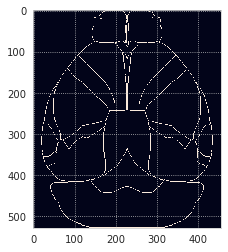

In [5]:
plt.imshow(mice.parcel.results2d['contour'])

<matplotlib.image.AxesImage object at 0x7f48f4ffa820>

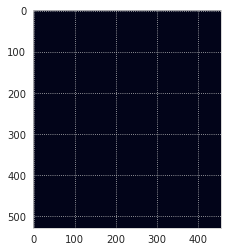

In [7]:
len(np.unique(mice.parcel.results['subcortex']))

156

<matplotlib.image.AxesImage object at 0x7f23d272fa90>

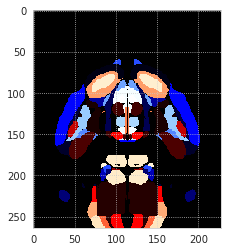

In [15]:
plt.imshow(mice.parcel.results['subcortex'][:, 130, :], cmap='flag_r')

In [5]:
mice.parcel.results2d['name2idx']

{
    'Cerebellum': 1,
    'Primary somatosensory area': 2,
    'Visual areas': 3,
    'Secondary motor area': 4,
    'Retrosplenial area': 5,
    'Olfactory areas': 6,
    'Primary motor area': 7,
    'Midbrain': 8,
    'Posterior parietal association areas': 9,
    'Auditory areas': 10,
    'Supplemental somatosensory area': 11,
    'Temporal association areas': 12,
    'Prelimbic area': 13,
    'Anterior cingulate area': 14
}

In [ ]:
from register.parcellation import get_sub_regions

In [4]:
reg = Register(mice)

In [5]:
reg.objects

{
    'misc': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (100.0, 100.0, 100.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'iso': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (100.0, 100.0, 100.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'hemis': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (100.0, 100.0, 100.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

}

In [6]:
mice.al.mask_l.sum(), mice.al.mask_l.sum()

(601920, 601920)

In [7]:
mice.al.slice_l, mice.al.slice_r

(
    (slice(None, 132, None), slice(None, 80, None), slice(0, 57, None)),
    (slice(None, 132, None), slice(None, 80, None), slice(57, 114, None))
)

<matplotlib.colorbar.Colorbar object at 0x7fb53bf32940>

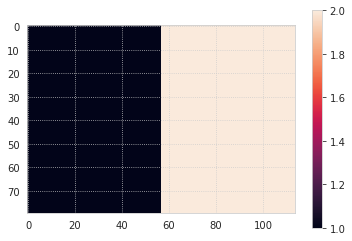

In [8]:
plt.imshow(reg.objects['hemis'][40])
plt.colorbar()

In [9]:
collections.Counter(reg.objects['hemis'].numpy().ravel())

Counter({1: 601920, 2: 601920})

In [11]:
np.unique(reg.objects['misc'].numpy())

array([  0,  22,  95, 453, 541, 669, 677, 985, 993], dtype=uint32)

In [23]:
vox = [int(e) for e in np.unique(reg.objects['misc'].numpy()) if e > 0]
# vox = mice.al.get(vox)

In [24]:
vox

[22, 95, 453, 541, 669, 677, 985, 993]

In [27]:
if reg.nissl:
    print('hi')

hi

In [4]:
structs = [
    'VIS', 'TEa', 'PTLp', 'VISC',
    'AI', 'SS', 'MO', 'Isocortex',
]

In [6]:
obj = mice.al.get_masks(structs, as_objectmap=True)

In [7]:
obj.dtype

dtype('uint32')

In [9]:
np.unique(obj), len(np.unique(obj))

(array([  0, 315, 337, 410, 768, 815, 856, 984, 992], dtype=uint32), 9)

<matplotlib.image.AxesImage object at 0x7fb6aeeecb20>

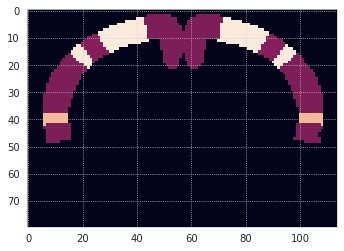

In [18]:
plt.imshow(obj[80])

dtype('uint8')

In [4]:
sub_regions = get_sub_regions(mice.cfg, mice.al)
len(sub_regions), len(set(sub_regions))

(157, 157)

In [37]:
min(sub_regions)

7

In [38]:
masks = mice.al.get_masks(sub_regions, return_object_map=True)
masks.dtype

dtype('uint32')

In [39]:
len(np.unique(masks))

156

In [41]:
set(np.unique(masks)).difference(set(sub_regions))

{
    0,
    513,
    538,
    539,
    1181,
    1190,
    1468,
    1340,
    572,
    579,
    1348,
    1477,
    587,
    333,
    595,
    340,
    349,
    1384,
    365
}

In [44]:
x = mice.al.get_masks(1348, return_object_map=False)
x

{}

In [43]:
plt.imshow(x.mean(0))

AttributeError: 'int' object has no attribute 'mean'

In [45]:
1348

1348

In [46]:
mice.al.get(1348)

,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet


In [47]:
mice.al.s_tree.get_structures_by_id([1348])

[None]

In [4]:
df = mice.al.df.copy()

In [5]:
new_df = df[~df['name'].str.contains('Layer')]

In [6]:
new_df

,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
0,root,1,0,997,root,[997],[691663206],"[255, 255, 255]"
1,grey,1,1,8,Basic cell groups and regions,"[997, 8]","[112905828, 691663206, 12, 184527634, 11290581...","[191, 218, 227]"
2,CH,1,2,567,Cerebrum,"[997, 8, 567]","[112905828, 691663206, 12, 184527634, 11290581...","[176, 240, 255]"
3,CTX,1,3,688,Cerebral cortex,"[997, 8, 567, 688]","[112905828, 691663206, 12, 184527634, 11290581...","[176, 255, 184]"
4,CTXpl,1,4,695,Cortical plate,"[997, 8, 567, 688, 695]","[112905828, 691663206, 12, 184527634, 11290581...","[112, 255, 112]"
...,...,...,...,...,...,...,...,...
1322,ipf,1,1322,49,intraparafloccular fissure,"[997, 1024, 1040, 49]",[],"[170, 170, 170]"
1323,pms,1,1323,57,paramedian sulcus,"[997, 1024, 1040, 57]",[],"[170, 170, 170]"
1324,pfs,1,1324,65,parafloccular sulcus,"[997, 1024, 1040, 65]",[],"[170, 170, 170]"
1325,IPF,1,1325,624,Interpeduncular fossa,"[997, 1024, 624]",[],"[170, 170, 170]"


In [5]:
mice.al.get('CTXsp')

{
    'acronym': 'CTXsp',
    'graph_id': 1,
    'graph_order': 555,
    'id': 703,
    'name': 'Cortical subplate',
    'structure_id_path': [997, 8, 567, 688, 703],
    'structure_set_ids': [
        2,
        3,
        112905828,
        691663206,
        12,
        184527634,
        687527670,
        114512891
    ],
    'rgb_triplet': [138, 218, 135]
}

In [6]:
tree, base_level = mice.al.get_subtree(703)

CTXsp (703)
├── BLA (295)
│   ├── BLAa (303)
│   ├── BLAp (311)
│   └── BLAv (451)
├── BMA (319)
│   ├── BMAa (327)
│   └── BMAp (334)
├── CLA (583)
├── EP (942)
│   ├── EPd (952)
│   └── EPv (966)
├── LA (131)
└── PA (780)



In [9]:
leaves = [e.identifier for e in tree.leaves()]

In [10]:
mice.al.get(leaves)

,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
557,CLA,1,557,583,Claustrum,"[997, 8, 567, 688, 703, 583]","[112905828, 691663206, 688152360, 687527945, 1...","[138, 218, 135]"
559,EPd,1,559,952,"Endopiriform nucleus, dorsal part","[997, 8, 567, 688, 703, 942, 952]","[112905828, 691663206, 688152360, 687527945, 1...","[160, 238, 157]"
560,EPv,1,560,966,"Endopiriform nucleus, ventral part","[997, 8, 567, 688, 703, 942, 966]","[112905828, 691663206, 688152360, 687527945, 1...","[160, 238, 157]"
561,LA,1,561,131,Lateral amygdalar nucleus,"[997, 8, 567, 688, 703, 131]","[112905828, 691663206, 688152360, 687527945, 1...","[144, 235, 141]"
563,BLAa,1,563,303,"Basolateral amygdalar nucleus, anterior part","[997, 8, 567, 688, 703, 295, 303]","[184527634, 12, 691663206]","[157, 231, 156]"
564,BLAp,1,564,311,"Basolateral amygdalar nucleus, posterior part","[997, 8, 567, 688, 703, 295, 311]","[184527634, 12, 691663206]","[157, 231, 156]"
565,BLAv,1,565,451,"Basolateral amygdalar nucleus, ventral part","[997, 8, 567, 688, 703, 295, 451]","[184527634, 12, 691663206]","[157, 231, 156]"
567,BMAa,1,567,327,"Basomedial amygdalar nucleus, anterior part","[997, 8, 567, 688, 703, 319, 327]","[184527634, 12, 691663206]","[132, 234, 129]"
568,BMAp,1,568,334,"Basomedial amygdalar nucleus, posterior part","[997, 8, 567, 688, 703, 319, 334]","[184527634, 12, 691663206]","[132, 234, 129]"
569,PA,1,569,780,Posterior amygdalar nucleus,"[997, 8, 567, 688, 703, 780]","[112905828, 691663206, 688152360, 687527945, 1...","[151, 236, 147]"


In [14]:
{k: m.astype(bool).sum() for k, m in mice.al.get_masks(leaves, False).items()}

{
    'CLA': 545,
    'EPd': 1796,
    'EPv': 961,
    'LA': 843,
    'BLAa': 764,
    'BLAp': 710,
    'BLAv': 414,
    'BMAa': 777,
    'BMAp': 708,
    'PA': 966
}

In [15]:
mice.al.get_masks(leaves, False).items()

dict_items([('CLA', array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint32)), ('EPd', array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint32)), ('EPv', array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint32)), ('LA', array([[[0, 0, 0, ..., 0, 0, 0],
   

In [56]:
mice.al.get('CTXsp')

{
    'acronym': 'CTXsp',
    'graph_id': 1,
    'graph_order': 555,
    'id': 703,
    'name': 'Cortical subplate',
    'structure_id_path': [997, 8, 567, 688, 703],
    'structure_set_ids': [
        2,
        3,
        112905828,
        691663206,
        12,
        184527634,
        687527670,
        114512891
    ],
    'rgb_triplet': [138, 218, 135]
}

In [8]:
masks.shape

(132, 80, 114)

<matplotlib.image.AxesImage object at 0x7f18e86d7280>

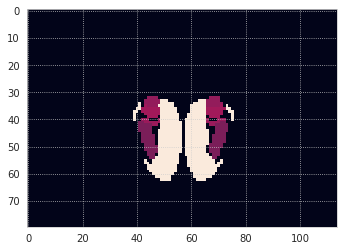

In [11]:
plt.imshow(masks[20])

<matplotlib.image.AxesImage object at 0x7f18e83cdf40>

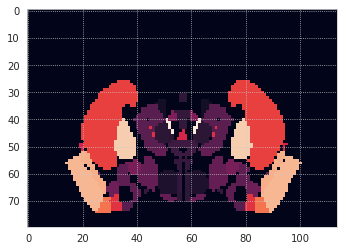

In [18]:
plt.imshow(masks[60])

In [27]:
m = mice.al.get_masks('Isocortex', return_object_map=True)
m.dtype

dtype('uint32')

<matplotlib.colorbar.Colorbar object at 0x7f18e7f330a0>

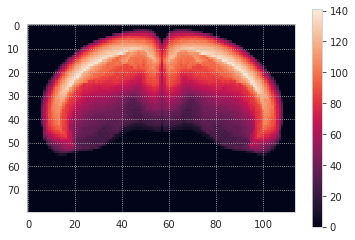

In [28]:
plt.imshow(m.mean(0))
plt.colorbar()

In [29]:
np.unique(m)

array([  0, 315], dtype=uint32)

<matplotlib.image.AxesImage object at 0x7f9f6a5db3a0>

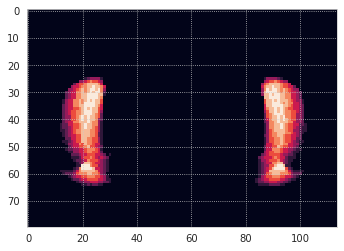

In [8]:
plt.imshow(masks['ENTm'].mean(0))

In [10]:
a = [np.arange(20).reshape(4, 5), np.ones((4, 5))]
a

[
    array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]]),
    array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])
]

In [11]:
sum(e for e in a)

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20.]])

In [2]:
from register.atlas import Allen

In [3]:
al = Allen()

In [4]:
al.get(['Isocortex', 'MO'])

,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
5,Isocortex,1,5,315,Isocortex,"[997, 8, 567, 688, 695, 315]","[2, 112905828, 691663206, 12, 184527634, 11290...","[112, 255, 113]"
12,MO,1,12,500,Somatomotor areas,"[997, 8, 567, 688, 695, 315, 500]","[3, 112905828, 691663206, 12, 184527634, 11290...","[31, 157, 90]"


In [5]:
al.get('Isocortex')

{
    'acronym': 'Isocortex',
    'graph_id': 1,
    'graph_order': 5,
    'id': 315,
    'name': 'Isocortex',
    'structure_id_path': [997, 8, 567, 688, 695, 315],
    'structure_set_ids': [
        2,
        112905828,
        691663206,
        12,
        184527634,
        112905813,
        687527670,
        114512891,
        114512892
    ],
    'rgb_triplet': [112, 255, 113]
}

In [6]:
al.get('root')

{
    'acronym': 'root',
    'graph_id': 1,
    'graph_order': 0,
    'id': 997,
    'name': 'root',
    'structure_id_path': [997],
    'structure_set_ids': [691663206],
    'rgb_triplet': [255, 255, 255]
}

<matplotlib.image.AxesImage object at 0x7f9f44e56f70>

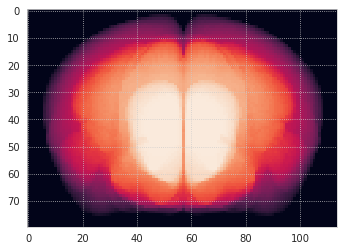

In [7]:
plt.imshow(al.get_masks('root').mean(0))

<matplotlib.image.AxesImage object at 0x7f9f44dd95b0>

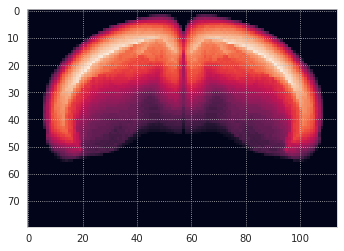

In [8]:
plt.imshow(al.get_masks('Isocortex').mean(0))

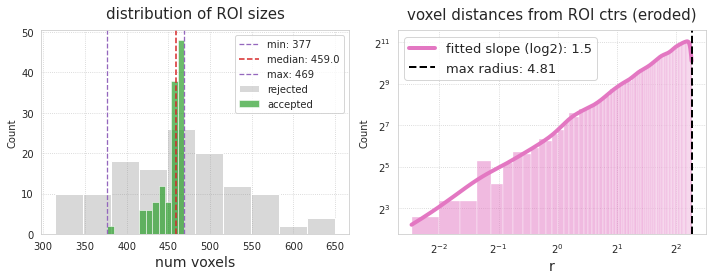

In [9]:
_ = mice.parcel.show()

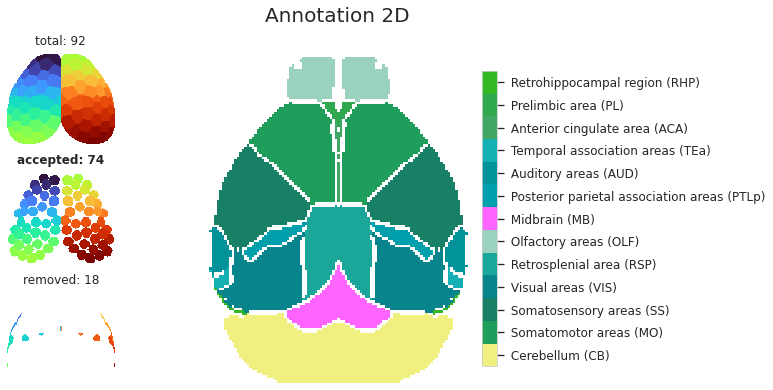

In [10]:
_ = mice.parcel.show2d()